In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import copy
import os

pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", 20)
biome='Pampa' #edit here

In [2]:
directory = 'Correcao_Erika/'
files = [f for f in os.listdir(directory) if f.endswith('.csv')]
files_df=[]
for f,file in enumerate(files):
    files_df.append(pd.read_csv(directory+file,delimiter=',',header='infer'))
    print(files_df[f].shape,files[f])

(21436, 31) RK_amb_Pampa_CGIAR.csv
(21436, 30) RK_amb_Pampa_GeoAplicada.csv
(21436, 387) RK_amb_Pampa_WorldClim.csv
(21436, 63) RK_amb_Pampa_SGB.csv
(21436, 23) RK_amb_Pampa_INPE_vetor.csv
(21436, 74) RK_amb_Pampa_Chelsea.csv
(21436, 158) RK_amb_Pampa_EcoClimate.csv
(21436, 143) RK_amb_Pampa_GeoAplicada_vetor.csv
(21436, 7) RK_amb_Pampa_INPE.csv


/tmp/ipykernel_13775/2921745925.py:5: DtypeWarning: Columns (128,129) have mixed types. Specify dtype option on import or set low_memory=False.
  files_df.append(pd.read_csv(directory+file,delimiter=',',header='infer'))


In [3]:
for f,df in enumerate(files_df):
    print(list(df.columns[:6]))

['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']
['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE']


In [4]:
for f,df in enumerate(files_df):
    print(np.unique(files_df[0].iloc[:,[0,1,3,4,5]]==df.iloc[:,[0,1,3,4,5]]),files[f])

[ True] RK_amb_Pampa_CGIAR.csv
[ True] RK_amb_Pampa_GeoAplicada.csv
[ True] RK_amb_Pampa_WorldClim.csv
[ True] RK_amb_Pampa_SGB.csv
[ True] RK_amb_Pampa_INPE_vetor.csv
[ True] RK_amb_Pampa_Chelsea.csv
[ True] RK_amb_Pampa_EcoClimate.csv
[ True] RK_amb_Pampa_GeoAplicada_vetor.csv
[ True] RK_amb_Pampa_INPE.csv


In [5]:
for f,df in enumerate(files_df):
    print(np.unique(files_df[0].DATA.dropna()==df.DATA.dropna()),files[f])

[ True] RK_amb_Pampa_CGIAR.csv
[ True] RK_amb_Pampa_GeoAplicada.csv
[ True] RK_amb_Pampa_WorldClim.csv
[False] RK_amb_Pampa_SGB.csv
[ True] RK_amb_Pampa_INPE_vetor.csv
[ True] RK_amb_Pampa_Chelsea.csv
[ True] RK_amb_Pampa_EcoClimate.csv
[False] RK_amb_Pampa_GeoAplicada_vetor.csv
[ True] RK_amb_Pampa_INPE.csv


In [6]:
for f,df in enumerate(files_df):
    files_df[f]=files_df[f][files_df[f].CD_SP=='sp_787']
    files_df[f]=files_df[f].reset_index().drop(columns=['index'])
    #print(files[f])
    #display(df.head())
    #print('\n\n')

In [7]:
n_indices=files_df[0].shape[0]
column_percentage_tolerance=0.7
column_tolerance=int(np.round(column_percentage_tolerance*n_indices))
print('N indices tolerance:',column_tolerance)

N indices tolerance: 1776


In [8]:
species_df=files_df[0].CD_SP
coordinates_df=files_df[0][['LATITUDE', 'LONGITUDE']]

for f,df in enumerate(files_df):
    files_df[f]=df.drop(columns=['CODIGO_IN', 'PROJETO', 'DATA', 'CD_SP', 'LATITUDE', 'LONGITUDE'])
    if 'geometry' in df.columns:
        files_df[f]=files_df[f].drop(columns=['geometry'])

for f,df in enumerate(files_df):
    print(df.shape,files[f])

(2537, 25) RK_amb_Pampa_CGIAR.csv
(2537, 24) RK_amb_Pampa_GeoAplicada.csv
(2537, 381) RK_amb_Pampa_WorldClim.csv
(2537, 56) RK_amb_Pampa_SGB.csv
(2537, 17) RK_amb_Pampa_INPE_vetor.csv
(2537, 68) RK_amb_Pampa_Chelsea.csv
(2537, 152) RK_amb_Pampa_EcoClimate.csv
(2537, 136) RK_amb_Pampa_GeoAplicada_vetor.csv
(2537, 1) RK_amb_Pampa_INPE.csv


In [9]:
for f,df in enumerate(files_df):
    print(files[f])
    display(df.head())
    display(df.astype('object').describe())
    print('\n\n')

RK_amb_Pampa_CGIAR.csv


,et0_v3_yr_sd,ai_v3_03,ai_v3_01,ai_v3_12,ai_v3_11,ai_v3_10,ai_v3_09,ai_v3_08,ai_v3_07,ai_v3_06,ai_v3_05,et0_v3_12,et0_v3_11,et0_v3_10,et0_V3_09,et0_V3_08,et0_V3_07,et0_V3_06,et0_V3_05,et0_v3_04,et0_v3_03,et0_v3_02,et0_v3_01,ai_v3_04,ai_v3_yr
0,41.0,8083.0,6667.0,4323.0,4664.0,9372.0,14714.0,16328.0,17723.0,21511.0,13617.0,178.0,156.0,126.0,92.0,80.0,63.0,59.0,77.0,98.0,136.0,144.0,181.0,10729.0,9674.0
1,41.0,8048.0,6685.0,4323.0,4678.0,9308.0,14722.0,16264.0,17896.0,21343.0,13500.0,178.0,156.0,126.0,92.0,80.0,63.0,59.0,77.0,98.0,136.0,142.0,180.0,10629.0,9665.0
2,41.0,8048.0,6685.0,4323.0,4678.0,9308.0,14722.0,16264.0,17896.0,21343.0,13500.0,178.0,156.0,126.0,92.0,80.0,63.0,59.0,77.0,98.0,136.0,142.0,180.0,10629.0,9665.0
3,41.0,8048.0,6685.0,4323.0,4678.0,9308.0,14722.0,16264.0,17896.0,21343.0,13500.0,178.0,156.0,126.0,92.0,80.0,63.0,59.0,77.0,98.0,136.0,142.0,180.0,10629.0,9665.0
4,41.0,8103.0,6685.0,4293.0,4666.0,9408.0,14784.0,16265.0,17904.0,21346.0,13721.0,179.0,156.0,126.0,91.0,80.0,63.0,59.0,76.0,98.0,135.0,144.0,180.0,10691.0,9673.0


,et0_v3_yr_sd,ai_v3_03,ai_v3_01,ai_v3_12,ai_v3_11,ai_v3_10,ai_v3_09,ai_v3_08,ai_v3_07,ai_v3_06,ai_v3_05,et0_v3_12,et0_v3_11,et0_v3_10,et0_V3_09,et0_V3_08,et0_V3_07,et0_V3_06,et0_V3_05,et0_v3_04,et0_v3_03,et0_v3_02,et0_v3_01,ai_v3_04,ai_v3_yr
count,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0
unique,11.0,169.0,180.0,167.0,172.0,176.0,184.0,178.0,184.0,188.0,180.0,26.0,22.0,18.0,15.0,16.0,14.0,12.0,15.0,9.0,17.0,20.0,28.0,173.0,184.0
top,41.0,8083.0,6667.0,4323.0,4664.0,9372.0,14714.0,16328.0,17723.0,21511.0,13617.0,178.0,156.0,126.0,92.0,80.0,63.0,59.0,77.0,98.0,136.0,143.0,180.0,10729.0,9674.0
freq,1653.0,334.0,316.0,492.0,316.0,317.0,316.0,316.0,316.0,316.0,316.0,729.0,594.0,667.0,511.0,1104.0,660.0,1044.0,1106.0,931.0,520.0,511.0,485.0,316.0,344.0





RK_amb_Pampa_GeoAplicada.csv


,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,TROP-SUBTROP_WetlandV3b_2016_CIFOR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0


,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,TROP-SUBTROP_WetlandV3b_2016_CIFOR
count,1801.0,1137.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1803.0
unique,4.0,4.0,12.0,1.0,1.0,1.0,2.0,5.0,2.0,1.0,2.0,1.0,1.0,9.0,3.0,3.0,26.0,14.0,4.0,23.0,8.0,17.0,9.0,5.0
top,18.0,16.0,66.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,17.0,16.0,2.0,16.0,6.0,16.0,11.0,20.0
freq,913.0,692.0,541.0,1801.0,1801.0,1801.0,1641.0,567.0,1790.0,1801.0,1781.0,1801.0,1801.0,548.0,1632.0,1017.0,204.0,336.0,1116.0,325.0,610.0,387.0,751.0,492.0





RK_amb_Pampa_WorldClim.csv


,wc2.1_2.5m_bio_1,wc2.1_2.5m_bio_2,wc2.1_2.5m_bio_3,wc2.1_2.5m_bio_4,wc2.1_2.5m_bio_5,wc2.1_2.5m_bio_6,wc2.1_2.5m_bio_7,wc2.1_2.5m_bio_8,wc2.1_2.5m_bio_9,wc2.1_2.5m_bio_10,wc2.1_2.5m_bio_11,wc2.1_2.5m_bio_12,wc2.1_2.5m_bio_13,wc2.1_2.5m_bio_14,wc2.1_2.5m_bio_15,wc2.1_2.5m_bio_16,wc2.1_2.5m_bio_17,wc2.1_2.5m_bio_18,wc2.1_2.5m_bio_19,wc2.1_2.5m_prec_01,wc2.1_2.5m_prec_02,wc2.1_2.5m_prec_03,wc2.1_2.5m_prec_04,wc2.1_2.5m_prec_05,wc2.1_2.5m_prec_06,wc2.1_2.5m_prec_07,wc2.1_2.5m_prec_08,wc2.1_2.5m_prec_09,wc2.1_2.5m_prec_10,wc2.1_2.5m_prec_11,wc2.1_2.5m_prec_12,wc2.1_2.5m_srad_01,wc2.1_2.5m_srad_02,wc2.1_2.5m_srad_03,wc2.1_2.5m_srad_04,wc2.1_2.5m_srad_05,wc2.1_2.5m_srad_06,wc2.1_2.5m_srad_07,wc2.1_2.5m_srad_08,wc2.1_2.5m_srad_09,wc2.1_2.5m_srad_10,wc2.1_2.5m_srad_11,wc2.1_2.5m_srad_12,wc2.1_2.5m_tavg_01,wc2.1_2.5m_tavg_02,wc2.1_2.5m_tavg_03,wc2.1_2.5m_tavg_04,wc2.1_2.5m_tavg_05,wc2.1_2.5m_tavg_06,wc2.1_2.5m_tavg_07,wc2.1_2.5m_tavg_08,wc2.1_2.5m_tavg_09,wc2.1_2.5m_tavg_10,wc2.1_2.5m_tavg_11,wc2.1_2.5m_tavg_12,wc2.1_2.5m_tmax_01,wc2.1_2.5m_tmax_02,wc2.1_2.5m_tmax_03,wc2.1_2.5m_tmax_04,wc2.1_2.5m_tmax_05,wc2.1_2.5m_tmax_06,wc2.1_2.5m_tmax_07,wc2.1_2.5m_tmax_08,wc2.1_2.5m_tmax_09,wc2.1_2.5m_tmax_10,wc2.1_2.5m_tmax_11,wc2.1_2.5m_tmax_12,wc2.1_2.5m_tmin_01,wc2.1_2.5m_tmin_02,wc2.1_2.5m_tmin_03,wc2.1_2.5m_tmin_04,wc2.1_2.5m_tmin_05,wc2.1_2.5m_tmin_06,wc2.1_2.5m_tmin_07,wc2.1_2.5m_tmin_08,wc2.1_2.5m_tmin_09,wc2.1_2.5m_tmin_10,wc2.1_2.5m_tmin_11,wc2.1_2.5m_tmin_12,wc2.1_2.5m_vapr_01,wc2.1_2.5m_vapr_02,wc2.1_2.5m_vapr_03,wc2.1_2.5m_vapr_04,wc2.1_2.5m_vapr_05,wc2.1_2.5m_vapr_06,wc2.1_2.5m_vapr_07,wc2.1_2.5m_vapr_08,wc2.1_2.5m_vapr_09,wc2.1_2.5m_vapr_10,wc2.1_2.5m_vapr_11,wc2.1_2.5m_vapr_12,wc2.1_2.5m_wind_01,wc2.1_2.5m_wind_02,wc2.1_2.5m_wind_03,wc2.1_2.5m_wind_04,wc2.1_2.5m_wind_05,wc2.1_2.5m_wind_06,wc2.1_2.5m_wind_07,wc2.1_2.5m_wind_08,wc2.1_2.5m_wind_09,wc2.1_2.5m_wind_10,wc2.1_2.5m_wind_11,wc2.1_2.5m_wind_12,wc2.1_5m_prec_01,wc2.1_5m_prec_02,wc2.1_5m_prec_03,wc2.1_5m_prec_04,wc2.1_5m_prec_05,wc2.1_5m_prec_06,wc2.1_5m_prec_07,wc2.1_5m_prec_08,wc2.1_5m_prec_09,wc2.1_5m_prec_10,wc2.1_5m_prec_11,wc2.1_5m_prec_12,wc2.1_5m_srad_01,wc2.1_5m_srad_02,wc2.1_5m_srad_03,wc2.1_5m_srad_04,wc2.1_5m_srad_05,wc2.1_5m_srad_06,wc2.1_5m_srad_07,wc2.1_5m_srad_08,wc2.1_5m_srad_09,wc2.1_5m_srad_10,wc2.1_5m_srad_11,wc2.1_5m_srad_12,wc2.1_5m_tavg_01,wc2.1_5m_tavg_02,wc2.1_5m_tavg_03,wc2.1_5m_tavg_04,wc2.1_5m_tavg_05,wc2.1_5m_tavg_06,wc2.1_5m_tavg_07,wc2.1_5m_tavg_08,wc2.1_5m_tavg_09,wc2.1_5m_tavg_10,wc2.1_5m_tavg_11,wc2.1_5m_tavg_12,wc2.1_5m_tmax_01,wc2.1_5m_tmax_02,wc2.1_5m_tmax_03,wc2.1_5m_tmax_04,wc2.1_5m_tmax_05,wc2.1_5m_tmax_06,wc2.1_5m_tmax_07,wc2.1_5m_tmax_08,wc2.1_5m_tmax_09,wc2.1_5m_tmax_10,wc2.1_5m_tmax_11,wc2.1_5m_tmax_12,wc2.1_5m_tmin_01,wc2.1_5m_tmin_02,wc2.1_5m_tmin_03,wc2.1_5m_tmin_04,wc2.1_5m_tmin_05,wc2.1_5m_tmin_06,wc2.1_5m_tmin_07,wc2.1_5m_tmin_08,wc2.1_5m_tmin_09,wc2.1_5m_tmin_10,wc2.1_5m_tmin_11,wc2.1_5m_tmin_12,wc2.1_5m_vapr_01,wc2.1_5m_vapr_02,wc2.1_5m_vapr_03,wc2.1_5m_vapr_04,wc2.1_5m_vapr_05,wc2.1_5m_vapr_06,wc2.1_5m_vapr_07,wc2.1_5m_vapr_08,wc2.1_5m_vapr_09,wc2.1_5m_vapr_10,wc2.1_5m_vapr_11,wc2.1_5m_vapr_12,wc2.1_5m_wind_01,wc2.1_5m_wind_02,wc2.1_5m_wind_03,wc2.1_5m_wind_04,wc2.1_5m_wind_05,wc2.1_5m_wind_06,wc2.1_5m_wind_07,wc2.1_5m_wind_08,wc2.1_5m_wind_09,wc2.1_5m_wind_10,wc2.1_5m_wind_11,wc2.1_5m_wind_12,wc2.1_10m_bio_1,wc2.1_10m_bio_2,wc2.1_10m_bio_3,wc2.1_10m_bio_4,wc2.1_10m_bio_5,wc2.1_10m_bio_6,wc2.1_10m_bio_7,wc2.1_10m_bio_8,wc2.1_10m_bio_9,wc2.1_10m_bio_10,wc2.1_10m_bio_11,wc2.1_10m_bio_12,wc2.1_10m_bio_13,wc2.1_10m_bio_14,wc2.1_10m_bio_15,wc2.1_10m_bio_16,wc2.1_10m_bio_17,wc2.1_10m_bio_18,wc2.1_10m_bio_19,wc2.1_10m_prec_01,wc2.1_10m_prec_02,wc2.1_10m_prec_03,wc2.1_10m_prec_04,wc2.1_10m_prec_05,wc2.1_10m_prec_06,wc2.1_10m_prec_07,wc2.1_10m_prec_08,wc2.1_10m_prec_09,wc2.1_10m_prec_10,wc2.1_10m_prec_11,wc2.1_10m_prec_12,wc2.1_10m_srad_01,wc2.1_10m_srad_02,wc2.1_10m_srad_03,wc2.1_10m_srad_04,wc2.1_10m_srad_05,wc2.1_10m_srad_06,wc2.

,wc2.1_2.5m_bio_1,wc2.1_2.5m_bio_2,wc2.1_2.5m_bio_3,wc2.1_2.5m_bio_4,wc2.1_2.5m_bio_5,wc2.1_2.5m_bio_6,wc2.1_2.5m_bio_7,wc2.1_2.5m_bio_8,wc2.1_2.5m_bio_9,wc2.1_2.5m_bio_10,wc2.1_2.5m_bio_11,wc2.1_2.5m_bio_12,wc2.1_2.5m_bio_13,wc2.1_2.5m_bio_14,wc2.1_2.5m_bio_15,wc2.1_2.5m_bio_16,wc2.1_2.5m_bio_17,wc2.1_2.5m_bio_18,wc2.1_2.5m_bio_19,wc2.1_2.5m_prec_01,wc2.1_2.5m_prec_02,wc2.1_2.5m_prec_03,wc2.1_2.5m_prec_04,wc2.1_2.5m_prec_05,wc2.1_2.5m_prec_06,wc2.1_2.5m_prec_07,wc2.1_2.5m_prec_08,wc2.1_2.5m_prec_09,wc2.1_2.5m_prec_10,wc2.1_2.5m_prec_11,wc2.1_2.5m_prec_12,wc2.1_2.5m_srad_01,wc2.1_2.5m_srad_02,wc2.1_2.5m_srad_03,wc2.1_2.5m_srad_04,wc2.1_2.5m_srad_05,wc2.1_2.5m_srad_06,wc2.1_2.5m_srad_07,wc2.1_2.5m_srad_08,wc2.1_2.5m_srad_09,wc2.1_2.5m_srad_10,wc2.1_2.5m_srad_11,wc2.1_2.5m_srad_12,wc2.1_2.5m_tavg_01,wc2.1_2.5m_tavg_02,wc2.1_2.5m_tavg_03,wc2.1_2.5m_tavg_04,wc2.1_2.5m_tavg_05,wc2.1_2.5m_tavg_06,wc2.1_2.5m_tavg_07,wc2.1_2.5m_tavg_08,wc2.1_2.5m_tavg_09,wc2.1_2.5m_tavg_10,wc2.1_2.5m_tavg_11,wc2.1_2.5m_tavg_12,wc2.1_2.5m_tmax_01,wc2.1_2.5m_tmax_02,wc2.1_2.5m_tmax_03,wc2.1_2.5m_tmax_04,wc2.1_2.5m_tmax_05,wc2.1_2.5m_tmax_06,wc2.1_2.5m_tmax_07,wc2.1_2.5m_tmax_08,wc2.1_2.5m_tmax_09,wc2.1_2.5m_tmax_10,wc2.1_2.5m_tmax_11,wc2.1_2.5m_tmax_12,wc2.1_2.5m_tmin_01,wc2.1_2.5m_tmin_02,wc2.1_2.5m_tmin_03,wc2.1_2.5m_tmin_04,wc2.1_2.5m_tmin_05,wc2.1_2.5m_tmin_06,wc2.1_2.5m_tmin_07,wc2.1_2.5m_tmin_08,wc2.1_2.5m_tmin_09,wc2.1_2.5m_tmin_10,wc2.1_2.5m_tmin_11,wc2.1_2.5m_tmin_12,wc2.1_2.5m_vapr_01,wc2.1_2.5m_vapr_02,wc2.1_2.5m_vapr_03,wc2.1_2.5m_vapr_04,wc2.1_2.5m_vapr_05,wc2.1_2.5m_vapr_06,wc2.1_2.5m_vapr_07,wc2.1_2.5m_vapr_08,wc2.1_2.5m_vapr_09,wc2.1_2.5m_vapr_10,wc2.1_2.5m_vapr_11,wc2.1_2.5m_vapr_12,wc2.1_2.5m_wind_01,wc2.1_2.5m_wind_02,wc2.1_2.5m_wind_03,wc2.1_2.5m_wind_04,wc2.1_2.5m_wind_05,wc2.1_2.5m_wind_06,wc2.1_2.5m_wind_07,wc2.1_2.5m_wind_08,wc2.1_2.5m_wind_09,wc2.1_2.5m_wind_10,wc2.1_2.5m_wind_11,wc2.1_2.5m_wind_12,wc2.1_5m_prec_01,wc2.1_5m_prec_02,wc2.1_5m_prec_03,wc2.1_5m_prec_04,wc2.1_5m_prec_05,wc2.1_5m_prec_06,wc2.1_5m_prec_07,wc2.1_5m_prec_08,wc2.1_5m_prec_09,wc2.1_5m_prec_10,wc2.1_5m_prec_11,wc2.1_5m_prec_12,wc2.1_5m_srad_01,wc2.1_5m_srad_02,wc2.1_5m_srad_03,wc2.1_5m_srad_04,wc2.1_5m_srad_05,wc2.1_5m_srad_06,wc2.1_5m_srad_07,wc2.1_5m_srad_08,wc2.1_5m_srad_09,wc2.1_5m_srad_10,wc2.1_5m_srad_11,wc2.1_5m_srad_12,wc2.1_5m_tavg_01,wc2.1_5m_tavg_02,wc2.1_5m_tavg_03,wc2.1_5m_tavg_04,wc2.1_5m_tavg_05,wc2.1_5m_tavg_06,wc2.1_5m_tavg_07,wc2.1_5m_tavg_08,wc2.1_5m_tavg_09,wc2.1_5m_tavg_10,wc2.1_5m_tavg_11,wc2.1_5m_tavg_12,wc2.1_5m_tmax_01,wc2.1_5m_tmax_02,wc2.1_5m_tmax_03,wc2.1_5m_tmax_04,wc2.1_5m_tmax_05,wc2.1_5m_tmax_06,wc2.1_5m_tmax_07,wc2.1_5m_tmax_08,wc2.1_5m_tmax_09,wc2.1_5m_tmax_10,wc2.1_5m_tmax_11,wc2.1_5m_tmax_12,wc2.1_5m_tmin_01,wc2.1_5m_tmin_02,wc2.1_5m_tmin_03,wc2.1_5m_tmin_04,wc2.1_5m_tmin_05,wc2.1_5m_tmin_06,wc2.1_5m_tmin_07,wc2.1_5m_tmin_08,wc2.1_5m_tmin_09,wc2.1_5m_tmin_10,wc2.1_5m_tmin_11,wc2.1_5m_tmin_12,wc2.1_5m_vapr_01,wc2.1_5m_vapr_02,wc2.1_5m_vapr_03,wc2.1_5m_vapr_04,wc2.1_5m_vapr_05,wc2.1_5m_vapr_06,wc2.1_5m_vapr_07,wc2.1_5m_vapr_08,wc2.1_5m_vapr_09,wc2.1_5m_vapr_10,wc2.1_5m_vapr_11,wc2.1_5m_vapr_12,wc2.1_5m_wind_01,wc2.1_5m_wind_02,wc2.1_5m_wind_03,wc2.1_5m_wind_04,wc2.1_5m_wind_05,wc2.1_5m_wind_06,wc2.1_5m_wind_07,wc2.1_5m_wind_08,wc2.1_5m_wind_09,wc2.1_5m_wind_10,wc2.1_5m_wind_11,wc2.1_5m_wind_12,wc2.1_10m_bio_1,wc2.1_10m_bio_2,wc2.1_10m_bio_3,wc2.1_10m_bio_4,wc2.1_10m_bio_5,wc2.1_10m_bio_6,wc2.1_10m_bio_7,wc2.1_10m_bio_8,wc2.1_10m_bio_9,wc2.1_10m_bio_10,wc2.1_10m_bio_11,wc2.1_10m_bio_12,wc2.1_10m_bio_13,wc2.1_10m_bio_14,wc2.1_10m_bio_15,wc2.1_10m_bio_16,wc2.1_10m_bio_17,wc2.1_10m_bio_18,wc2.1_10m_bio_19,wc2.1_10m_prec_01,wc2.1_10m_prec_02,wc2.1_10m_prec_03,wc2.1_10m_prec_04,wc2.1_10m_prec_05,wc2.1_10m_prec_06,wc2.1_10m_prec_07,wc2.1_10m_prec_08,wc2.1_10m_prec_09,wc2.1_10m_prec_10,wc2.1_10m_prec_11,wc2.1_10m_prec_12,wc2.1_10m_srad_01,wc2.1_10m_srad_02,wc2.1_10m_srad_03,wc2.1_10m_srad_04,wc2.1_10m_srad_05,wc2.1_10m_srad_06,wc2.




RK_amb_Pampa_SGB.csv


,isoietas_value,litoestratigrafia_1000000_index_right,litoestratigrafia_1000000_OBJECTID,litoestratigrafia_1000000_ID_UNIDADE,litoestratigrafia_1000000_Info2Lito,litoestratigrafia_1000000_HIERARQUIA,litoestratigrafia_1000000_NOME,litoestratigrafia_1000000_AMBIENTE_T,litoestratigrafia_1000000_SUB_AMBIEN,litoestratigrafia_1000000_SIGLA_PAI,litoestratigrafia_1000000_NOME_PAI,litoestratigrafia_1000000_LEGENDA,litoestratigrafia_1000000_ESCALA,litoestratigrafia_1000000_MAPA,litoestratigrafia_1000000_LITOTIPOS,litoestratigrafia_1000000_RANGE,litoestratigrafia_1000000_IDADE_MIN,litoestratigrafia_1000000_IDADE_MAX,litoestratigrafia_1000000_EON_MIN,litoestratigrafia_1000000_EON_MAX,litoestratigrafia_1000000_ERA_MIN,litoestratigrafia_1000000_ERA_MAX,litoestratigrafia_1000000_SISTEMA_MI,litoestratigrafia_1000000_SISTEMA_MA,litoestratigrafia_1000000_EPOCA_MIN,litoestratigrafia_1000000_EPOCA_MAX,litoestratigrafia_1000000_SIGLAS_HIS,litoestratigrafia_1000000_GRUPO,litoestratigrafia_1000000_SHAPE_Leng,litoestratigrafia_1000000_SHAPE_Area,geodiversidade_1000000_index_right,geodiversidade_1000000_OBJECTID,geodiversidade_1000000_sigla_unid,geodiversidade_1000000_nome_unida,geodiversidade_1000000_variavel,geodiversidade_1000000_litotipo2,geodiversidade_1000000_cod_dom,geodiversidade_1000000_cod_unigeo,geodiversidade_1000000_def_tec,geodiversidade_1000000_cis_frat,geodiversidade_1000000_aspecto,geodiversidade_1000000_intemp_f,geodiversidade_1000000_intemp_q,geodiversidade_1000000_gr_coer,geodiversidade_1000000_textura,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_cod_rel,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,geodiversidade_1000000_link,geodiversidade_1000000_dominio,geodiversidade_1000000_shape_Leng,geodiversidade_1000000_shape_Area
0,1410.0518,33033.0,180937.0,2834.0,Q2b4pl,Unidade,Unidade Depósito...,NaN,NaN,NaN,NaN,"Areias finas, sí...",1:1.000.000,Carta geológica ...,"Areia, Argila, S...",Q2,0.0,0.0,Fanerozóico,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,"Q2pi, Q2pl, N4pi",1000000.0,0.579422,0.007641,5117.0,5118.0,N4pi,Depósitos de bar...,Areia,NaN,D01,D1.4,Não dobrada,Não fraturada,Estratificada,Não se aplica,Não se aplica,Muito brandas,Não se aplica,Alta - (>30%),Granular,R1d,Planícies flúvio...,0°,Zero,Depósito de plan...,1&p_cod_uni_geo=4,DEPÓSITOS INCONS...,0.579421,0.007641
1,1410.0518,33033.0,180937.0,2834.0,Q2b4pl,Unidade,Unidade Depósito...,NaN,NaN,NaN,NaN,"Areias finas, sí...",1:1.000.000,Carta geológica ...,"Areia, Argila, S...",Q2,0.0,0.0,Fanerozóico,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,"Q2pi, Q2pl, N4pi",1000000.0,0.579422,0.007641,5117.0,5118.0,N4pi,Depósitos de bar...,Areia,NaN,D01,D1.4,Não dobrada,Não fraturada,Estratificada,Não se aplica,Não se aplica,Muito brandas,Não se aplica,Alta - (>30%),Granular,R1d,Planícies flúvio...,0°,Zero,Depósito de plan...,1&p_cod_uni_geo=4,DEPÓSITOS INCONS...,0.579421,0.007641
2,1410.0518,33033.0,180937.0,2834.0,Q2b4pl,Unidade,Unidade Depósito...,NaN,NaN,NaN,NaN,"Areias finas, sí...",1:1.000.000,Carta geológica ...,"Areia, Argila, S...",Q2,0.0,0.0,Fanerozóico,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,"Q2pi, Q2pl, N4pi",1000000.0,0.579422,0.007641,5117.0,5118.0,N4pi,Depósitos de bar...,Areia,NaN,D01,D1.4,Não dobrada,Não fraturada,Estratificada,Não se aplica,Não se aplica,Muito brandas,Não se aplica,Alta - (>30%),Granular,R1d,Planícies flúvio...,0°,Zero,Depósito de plan...,1&p_cod_uni_geo=4,DEPÓSITOS INCONS...,0.579421,0.007641
3,1410.0518,33033.0,180937.0,2834.0,Q2b4pl,Unidade,Unidade Depósito...,NaN,NaN,NaN,NaN,"Areias finas, sí...",1:1.000.000,Carta geológica ...,"Areia, Argila, S...",Q2,0.0,0.0,Fanerozóico,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,"Q2pi, Q2pl, N4pi",1000000.0,0.579422,0.007641,5117.0,5118.0,N4pi,Depósitos de bar...,Areia,NaN,D01,D1.4,Não dobrada,

,isoietas_value,litoestratigrafia_1000000_index_right,litoestratigrafia_1000000_OBJECTID,litoestratigrafia_1000000_ID_UNIDADE,litoestratigrafia_1000000_Info2Lito,litoestratigrafia_1000000_HIERARQUIA,litoestratigrafia_1000000_NOME,litoestratigrafia_1000000_AMBIENTE_T,litoestratigrafia_1000000_SUB_AMBIEN,litoestratigrafia_1000000_SIGLA_PAI,litoestratigrafia_1000000_NOME_PAI,litoestratigrafia_1000000_LEGENDA,litoestratigrafia_1000000_ESCALA,litoestratigrafia_1000000_MAPA,litoestratigrafia_1000000_LITOTIPOS,litoestratigrafia_1000000_RANGE,litoestratigrafia_1000000_IDADE_MIN,litoestratigrafia_1000000_IDADE_MAX,litoestratigrafia_1000000_EON_MIN,litoestratigrafia_1000000_EON_MAX,litoestratigrafia_1000000_ERA_MIN,litoestratigrafia_1000000_ERA_MAX,litoestratigrafia_1000000_SISTEMA_MI,litoestratigrafia_1000000_SISTEMA_MA,litoestratigrafia_1000000_EPOCA_MIN,litoestratigrafia_1000000_EPOCA_MAX,litoestratigrafia_1000000_SIGLAS_HIS,litoestratigrafia_1000000_GRUPO,litoestratigrafia_1000000_SHAPE_Leng,litoestratigrafia_1000000_SHAPE_Area,geodiversidade_1000000_index_right,geodiversidade_1000000_OBJECTID,geodiversidade_1000000_sigla_unid,geodiversidade_1000000_nome_unida,geodiversidade_1000000_variavel,geodiversidade_1000000_litotipo2,geodiversidade_1000000_cod_dom,geodiversidade_1000000_cod_unigeo,geodiversidade_1000000_def_tec,geodiversidade_1000000_cis_frat,geodiversidade_1000000_aspecto,geodiversidade_1000000_intemp_f,geodiversidade_1000000_intemp_q,geodiversidade_1000000_gr_coer,geodiversidade_1000000_textura,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_cod_rel,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,geodiversidade_1000000_link,geodiversidade_1000000_dominio,geodiversidade_1000000_shape_Leng,geodiversidade_1000000_shape_Area
count,2537.0000,2537.0,2537.0,2537.0,2537,2537,2537,153,0,0,0,2537,2537,2537,2537,2537,2537.0,2537.0,2537,2537,2537,2537,2537,2537,2537,2537,2511,2537.0,2537.000000,2537.000000,2537.0,2537.0,2537,2537,2537,200,2537,2537,2537,2537,2537,2537,2537,2537,2528,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537.000000,2537.000000
unique,38.0000,38.0,38.0,12.0,12,4,12,1,0,0,0,12,1,2,6,3,2.0,3.0,2,2,2,2,2,2,2,2,10,1.0,38.000000,38.000000,35.0,35.0,12,12,5,2,3,7,1,2,2,2,2,2,2,2,2,6,6,6,5,7,7,3,35.000000,35.000000
top,1410.0518,33033.0,180937.0,2834.0,Q2b4pl,Unidade,Unidade Depósito...,Cobertura superf...,NaN,NaN,NaN,"Areias finas, sí...",1:1.000.000,Carta geológica ...,"Areia, Argila, S...",Q2,0.0,0.0,Fanerozóico,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,"Q2pi, Q2pl, N4pi",1000000.0,0.579422,0.007641,5117.0,5118.0,N4pi,Depósitos de bar...,Areia,"Argila, Silte",D01,D1.4,Não dobrada,Não fraturada,Estratificada,Não se aplica,Não se aplica,Muito brandas,Não se aplica,Alta - (>30%),Granular,R1d,Planícies flúvio...,0°,Zero,Depósito de plan...,1&p_cod_uni_geo=4,DEPÓSITOS INCONS...,0.579421,0.007641
freq,859.0000,1043.0,1043.0,1618.0,1618,2378,1618,153,NaN,NaN,NaN,1618,2537,1574,1621,1865,2531.0,1865.0,2531,2531,2531,2531,2531,2531,2531,2531,1618,2537.0,1043.000000,1043.000000,1043.0,1043.0,1618,1618,2331,153,2243,2026,2537,2531,2531,2531,2531,2531,2522,2531,2531,2073,2073,2073,2226,2026,2026,2243,1043.000000,1043.000000





RK_amb_Pampa_INPE_vetor.csv


,r_hydrography_uid,r_hydrography_state,r_hydrography_path_row,r_hydrography_main_class,r_hydrography_class_name,r_hydrography_def_cloud,r_hydrography_julian_day,r_hydrography_image_date,r_hydrography_year,r_hydrography_area_km,r_hydrography_scene_id,r_hydrography_source,r_hydrography_satellite,r_hydrography_sensor,r_hydrography_uuid,r_hydrography_ringId,r_hydrography_distance()
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,r_hydrography_uid,r_hydrography_state,r_hydrography_path_row,r_hydrography_main_class,r_hydrography_class_name,r_hydrography_def_cloud,r_hydrography_julian_day,r_hydrography_image_date,r_hydrography_year,r_hydrography_area_km,r_hydrography_scene_id,r_hydrography_source,r_hydrography_satellite,r_hydrography_sensor,r_hydrography_uuid,r_hydrography_ringId,r_hydrography_distance()
count,133.0,133,133.0,133,133,0,133.0,133,133.0,133.000000,133.0,133,133,133,133,133.0,133.000000
unique,7.0,1,2.0,1,1,0,1.0,1,1.0,7.000000,2.0,1,1,1,7,5.0,5.000000
top,795.0,RIO GRANDE DO SUL,22183.0,hidrografia,hidrografia,NaN,247.0,2000/09/03,2000.0,2.876166,68.0,FA-BIOMAS PAMPA,LANDSAT-7,ETM,8d846cff-5317-49...,4.0,0.003592
freq,58.0,133,111.0,133,133,NaN,133.0,133,133.0,58.000000,111.0,133,133,133,58,64.0,64.000000





RK_amb_Pampa_Chelsea.csv


,CHELSA_tmax10_12_1979-2013_V1.2_land,CHELSA_tmax10_11_1979-2013_V1.2_land,CHELSA_tmax10_10_1979-2013_V1.2_land,CHELSA_tmax10_09_1979-2013_V1.2_land,CHELSA_tmax10_08_1979-2013_V1.2_land,CHELSA_tmax10_07_1979-2013_V1.2_land,CHELSA_tmax10_06_1979-2013_V1.2_land,CHELSA_tmax10_05_1979-2013_V1.2_land,CHELSA_tmax10_04_1979-2013_V1.2_land,CHELSA_tmax10_03_1979-2013_V1.2_land,CHELSA_tmax10_02_1979-2013_V1.2_land,CHELSA_tmin10_01_1979-2013_V1.2_land,CHELSA_tmin10_02_1979-2013_V1.2_land,CHELSA_tmin10_03_1979-2013_V1.2_land,CHELSA_tmin10_04_1979-2013_V1.2_land,CHELSA_tmin10_05_1979-2013_V1.2_land,CHELSA_tmin10_06_1979-2013_V1.2_land,CHELSA_tmin10_07_1979-2013_V1.2_land,CHELSA_tmin10_08_1979-2013_V1.2_land,CHELSA_tmin10_09_1979-2013_V1.2_land,CHELSA_tmin10_10_1979-2013_V1.2_land,CHELSA_tmin10_11_1979-2013_V1.2_land,CHELSA_tmin10_12_1979-2013_V1.2_land,CHELSA_temp10_01_1979-2013_V1.2_land (1),CHELSA_temp10_01_1979-2013_V1.2_land,CHELSA_temp10_02_1979-2013_V1.2_land,CHELSA_temp10_03_1979-2013_V1.2_land,CHELSA_temp10_04_1979-2013_V1.2_land,CHELSA_temp10_05_1979-2013_V1.2_land,CHELSA_temp10_06_1979-2013_V1.2_land,CHELSA_temp10_07_1979-2013_V1.2_land,CHELSA_temp10_08_1979-2013_V1.2_land,CHELSA_temp10_10_1979-2013_V1.2_land,CHELSA_temp10_11_1979-2013_V1.2_land,CHELSA_temp10_12_1979-2013_V1.2_land,CHELSA_tmax10_01_1979-2013_V1.2_land,CHELSA_bio10_01,CHELSA_bio10_02,CHELSA_bio10_03,CHELSA_bio10_05,CHELSA_bio10_06,CHELSA_bio10_07,CHELSA_bio10_08,CHELSA_bio10_09,CHELSA_bio10_10,CHELSA_bio10_11,CHELSA_bio10_12,CHELSA_bio10_13,CHELSA_bio10_14,CHELSA_bio10_15,CHELSA_bio10_16,CHELSA_bio10_17,CHELSA_bio10_18,CHELSA_bio10_19,CHELSA_tlh_1979-2013,CHELSA_bio10_04,CHELSA_prec_01_V1.2_land,CHELSA_prec_02_V1.2_land,CHELSA_prec_03_V1.2_land,CHELSA_prec_04_V1.2_land,CHELSA_prec_05_V1.2_land,CHELSA_prec_06_V1.2_land,CHELSA_prec_07_V1.2_land,CHELSA_prec_08_V1.2_land,CHELSA_prec_09_V1.2_land,CHELSA_prec_10_V1.2_land,CHELSA_prec_11_V1.2_land,CHELSA_prec_12_V1.2_land
0,263.0,242.0,219.0,191.0,182.0,167.0,172.0,199.0,233.0,261.0,271.0,206.0,208.0,197.0,167.0,134.0,106.0,99.0,109.0,121.0,146.0,167.0,189.0,239.0,239.0,240.0,229.0,200.0,166.0,139.0,133.0,146.0,182.0,204.0,226.0,273.0,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1301.0,145.0,86.0,16.0,400.0,266.0,372.0,400.0,2519.0,3829.0,112.0,130.0,103.0,87.0,99.0,110.0,145.0,115.0,123.0,97.0,94.0,86.0
1,263.0,242.0,219.0,191.0,182.0,167.0,172.0,199.0,233.0,261.0,271.0,206.0,208.0,197.0,167.0,134.0,106.0,99.0,109.0,121.0,146.0,167.0,189.0,239.0,239.0,240.0,229.0,200.0,166.0,139.0,133.0,146.0,182.0,204.0,226.0,272.0,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1298.0,144.0,86.0,16.0,398.0,266.0,371.0,398.0,2518.0,3827.0,111.0,130.0,103.0,87.0,99.0,110.0,144.0,115.0,123.0,96.0,94.0,86.0
2,263.0,242.0,219.0,191.0,182.0,167.0,172.0,199.0,233.0,261.0,271.0,206.0,208.0,197.0,167.0,134.0,106.0,99.0,109.0,121.0,146.0,167.0,189.0,239.0,239.0,240.0,229.0,200.0,166.0,139.0,133.0,146.0,182.0,204.0,226.0,272.0,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1298.0,144.0,86.0,16.0,398.0,266.0,371.0,398.0,2518.0,3827.0,111.0,130.0,103.0,87.0,99.0,110.0,144.0,115.0,123.0,96.0,94.0,86.0
3,263.0,242.0,219.0,191.0,182.0,167.0,172.0,199.0,233.0,261.0,271.0,206.0,208.0,197.0,167.0,134.0,106.0,99.0,109.0,121.0,146.0,167.0,189.0,239.0,239.0,240.0,229.0,200.0,166.0,139.0,133.0,146.0,182.0,204.0,226.0,272.0,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1298.0,144.0,86.0,16.0,398.0,266.0,371.0,398.0,2518.0,3827.0,111.0,130.0,103.0,87.0,99.0,110.0,144.0,115.0,123.0,96.0,94.0,86.0
4,263.0,242.0,219.0,191.0,182.0,167.0,172.0,199.0,233.0,261.0,271.0,206.0,209.0,197.0,167.0,134.0,106.0,99.0,109.0,121.0,146.0,167.0,189.0,239.0,239.0,240.0,229.0,200.0,166.0,139.0,133.0,146.0,182.0,204.0,226.0,272.0,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1297.0,144.0,86.0,16.0,398.0,266.0,371.0,398.0,2519.0,3827.0,111.0,130.0,103.0,87.0,99.0,110.0,144.0,115.0,122.0,96.0,94.0,86.0


,CHELSA_tmax10_12_1979-2013_V1.2_land,CHELSA_tmax10_11_1979-2013_V1.2_land,CHELSA_tmax10_10_1979-2013_V1.2_land,CHELSA_tmax10_09_1979-2013_V1.2_land,CHELSA_tmax10_08_1979-2013_V1.2_land,CHELSA_tmax10_07_1979-2013_V1.2_land,CHELSA_tmax10_06_1979-2013_V1.2_land,CHELSA_tmax10_05_1979-2013_V1.2_land,CHELSA_tmax10_04_1979-2013_V1.2_land,CHELSA_tmax10_03_1979-2013_V1.2_land,CHELSA_tmax10_02_1979-2013_V1.2_land,CHELSA_tmin10_01_1979-2013_V1.2_land,CHELSA_tmin10_02_1979-2013_V1.2_land,CHELSA_tmin10_03_1979-2013_V1.2_land,CHELSA_tmin10_04_1979-2013_V1.2_land,CHELSA_tmin10_05_1979-2013_V1.2_land,CHELSA_tmin10_06_1979-2013_V1.2_land,CHELSA_tmin10_07_1979-2013_V1.2_land,CHELSA_tmin10_08_1979-2013_V1.2_land,CHELSA_tmin10_09_1979-2013_V1.2_land,CHELSA_tmin10_10_1979-2013_V1.2_land,CHELSA_tmin10_11_1979-2013_V1.2_land,CHELSA_tmin10_12_1979-2013_V1.2_land,CHELSA_temp10_01_1979-2013_V1.2_land (1),CHELSA_temp10_01_1979-2013_V1.2_land,CHELSA_temp10_02_1979-2013_V1.2_land,CHELSA_temp10_03_1979-2013_V1.2_land,CHELSA_temp10_04_1979-2013_V1.2_land,CHELSA_temp10_05_1979-2013_V1.2_land,CHELSA_temp10_06_1979-2013_V1.2_land,CHELSA_temp10_07_1979-2013_V1.2_land,CHELSA_temp10_08_1979-2013_V1.2_land,CHELSA_temp10_10_1979-2013_V1.2_land,CHELSA_temp10_11_1979-2013_V1.2_land,CHELSA_temp10_12_1979-2013_V1.2_land,CHELSA_tmax10_01_1979-2013_V1.2_land,CHELSA_bio10_01,CHELSA_bio10_02,CHELSA_bio10_03,CHELSA_bio10_05,CHELSA_bio10_06,CHELSA_bio10_07,CHELSA_bio10_08,CHELSA_bio10_09,CHELSA_bio10_10,CHELSA_bio10_11,CHELSA_bio10_12,CHELSA_bio10_13,CHELSA_bio10_14,CHELSA_bio10_15,CHELSA_bio10_16,CHELSA_bio10_17,CHELSA_bio10_18,CHELSA_bio10_19,CHELSA_tlh_1979-2013,CHELSA_bio10_04,CHELSA_prec_01_V1.2_land,CHELSA_prec_02_V1.2_land,CHELSA_prec_03_V1.2_land,CHELSA_prec_04_V1.2_land,CHELSA_prec_05_V1.2_land,CHELSA_prec_06_V1.2_land,CHELSA_prec_07_V1.2_land,CHELSA_prec_08_V1.2_land,CHELSA_prec_09_V1.2_land,CHELSA_prec_10_V1.2_land,CHELSA_prec_11_V1.2_land,CHELSA_prec_12_V1.2_land
count,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0
unique,32.0,35.0,32.0,32.0,32.0,28.0,30.0,25.0,24.0,21.0,23.0,24.0,29.0,29.0,32.0,37.0,35.0,36.0,32.0,33.0,31.0,27.0,26.0,16.0,16.0,18.0,20.0,24.0,27.0,28.0,27.0,29.0,27.0,25.0,19.0,28.0,25.0,40.0,103.0,23.0,36.0,45.0,32.0,22.0,17.0,30.0,115.0,31.0,26.0,12.0,68.0,57.0,93.0,68.0,107.0,148.0,44.0,47.0,33.0,23.0,29.0,35.0,31.0,25.0,25.0,34.0,27.0,27.0
top,263.0,242.0,219.0,191.0,182.0,167.0,172.0,199.0,233.0,261.0,271.0,206.0,208.0,197.0,167.0,134.0,106.0,99.0,109.0,121.0,146.0,167.0,189.0,239.0,239.0,240.0,229.0,200.0,166.0,139.0,133.0,146.0,182.0,204.0,226.0,273.0,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1298.0,145.0,86.0,16.0,398.0,266.0,371.0,398.0,2519.0,3829.0,112.0,130.0,103.0,87.0,99.0,110.0,145.0,115.0,123.0,97.0,94.0,86.0
freq,1044.0,1006.0,1045.0,1079.0,1105.0,1054.0,910.0,1125.0,1138.0,1120.0,1137.0,1627.0,1812.0,2083.0,1979.0,1833.0,1405.0,1470.0,1350.0,1357.0,1309.0,1267.0,1432.0,1206.0,1206.0,1174.0,1209.0,1247.0,1472.0,1485.0,1179.0,1202.0,1202.0,909.0,1209.0,608.0,1217.0,1133.0,745.0,1137.0,1470.0,885.0,1207.0,1125.0,1064.0,1231.0,344.0,715.0,837.0,1386.0,536.0,811.0,458.0,536.0,419.0,551.0,963.0,791.0,915.0,1138.0,1226.0,842.0,715.0,861.0,752.0,766.0,1130.0,833.0





RK_amb_Pampa_EcoClimate.csv


,r_bio # MRI_Modern(1950-1999)_bio9,r_bio # MRI_Modern(1950-1999)_bio8,r_bio # MRI_Modern(1950-1999)_bio7,r_bio # MRI_Modern(1950-1999)_bio6,r_bio # MRI_Modern(1950-1999)_bio5,r_bio # MRI_Modern(1950-1999)_bio4,r_bio # MRI_Modern(1950-1999)_bio3,r_bio # MRI_Modern(1950-1999)_bio2,r_bio # MRI_Modern(1950-1999)_bio19,r_bio # MRI_Modern(1950-1999)_bio18,r_bio # MRI_Modern(1950-1999)_bio17,r_bio # MRI_Modern(1950-1999)_bio16,r_bio # MRI_Modern(1950-1999)_bio15,r_bio # MRI_Modern(1950-1999)_bio14,r_bio # MRI_Modern(1950-1999)_bio13,r_bio # MRI_Modern(1950-1999)_bio12,r_bio # MRI_Modern(1950-1999)_bio11,r_bio # MRI_Modern(1950-1999)_bio10,r_bio # MRI_Modern(1950-1999)_bio1,r_bio # MPI_Modern(1950-1999)_bio9,r_bio # MPI_Modern(1950-1999)_bio8,r_bio # MPI_Modern(1950-1999)_bio7,r_bio # MPI_Modern(1950-1999)_bio6,r_bio # MPI_Modern(1950-1999)_bio5,r_bio # MPI_Modern(1950-1999)_bio4,r_bio # MPI_Modern(1950-1999)_bio3,r_bio # MPI_Modern(1950-1999)_bio2,r_bio # MPI_Modern(1950-1999)_bio19,r_bio # MPI_Modern(1950-1999)_bio18,r_bio # MPI_Modern(1950-1999)_bio17,r_bio # MPI_Modern(1950-1999)_bio16,r_bio # MPI_Modern(1950-1999)_bio15,r_bio # MPI_Modern(1950-1999)_bio14,r_bio # MPI_Modern(1950-1999)_bio13,r_bio # MPI_Modern(1950-1999)_bio12,r_bio # MPI_Modern(1950-1999)_bio11,r_bio # MPI_Modern(1950-1999)_bio10,r_bio # MPI_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio10,r_bio # MIROC_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio9,r_bio # MIROC_Modern(1950-1999)_bio8,r_bio # MIROC_Modern(1950-1999)_bio7,r_bio # MIROC_Modern(1950-1999)_bio6,r_bio # MIROC_Modern(1950-1999)_bio5,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio3,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio18,r_bio # MIROC_Modern(1950-1999)_bio17,r_bio # MIROC_Modern(1950-1999)_bio16,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio14,r_bio # MIROC_Modern(1950-1999)_bio13,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio11,r_bio # IPSL_Modern(1950-1999)_bio9,r_bio # IPSL_Modern(1950-1999)_bio8,r_bio # IPSL_Modern(1950-1999)_bio7,r_bio # IPSL_Modern(1950-1999)_bio6,r_bio # IPSL_Modern(1950-1999)_bio5,r_bio # IPSL_Modern(1950-1999)_bio4,r_bio # IPSL_Modern(1950-1999)_bio3,r_bio # IPSL_Modern(1950-1999)_bio2,r_bio # IPSL_Modern(1950-1999)_bio19,r_bio # IPSL_Modern(1950-1999)_bio18,r_bio # IPSL_Modern(1950-1999)_bio17,r_bio # IPSL_Modern(1950-1999)_bio16,r_bio # IPSL_Modern(1950-1999)_bio15,r_bio # IPSL_Modern(1950-1999)_bio14,r_bio # IPSL_Modern(1950-1999)_bio13,r_bio # IPSL_Modern(1950-1999)_bio12,r_bio # IPSL_Modern(1950-1999)_bio11,r_bio # IPSL_Modern(1950-1999)_bio10,r_bio # IPSL_Modern(1950-1999)_bio1,r_bio # GISS_Modern(1950-1999)_bio9,r_bio # GISS_Modern(1950-1999)_bio8,r_bio # GISS_Modern(1950-1999)_bio7,r_bio # GISS_Modern(1950-1999)_bio6,r_bio # GISS_Modern(1950-1999)_bio5,r_bio # GISS_Modern(1950-1999)_bio4,r_bio # GISS_Modern(1950-1999)_bio3,r_bio # GISS_Modern(1950-1999)_bio2,r_bio # GISS_Modern(1950-1999)_bio19,r_bio # GISS_Modern(1950-1999)_bio18,r_bio # GISS_Modern(1950-1999)_bio17,r_bio # GISS_Modern(1950-1999)_bio16,r_bio # GISS_Modern(1950-1999)_bio15,r_bio # GISS_Modern(1950-1999)_bio14,r_bio # GISS_Modern(1950-1999)_bio13,r_bio # GISS_Modern(1950-1999)_bio12,r_bio # GISS_Modern(1950-1999)_bio11,r_bio # GISS_Modern(1950-1999)_bio10,r_bio # GISS_Modern(1950-1999)_bio1,r_bio # FGOALS_Modern(1950-1999)_bio6,r_bio # FGOALS_Modern(1950-1999)_bio5,r_bio # FGOALS_Modern(1950-1999)_bio4,r_bio # FGOALS_Modern(1950-1999)_bio3,r_bio # FGOALS_Modern(1950-1999)_bio2,r_bio # FGOALS_Modern(1950-1999)_bio1,r_bio # FGOALS_Modern(1950-1999)_bio9,r_bio # FGOALS_Modern(1950-1999)_bio8,r_bio # FGOALS_Modern(1950-1999)_bio7,r_bio # FGOALS_Modern(1950-1999)_bio19,r_bio # FGOALS_Modern(1950-1999)_bio18,r_bio # FGOALS_Modern(1950-1999)_bio17,r_bio # FGOALS_Modern(1950-1999)_bio16,r_bio # FGOALS_Modern(1950-1999)_bio15,r_bio # FGO

,r_bio # MRI_Modern(1950-1999)_bio9,r_bio # MRI_Modern(1950-1999)_bio8,r_bio # MRI_Modern(1950-1999)_bio7,r_bio # MRI_Modern(1950-1999)_bio6,r_bio # MRI_Modern(1950-1999)_bio5,r_bio # MRI_Modern(1950-1999)_bio4,r_bio # MRI_Modern(1950-1999)_bio3,r_bio # MRI_Modern(1950-1999)_bio2,r_bio # MRI_Modern(1950-1999)_bio19,r_bio # MRI_Modern(1950-1999)_bio18,r_bio # MRI_Modern(1950-1999)_bio17,r_bio # MRI_Modern(1950-1999)_bio16,r_bio # MRI_Modern(1950-1999)_bio15,r_bio # MRI_Modern(1950-1999)_bio14,r_bio # MRI_Modern(1950-1999)_bio13,r_bio # MRI_Modern(1950-1999)_bio12,r_bio # MRI_Modern(1950-1999)_bio11,r_bio # MRI_Modern(1950-1999)_bio10,r_bio # MRI_Modern(1950-1999)_bio1,r_bio # MPI_Modern(1950-1999)_bio9,r_bio # MPI_Modern(1950-1999)_bio8,r_bio # MPI_Modern(1950-1999)_bio7,r_bio # MPI_Modern(1950-1999)_bio6,r_bio # MPI_Modern(1950-1999)_bio5,r_bio # MPI_Modern(1950-1999)_bio4,r_bio # MPI_Modern(1950-1999)_bio3,r_bio # MPI_Modern(1950-1999)_bio2,r_bio # MPI_Modern(1950-1999)_bio19,r_bio # MPI_Modern(1950-1999)_bio18,r_bio # MPI_Modern(1950-1999)_bio17,r_bio # MPI_Modern(1950-1999)_bio16,r_bio # MPI_Modern(1950-1999)_bio15,r_bio # MPI_Modern(1950-1999)_bio14,r_bio # MPI_Modern(1950-1999)_bio13,r_bio # MPI_Modern(1950-1999)_bio12,r_bio # MPI_Modern(1950-1999)_bio11,r_bio # MPI_Modern(1950-1999)_bio10,r_bio # MPI_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio10,r_bio # MIROC_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio9,r_bio # MIROC_Modern(1950-1999)_bio8,r_bio # MIROC_Modern(1950-1999)_bio7,r_bio # MIROC_Modern(1950-1999)_bio6,r_bio # MIROC_Modern(1950-1999)_bio5,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio3,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio18,r_bio # MIROC_Modern(1950-1999)_bio17,r_bio # MIROC_Modern(1950-1999)_bio16,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio14,r_bio # MIROC_Modern(1950-1999)_bio13,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio11,r_bio # IPSL_Modern(1950-1999)_bio9,r_bio # IPSL_Modern(1950-1999)_bio8,r_bio # IPSL_Modern(1950-1999)_bio7,r_bio # IPSL_Modern(1950-1999)_bio6,r_bio # IPSL_Modern(1950-1999)_bio5,r_bio # IPSL_Modern(1950-1999)_bio4,r_bio # IPSL_Modern(1950-1999)_bio3,r_bio # IPSL_Modern(1950-1999)_bio2,r_bio # IPSL_Modern(1950-1999)_bio19,r_bio # IPSL_Modern(1950-1999)_bio18,r_bio # IPSL_Modern(1950-1999)_bio17,r_bio # IPSL_Modern(1950-1999)_bio16,r_bio # IPSL_Modern(1950-1999)_bio15,r_bio # IPSL_Modern(1950-1999)_bio14,r_bio # IPSL_Modern(1950-1999)_bio13,r_bio # IPSL_Modern(1950-1999)_bio12,r_bio # IPSL_Modern(1950-1999)_bio11,r_bio # IPSL_Modern(1950-1999)_bio10,r_bio # IPSL_Modern(1950-1999)_bio1,r_bio # GISS_Modern(1950-1999)_bio9,r_bio # GISS_Modern(1950-1999)_bio8,r_bio # GISS_Modern(1950-1999)_bio7,r_bio # GISS_Modern(1950-1999)_bio6,r_bio # GISS_Modern(1950-1999)_bio5,r_bio # GISS_Modern(1950-1999)_bio4,r_bio # GISS_Modern(1950-1999)_bio3,r_bio # GISS_Modern(1950-1999)_bio2,r_bio # GISS_Modern(1950-1999)_bio19,r_bio # GISS_Modern(1950-1999)_bio18,r_bio # GISS_Modern(1950-1999)_bio17,r_bio # GISS_Modern(1950-1999)_bio16,r_bio # GISS_Modern(1950-1999)_bio15,r_bio # GISS_Modern(1950-1999)_bio14,r_bio # GISS_Modern(1950-1999)_bio13,r_bio # GISS_Modern(1950-1999)_bio12,r_bio # GISS_Modern(1950-1999)_bio11,r_bio # GISS_Modern(1950-1999)_bio10,r_bio # GISS_Modern(1950-1999)_bio1,r_bio # FGOALS_Modern(1950-1999)_bio6,r_bio # FGOALS_Modern(1950-1999)_bio5,r_bio # FGOALS_Modern(1950-1999)_bio4,r_bio # FGOALS_Modern(1950-1999)_bio3,r_bio # FGOALS_Modern(1950-1999)_bio2,r_bio # FGOALS_Modern(1950-1999)_bio1,r_bio # FGOALS_Modern(1950-1999)_bio9,r_bio # FGOALS_Modern(1950-1999)_bio8,r_bio # FGOALS_Modern(1950-1999)_bio7,r_bio # FGOALS_Modern(1950-1999)_bio19,r_bio # FGOALS_Modern(1950-1999)_bio18,r_bio # FGOALS_Modern(1950-1999)_bio17,r_bio # FGOALS_Modern(1950-1999)_bio16,r_bio # FGOALS_Modern(1950-1999)_bio15,r_bio # FGO




RK_amb_Pampa_GeoAplicada_vetor.csv


,Ecoregions2017_index_right,Ecoregions2017_OBJECTID,Ecoregions2017_ECO_NAME,Ecoregions2017_BIOME_NUM,Ecoregions2017_BIOME_NAME,Ecoregions2017_REALM,Ecoregions2017_ECO_BIOME_,Ecoregions2017_NNH,Ecoregions2017_ECO_ID,Ecoregions2017_SHAPE_LENG,Ecoregions2017_SHAPE_AREA,Ecoregions2017_NNH_NAME,Ecoregions2017_COLOR,Ecoregions2017_COLOR_BIO,Ecoregions2017_COLOR_NNH,Ecoregions2017_LICENSE,Brasil_erodibilidade_solo_index_right,Brasil_erodibilidade_solo_CodNum,Brasil_erodibilidade_solo_Classe,Brasil_erodibilidade_solo_Area_km2,Brasil_erodibilidade_solo_InfoErod,ALT_21_BR_CEM_DATA_left,ALT_21_BR_CEM_index_right,ALT_21_BR_CEM_ID,ALT_21_BR_CEM_AREA,ALT_21_BR_CEM_DATA_right,ALT_21_BR_CEM_ALT_M_MU,ALT_21_BR_CEM_MUNIC,ALT_21_BR_CEM_PER_MU_B,ALT_21_BR_CEM_AREAKM2,ALT_21_BR_CEM_PER_A_BR,ALT_21_BR_CEM_POP_2011,ALT_21_BR_CEM_POP_P_B,ALT_21_BR_CEM_DENS_DEM,ALT_21_BR_CEM_POP_URB,ALT_21_BR_CEM_PER_URB,ALT_21_BR_CEM_POP_RUR,ALT_21_BR_CEM_PER_RUR,ALT_21_BR_CEM_PIB_2010,ALT_21_BR_CEM_PIB_PCAP,BH1_21_BR_CEM_DATA_left,BH1_21_BR_CEM_index_right,BH1_21_BR_CEM_ID,BH1_21_BR_CEM_AREA,BH1_21_BR_CEM_DATA_right,BH1_21_BR_CEM_BH1_NOM,BH1_21_BR_CEM_BH1_NOMC,BH1_21_BR_CEM_MUNIC,BH1_21_BR_CEM_PER_MU_B,BH1_21_BR_CEM_AREAKM2,BH1_21_BR_CEM_PER_A_BR,BH1_21_BR_CEM_POP_2010,BH1_21_BR_CEM_POP_P_B,BH1_21_BR_CEM_DENS_DEM,BH1_21_BR_CEM_POP_URB,BH1_21_BR_CEM_PERC_URB,BH1_21_BR_CEM_POP_RUR,BH1_21_BR_CEM_PERC_RUR,BH1_21_BR_CEM_PIB_2010,BH1_21_BR_CEM_PIB_PER_C,CLK_21_BR_CEM_DATA_left,CLK_21_BR_CEM_index_right,CLK_21_BR_CEM_ID,CLK_21_BR_CEM_AREA,CLK_21_BR_CEM_DATA_right,CLK_21_BR_CEM_CLIMA_K,CLK_21_BR_CEM_MUNIC,CLK_21_BR_CEM_PER_MU_B,CLK_21_BR_CEM_AREAKM2,CLK_21_BR_CEM_PER_A_BR,CLK_21_BR_CEM_POP_2010,CLK_21_BR_CEM_POP_P_B,CLK_21_BR_CEM_DENS_DEM,CLK_21_BR_CEM_POP_URB,CLK_21_BR_CEM_PERC_URB,CLK_21_BR_CEM_POP_RUR,CLK_21_BR_CEM_PERC_RUR,CLK_21_BR_CEM_PIB_2010,CLK_21_BR_CEM_PIB_PER_C,r_geom_area_index_right,r_geom_area_id1,r_geom_area_cd_fcim,r_geom_area_leg_carga,r_geom_area_nm_dominio,r_geom_area_nm_regiao,r_geom_area_id_unidade,r_geom_area_nm_unidade,r_geom_area_letra_simb,r_geom_area_categoria,r_geom_area_natureza,r_geom_area_caract,r_geom_area_forma,r_geom_area_dens_dren,r_geom_area_aprof_inci,r_geom_area_niv_alt,r_geom_area_leg_sup,r_geom_area_cd_leg_sup,r_geom_area_legenda,r_geom_area_ar_poli_km,r_geom_area_compartime,r_geom_area_cd_comp_id,r_geom_area_cd_dominio,r_geom_area_cd_unid_id,r_geom_area_InfoGeomrf,r_vege_area_index_right,r_vege_area_id1,r_vege_area_cd_fcim,r_vege_area_leg_carga,r_vege_area_cd_fito,r_vege_area_cd_leg_2,r_vege_area_clas_domi,r_vege_area_leg_uveg,r_vege_area_nm_uveg,r_vege_area_leg_uantr,r_vege_area_nm_uantr,r_vege_area_leg_contat,r_vege_area_nm_contat,r_vege_area_veg_pretet,r_vege_area_nm_pretet,r_vege_area_leg_sec1,r_vege_area_nm_sec1,r_vege_area_leg_sec2,r_vege_area_nm_sec2,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_vege_area_legenda,r_vege_area_ar_poli_km,r_vege_area_leg1_id,r_vege_area_leg2_id,r_vege_area_InfoVeg,r_vege_area_InfoOrigVg,r_suscetibilidade_deslizamentos_index_right,r_suscetibilidade_deslizamentos_id,r_suscetibilidade_deslizamentos_susdsl_gr,r_suscetibilidade_deslizamentos_susdsl_ds
0,760.0,766.0,Uruguayan savanna,7.0,Tropical & Subtr...,Neotropic,NO07,3.0,574.0,59.179508,33.499041,Nature Could Rec...,#E69800,#FEAA01,#F9A91B,CC-BY 4.0,4855,3,Media,77.770904,Media,2002-01-09,1,859025,1492533.07,6,3 - 99,693,12.441652,1.492533e+06,17.506085,52581510,27.564829,35.229709,46147451,87.763647,6434059,12.236353,964780905,18.348292,2002-01-09,2,43021,201461.453,6,b'41746ce26e7469...,ATLANTICO SUL,430,7.719928,201461.389328,2.362963,12935687,6.781281,64.209261,11381009,87.981481,1554678,12.018519,329604909,25.480279,2002-01-09,2,123606,544685.683,6,Cfa,1137,20.412926,544685.666219,6.388678,29775282,15.60911,54.665074,26101695,87.662293,3673587,12.337707,707411129,23.758335,8402,1440367,SH22,385Apfl,Depósitos Sedime...,Formas Agradacio...,385.0,Planícies Alúvio...,Apfl,Planície fluviol...,acumulação,fluviolacustre,planície,

,Ecoregions2017_index_right,Ecoregions2017_OBJECTID,Ecoregions2017_ECO_NAME,Ecoregions2017_BIOME_NUM,Ecoregions2017_BIOME_NAME,Ecoregions2017_REALM,Ecoregions2017_ECO_BIOME_,Ecoregions2017_NNH,Ecoregions2017_ECO_ID,Ecoregions2017_SHAPE_LENG,Ecoregions2017_SHAPE_AREA,Ecoregions2017_NNH_NAME,Ecoregions2017_COLOR,Ecoregions2017_COLOR_BIO,Ecoregions2017_COLOR_NNH,Ecoregions2017_LICENSE,Brasil_erodibilidade_solo_index_right,Brasil_erodibilidade_solo_CodNum,Brasil_erodibilidade_solo_Classe,Brasil_erodibilidade_solo_Area_km2,Brasil_erodibilidade_solo_InfoErod,ALT_21_BR_CEM_DATA_left,ALT_21_BR_CEM_index_right,ALT_21_BR_CEM_ID,ALT_21_BR_CEM_AREA,ALT_21_BR_CEM_DATA_right,ALT_21_BR_CEM_ALT_M_MU,ALT_21_BR_CEM_MUNIC,ALT_21_BR_CEM_PER_MU_B,ALT_21_BR_CEM_AREAKM2,ALT_21_BR_CEM_PER_A_BR,ALT_21_BR_CEM_POP_2011,ALT_21_BR_CEM_POP_P_B,ALT_21_BR_CEM_DENS_DEM,ALT_21_BR_CEM_POP_URB,ALT_21_BR_CEM_PER_URB,ALT_21_BR_CEM_POP_RUR,ALT_21_BR_CEM_PER_RUR,ALT_21_BR_CEM_PIB_2010,ALT_21_BR_CEM_PIB_PCAP,BH1_21_BR_CEM_DATA_left,BH1_21_BR_CEM_index_right,BH1_21_BR_CEM_ID,BH1_21_BR_CEM_AREA,BH1_21_BR_CEM_DATA_right,BH1_21_BR_CEM_BH1_NOM,BH1_21_BR_CEM_BH1_NOMC,BH1_21_BR_CEM_MUNIC,BH1_21_BR_CEM_PER_MU_B,BH1_21_BR_CEM_AREAKM2,BH1_21_BR_CEM_PER_A_BR,BH1_21_BR_CEM_POP_2010,BH1_21_BR_CEM_POP_P_B,BH1_21_BR_CEM_DENS_DEM,BH1_21_BR_CEM_POP_URB,BH1_21_BR_CEM_PERC_URB,BH1_21_BR_CEM_POP_RUR,BH1_21_BR_CEM_PERC_RUR,BH1_21_BR_CEM_PIB_2010,BH1_21_BR_CEM_PIB_PER_C,CLK_21_BR_CEM_DATA_left,CLK_21_BR_CEM_index_right,CLK_21_BR_CEM_ID,CLK_21_BR_CEM_AREA,CLK_21_BR_CEM_DATA_right,CLK_21_BR_CEM_CLIMA_K,CLK_21_BR_CEM_MUNIC,CLK_21_BR_CEM_PER_MU_B,CLK_21_BR_CEM_AREAKM2,CLK_21_BR_CEM_PER_A_BR,CLK_21_BR_CEM_POP_2010,CLK_21_BR_CEM_POP_P_B,CLK_21_BR_CEM_DENS_DEM,CLK_21_BR_CEM_POP_URB,CLK_21_BR_CEM_PERC_URB,CLK_21_BR_CEM_POP_RUR,CLK_21_BR_CEM_PERC_RUR,CLK_21_BR_CEM_PIB_2010,CLK_21_BR_CEM_PIB_PER_C,r_geom_area_index_right,r_geom_area_id1,r_geom_area_cd_fcim,r_geom_area_leg_carga,r_geom_area_nm_dominio,r_geom_area_nm_regiao,r_geom_area_id_unidade,r_geom_area_nm_unidade,r_geom_area_letra_simb,r_geom_area_categoria,r_geom_area_natureza,r_geom_area_caract,r_geom_area_forma,r_geom_area_dens_dren,r_geom_area_aprof_inci,r_geom_area_niv_alt,r_geom_area_leg_sup,r_geom_area_cd_leg_sup,r_geom_area_legenda,r_geom_area_ar_poli_km,r_geom_area_compartime,r_geom_area_cd_comp_id,r_geom_area_cd_dominio,r_geom_area_cd_unid_id,r_geom_area_InfoGeomrf,r_vege_area_index_right,r_vege_area_id1,r_vege_area_cd_fcim,r_vege_area_leg_carga,r_vege_area_cd_fito,r_vege_area_cd_leg_2,r_vege_area_clas_domi,r_vege_area_leg_uveg,r_vege_area_nm_uveg,r_vege_area_leg_uantr,r_vege_area_nm_uantr,r_vege_area_leg_contat,r_vege_area_nm_contat,r_vege_area_veg_pretet,r_vege_area_nm_pretet,r_vege_area_leg_sec1,r_vege_area_nm_sec1,r_vege_area_leg_sec2,r_vege_area_nm_sec2,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_vege_area_legenda,r_vege_area_ar_poli_km,r_vege_area_leg1_id,r_vege_area_leg2_id,r_vege_area_InfoVeg,r_vege_area_InfoOrigVg,r_suscetibilidade_deslizamentos_index_right,r_suscetibilidade_deslizamentos_id,r_suscetibilidade_deslizamentos_susdsl_gr,r_suscetibilidade_deslizamentos_susdsl_ds
count,2537.0,2537.0,2537,2537.0,2537,2537,2537,2537.0,2537.0,2537.000000,2537.000000,2537,2537,2537,2537,2537,2537,2537,2537,2537.000000,2537,2272,2537,2537,2537.00,2537,2537,2537,2537.000000,2.537000e+03,2537.000000,2537,2537.000000,2537.000000,2537,2537.000000,2537,2537.000000,2537,2537.000000,2272,2537,2537,2537.000,2537,2537,2537,2537,2537.000000,2537.000000,2537.000000,2537,2537.000000,2537.000000,2537,2537.000000,2537,2537.000000,2537,2537.000000,2272,2537,2537,2537.000,2537,2537,2537,2537.000000,2537.000000,2537.000000,2537,2537.00000,2537.000000,2537,2537.000000,2537,2537.000000,2537,2537.000000,2537,2537,2537,2537,2537,2537,2530.0,2537,2530,2530,2530,2530,2530,5,5,93,2537,2537,2537,2537.0000,2537,2537.0,2537.0,2537.0,2537,2537,2537,2537,2537,2537,2537,2537,1239,1239,1291,1291,113,113,2498,2498,1965,1965,4,4,2537,2537,2537,253




RK_amb_Pampa_INPE.csv


,prodes_pampa_raster_2000_2022_v20231109
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0


,prodes_pampa_raster_2000_2022_v20231109
count,2537.0
unique,11.0
top,100.0
freq,1846.0


In [10]:
data_columns_consider=[]
data_columns_disregard=[]
for f,df in enumerate(files_df):
    data_columns_consider_temp=[]
    data_columns_disregard_temp=[]
    for column_name in df.columns:
        if df[column_name].count() >= column_tolerance:
            data_columns_consider_temp.append(column_name)
        else:
            data_columns_disregard_temp.append(column_name)
    data_columns_consider.append(data_columns_consider_temp)
    data_columns_disregard.append(data_columns_disregard_temp)

In [11]:
print('DISREGARD:')
for f in range(len(files_df)):
    print(files[f],':',data_columns_disregard[f],'\n\n')

DISREGARD:
RK_amb_Pampa_CGIAR.csv : [] 


RK_amb_Pampa_GeoAplicada.csv : ['pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1'] 


RK_amb_Pampa_WorldClim.csv : ['wc2.1_30s_bio_9'] 


RK_amb_Pampa_SGB.csv : ['litoestratigrafia_1000000_AMBIENTE_T', 'litoestratigrafia_1000000_SUB_AMBIEN', 'litoestratigrafia_1000000_SIGLA_PAI', 'litoestratigrafia_1000000_NOME_PAI', 'geodiversidade_1000000_litotipo2'] 


RK_amb_Pampa_INPE_vetor.csv : ['r_hydrography_uid', 'r_hydrography_state', 'r_hydrography_path_row', 'r_hydrography_main_class', 'r_hydrography_class_name', 'r_hydrography_def_cloud', 'r_hydrography_julian_day', 'r_hydrography_image_date', 'r_hydrography_year', 'r_hydrography_area_km', 'r_hydrography_scene_id', 'r_hydrography_source', 'r_hydrography_satellite', 'r_hydrography_sensor', 'r_hydrography_uuid', 'r_hydrography_ringId', 'r_hydrography_distance()'] 


RK_amb_Pampa_Chelsea.csv : [] 


RK_amb_Pampa_EcoClimate.csv : [] 


RK_amb_Pampa_GeoAplicada_vetor.csv : ['r_geom_area_dens_dre

In [12]:
for s in range(len(files_df)):
    print(files[s])
    if len(data_columns_disregard[s])>0:
        display(files_df[s][list(data_columns_disregard[s])].astype('object').describe())
    print('\n\n')

RK_amb_Pampa_CGIAR.csv



RK_amb_Pampa_GeoAplicada.csv


,pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1
count,1137.0
unique,4.0
top,16.0
freq,692.0





RK_amb_Pampa_WorldClim.csv


,wc2.1_30s_bio_9
count,0
unique,0
top,NaN
freq,NaN





RK_amb_Pampa_SGB.csv


,litoestratigrafia_1000000_AMBIENTE_T,litoestratigrafia_1000000_SUB_AMBIEN,litoestratigrafia_1000000_SIGLA_PAI,litoestratigrafia_1000000_NOME_PAI,geodiversidade_1000000_litotipo2
count,153,0,0,0,200
unique,1,0,0,0,2
top,Cobertura superf...,NaN,NaN,NaN,"Argila, Silte"
freq,153,NaN,NaN,NaN,153





RK_amb_Pampa_INPE_vetor.csv


,r_hydrography_uid,r_hydrography_state,r_hydrography_path_row,r_hydrography_main_class,r_hydrography_class_name,r_hydrography_def_cloud,r_hydrography_julian_day,r_hydrography_image_date,r_hydrography_year,r_hydrography_area_km,r_hydrography_scene_id,r_hydrography_source,r_hydrography_satellite,r_hydrography_sensor,r_hydrography_uuid,r_hydrography_ringId,r_hydrography_distance()
count,133.0,133,133.0,133,133,0,133.0,133,133.0,133.000000,133.0,133,133,133,133,133.0,133.000000
unique,7.0,1,2.0,1,1,0,1.0,1,1.0,7.000000,2.0,1,1,1,7,5.0,5.000000
top,795.0,RIO GRANDE DO SUL,22183.0,hidrografia,hidrografia,NaN,247.0,2000/09/03,2000.0,2.876166,68.0,FA-BIOMAS PAMPA,LANDSAT-7,ETM,8d846cff-5317-49...,4.0,0.003592
freq,58.0,133,111.0,133,133,NaN,133.0,133,133.0,58.000000,111.0,133,133,133,58,64.0,64.000000





RK_amb_Pampa_Chelsea.csv



RK_amb_Pampa_EcoClimate.csv



RK_amb_Pampa_GeoAplicada_vetor.csv


,r_geom_area_dens_dren,r_geom_area_aprof_inci,r_geom_area_niv_alt,r_vege_area_leg_uveg,r_vege_area_nm_uveg,r_vege_area_leg_uantr,r_vege_area_nm_uantr,r_vege_area_leg_contat,r_vege_area_nm_contat,r_vege_area_leg_sec2,r_vege_area_nm_sec2,r_vege_area_InfoVeg
count,5,5,93,1239,1239,1291,1291,113,113,4,4,1239
unique,1,1,2,1,1,5,5,2,2,1,1,1
top,alta,muito fraco : at...,nível 1 (mais ba...,Pahs,Formação Pioneir...,Ap,Pecuária (pastag...,EP,Contato Estepe/F...,Iu,Influência urbana,Formação Pioneir...
freq,5,5,80,1239,1239,1063,1063,109,109,4,4,1239





RK_amb_Pampa_INPE.csv





In [13]:
print('CONSIDER:')
for f in range(len(files_df)):
    print(files[f],':',data_columns_consider[f],'\n\n')

CONSIDER:
RK_amb_Pampa_CGIAR.csv : ['et0_v3_yr_sd', 'ai_v3_03', 'ai_v3_01', 'ai_v3_12', 'ai_v3_11', 'ai_v3_10', 'ai_v3_09', 'ai_v3_08', 'ai_v3_07', 'ai_v3_06', 'ai_v3_05', 'et0_v3_12', 'et0_v3_11', 'et0_v3_10', 'et0_V3_09', 'et0_V3_08', 'et0_V3_07', 'et0_V3_06', 'et0_V3_05', 'et0_v3_04', 'et0_v3_03', 'et0_v3_02', 'et0_v3_01', 'ai_v3_04', 'ai_v3_yr'] 


RK_amb_Pampa_GeoAplicada.csv : ['pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_

In [14]:
for f,df in enumerate(files_df):
    print(files[f])
    categorical_columns = df[data_columns_consider[f]].select_dtypes(include=['object', 'category']).columns
    if len(categorical_columns)>0:
        display(df[categorical_columns].describe())
        for column in categorical_columns:
            print(df[column].value_counts(dropna=False),'\n')
    print('\n\n')

RK_amb_Pampa_CGIAR.csv



RK_amb_Pampa_GeoAplicada.csv



RK_amb_Pampa_WorldClim.csv



RK_amb_Pampa_SGB.csv


,litoestratigrafia_1000000_Info2Lito,litoestratigrafia_1000000_HIERARQUIA,litoestratigrafia_1000000_NOME,litoestratigrafia_1000000_LEGENDA,litoestratigrafia_1000000_ESCALA,litoestratigrafia_1000000_MAPA,litoestratigrafia_1000000_LITOTIPOS,litoestratigrafia_1000000_RANGE,litoestratigrafia_1000000_EON_MIN,litoestratigrafia_1000000_EON_MAX,litoestratigrafia_1000000_ERA_MIN,litoestratigrafia_1000000_ERA_MAX,litoestratigrafia_1000000_SISTEMA_MI,litoestratigrafia_1000000_SISTEMA_MA,litoestratigrafia_1000000_EPOCA_MIN,litoestratigrafia_1000000_EPOCA_MAX,litoestratigrafia_1000000_SIGLAS_HIS,geodiversidade_1000000_sigla_unid,geodiversidade_1000000_nome_unida,geodiversidade_1000000_variavel,geodiversidade_1000000_cod_dom,geodiversidade_1000000_cod_unigeo,geodiversidade_1000000_def_tec,geodiversidade_1000000_cis_frat,geodiversidade_1000000_aspecto,geodiversidade_1000000_intemp_f,geodiversidade_1000000_intemp_q,geodiversidade_1000000_gr_coer,geodiversidade_1000000_textura,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_cod_rel,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,geodiversidade_1000000_link,geodiversidade_1000000_dominio
count,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2511,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2528,2537,2537,2537,2537,2537,2537,2537,2537,2537
unique,12,4,12,12,1,2,6,3,2,2,2,2,2,2,2,2,10,12,12,5,3,7,1,2,2,2,2,2,2,2,2,6,6,6,5,7,7,3
top,Q2b4pl,Unidade,Unidade Depósito...,"Areias finas, sí...",1:1.000.000,Carta geológica ...,"Areia, Argila, S...",Q2,Fanerozóico,Fanerozóico,Cenozóico,Cenozóico,Neogeno,Neogeno,Superior,Superior,"Q2pi, Q2pl, N4pi",N4pi,Depósitos de bar...,Areia,D01,D1.4,Não dobrada,Não fraturada,Estratificada,Não se aplica,Não se aplica,Muito brandas,Não se aplica,Alta - (>30%),Granular,R1d,Planícies flúvio...,0°,Zero,Depósito de plan...,1&p_cod_uni_geo=4,DEPÓSITOS INCONS...
freq,1618,2378,1618,1618,2537,1574,1621,1865,2531,2531,2531,2531,2531,2531,2531,2531,1618,1618,1618,2331,2243,2026,2537,2531,2531,2531,2531,2531,2522,2531,2531,2073,2073,2073,2226,2026,2026,2243


litoestratigrafia_1000000_Info2Lito
Q2b4pl          1618
Q1b3pl           405
Q1b2pe           154
Q2a              153
Q1b3pe           104
Q2tf              47
Q2b4e             21
Q2p               17
Q2re               9
NP3_gamma_cl       5
Q1b2pl             3
NP3_gamma_cg       1
Name: count, dtype: int64 

litoestratigrafia_1000000_HIERARQUIA
Unidade         2378
Não definida     153
Corpo              5
Suíte              1
Name: count, dtype: int64 

litoestratigrafia_1000000_NOME
Unidade Depósitos de planície lagunar atual                                       1618
Unidade Depósitos de planície lagunar associadas a barreira III                    405
Unidade Depósitos praiais e eólicos associados à barreira II                       154
Depósitos aluvionares                                                              153
Unidade Depósitos praiais e eólicos associados a barreira III                      104
Unidade Depósitos de turfas                                          

,Ecoregions2017_ECO_NAME,Ecoregions2017_BIOME_NAME,Ecoregions2017_REALM,Ecoregions2017_ECO_BIOME_,Ecoregions2017_NNH_NAME,Ecoregions2017_COLOR,Ecoregions2017_COLOR_BIO,Ecoregions2017_COLOR_NNH,Ecoregions2017_LICENSE,Brasil_erodibilidade_solo_Classe,Brasil_erodibilidade_solo_InfoErod,ALT_21_BR_CEM_DATA_left,ALT_21_BR_CEM_ALT_M_MU,BH1_21_BR_CEM_DATA_left,BH1_21_BR_CEM_BH1_NOM,BH1_21_BR_CEM_BH1_NOMC,CLK_21_BR_CEM_DATA_left,CLK_21_BR_CEM_CLIMA_K,r_geom_area_cd_fcim,r_geom_area_leg_carga,r_geom_area_nm_dominio,r_geom_area_nm_regiao,r_geom_area_nm_unidade,r_geom_area_letra_simb,r_geom_area_categoria,r_geom_area_natureza,r_geom_area_caract,r_geom_area_forma,r_geom_area_leg_sup,r_geom_area_legenda,r_geom_area_compartime,r_geom_area_InfoGeomrf,r_vege_area_cd_fcim,r_vege_area_leg_carga,r_vege_area_cd_fito,r_vege_area_cd_leg_2,r_vege_area_clas_domi,r_vege_area_veg_pretet,r_vege_area_nm_pretet,r_vege_area_leg_sec1,r_vege_area_nm_sec1,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_vege_area_legenda,r_vege_area_InfoOrigVg,r_suscetibilidade_deslizamentos_susdsl_ds
count,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537,2272,2537,2272,2537,2537,2272,2537,2537,2537,2537,2537,2537,2530,2530,2530,2530,2530,2537,2537,2537,2537,2537,2537,2537,2537,2537,2498,2498,1965,1965,2537,2537,2537,2537,2537,2537
unique,3,2,1,2,2,3,2,2,1,6,6,133,1,133,1,1,133,1,2,12,3,5,5,8,8,2,6,4,5,5,3,3,2,15,5,7,7,4,4,6,6,4,4,7,9,4,3
top,Uruguayan savanna,Tropical & Subtr...,Neotropic,NO07,Nature Could Rec...,#E69800,#FEAA01,#F9A91B,CC-BY 4.0,Media,Media,2002-03-15,3 - 99,2002-03-15,b'41746ce26e7469...,ATLANTICO SUL,2002-03-15,Cfa,SH22,384Aplg,Depósitos Sedime...,Planícies Costeiras,Planície Lagunar...,Aplg,Planície lagunar,acumulação,lagunar,planície,Planície Lagunar...,1Planície Laguna...,Planícies,Planícies,SH22,Pahs+Ap,P,Pa,Pahs,P,Formação Pioneira,Ap,Pecuária (pastag...,Vegetação Natura...,Formação Pioneira,Formação Pioneir...,1Pahs - Formação...,Vegetação Natura...,Muito Baixa
freq,2524,2524,2537,2524,2535,2524,2524,2535,2537,1914,1914,261,2537,261,2537,2537,261,2537,1574,1136,2525,1238,1238,1136,1136,2525,1237,2327,1238,1238,2525,2525,1574,1207,2412,1239,1239,2380,2380,1207,1207,1239,2412,1239,1239,1239,2285


Ecoregions2017_ECO_NAME
Uruguayan savanna               2524
Atlantic Coast restingas          11
Serra do Mar coastal forests       2
Name: count, dtype: int64 

Ecoregions2017_BIOME_NAME
Tropical & Subtropical Grasslands, Savannas & Shrublands    2524
Tropical & Subtropical Moist Broadleaf Forests                13
Name: count, dtype: int64 

Ecoregions2017_REALM
Neotropic    2537
Name: count, dtype: int64 

Ecoregions2017_ECO_BIOME_
NO07    2524
NO01      13
Name: count, dtype: int64 

Ecoregions2017_NNH_NAME
Nature Could Recover                 2535
Nature Could Reach Half Protected       2
Name: count, dtype: int64 

Ecoregions2017_COLOR
#E69800    2524
#6C9400      11
#98E500       2
Name: count, dtype: int64 

Ecoregions2017_COLOR_BIO
#FEAA01    2524
#38A700      13
Name: count, dtype: int64 

Ecoregions2017_COLOR_NNH
#F9A91B    2535
#7BC141       2
Name: count, dtype: int64 

Ecoregions2017_LICENSE
CC-BY 4.0    2537
Name: count, dtype: int64 

Brasil_erodibilidade_solo_Classe
M

Ficou estranho: 'litoestratigrafia_1000000_LEGENDA', substituir por 'litoestratigrafia_1000000_LITOTIPOS'.
O restante está ok

No arquivo 'RK_amb_Pampa_SGB.csv', a coluna 'litoestratigrafia_1000000_LEGENDA' tem valor bugado (b'4172656e69746f732066696e6f732c20636f7220726f73612065206c6172616e6a612c206c656e746963756c617265732c206d616369c3a76f73206520636f6d206c616d696e61c3a7c3a36f20686f72697a6f6e74616c2065206372757a616461206163616e616c616461206465206dc3a964696f2065206772616e646520706f727465732c206173736f636961646f7320612063616e61697320666c75766961697320652064756e61732065c3b36c696361733b20636f6e676c6f6d657261646f7320696e747261666f726d6163696f6e6169732c20636f7220726f73612065206c6172616e6a612c206c656e746963756c617265732c206d616369c3').

No arquivo 'RK_amb_Pampa_GeoAplicada_vetor.csv', a coluna 'Ecoregions2017_ECO_NAME' tem valor b'416c746f20506172616ee12041746c616e74696320666f7265737473'

In [15]:
for f,df in enumerate(files_df):
    print(files[f])
    if len(data_columns_consider[f])>0:
        display(df[data_columns_consider[f]].describe())
    print('\n\n')

RK_amb_Pampa_CGIAR.csv


,et0_v3_yr_sd,ai_v3_03,ai_v3_01,ai_v3_12,ai_v3_11,ai_v3_10,ai_v3_09,ai_v3_08,ai_v3_07,ai_v3_06,ai_v3_05,et0_v3_12,et0_v3_11,et0_v3_10,et0_V3_09,et0_V3_08,et0_V3_07,et0_V3_06,et0_V3_05,et0_v3_04,et0_v3_03,et0_v3_02,et0_v3_01,ai_v3_04,ai_v3_yr
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,41.001182,7954.140323,6410.271975,4314.521482,4962.709499,9215.619235,14542.418605,16400.480489,19154.052818,22067.039022,13944.934568,174.522270,151.349231,121.457627,88.617659,76.022073,60.035081,55.938904,73.726054,96.142688,132.938904,140.772566,178.347261,10688.770989,9670.258967
std,1.175961,266.393845,401.531316,286.904846,405.972590,409.965494,463.251083,281.081378,1706.243824,934.667840,539.676181,5.278483,6.184549,5.380539,3.883818,4.367970,3.815122,3.405526,3.763546,2.348765,3.656458,3.333569,4.415839,433.715093,289.745381
min,32.000000,7127.000000,5423.000000,3641.000000,4554.000000,8149.000000,12314.000000,14274.000000,17196.000000,20331.000000,13246.000000,154.000000,137.000000,111.000000,80.000000,68.000000,53.000000,49.000000,65.000000,91.000000,121.000000,124.000000,152.000000,10077.000000,9057.000000
25%,41.000000,7711.000000,6051.000000,4240.000000,4664.000000,8930.000000,14228.000000,16240.000000,17723.000000,21462.000000,13500.000000,171.000000,145.000000,116.000000,84.000000,71.000000,56.000000,52.000000,69.000000,94.000000,129.000000,139.000000,176.000000,10478.000000,9577.000000
50%,41.000000,8018.000000,6554.000000,4293.000000,4715.000000,9308.000000,14622.000000,16328.000000,18423.000000,21538.000000,13709.000000,177.000000,154.000000,124.000000,90.000000,79.000000,62.000000,58.000000,76.000000,97.000000,135.000000,142.000000,180.000000,10707.000000,9664.000000
75%,41.000000,8083.000000,6667.000000,4323.000000,5352.000000,9372.000000,14722.000000,16553.000000,20942.000000,22799.000000,14377.000000,178.000000,156.000000,126.000000,92.000000,80.000000,63.000000,59.000000,77.000000,98.000000,136.000000,143.000000,181.000000,10744.000000,9674.000000
max,43.000000,10197.000000,9583.000000,6924.000000,6856.000000,12305.000000,17307.000000,17733.000000,23271.000000,25849.000000,16637.000000,181.000000,160.000000,128.000000,96.000000,84.000000,69.000000,62.000000,79.000000,99.000000,137.000000,145.000000,184.000000,13776.000000,12224.000000





RK_amb_Pampa_GeoAplicada.csv


,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,TROP-SUBTROP_WetlandV3b_2016_CIFOR
count,1801.000000,1801.000000,1801.0,1801.0,1801.0,1801.000000,1801.000000,1801.000000,1801.0,1801.000000,1801.0,1801.0,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1803.000000
mean,16.463631,66.526929,0.0,0.0,0.0,0.088840,2.562465,0.006108,0.0,0.011105,0.0,0.0,6.234314,0.106607,0.573570,20.059967,15.290394,1.904498,19.365908,6.129928,15.319822,11.564131,62.983916
std,2.925355,1.489397,0.0,0.0,0.0,0.284591,1.310051,0.077934,0.0,0.104822,0.0,0.0,1.522629,0.347636,0.503599,6.318734,3.363292,0.645314,4.244596,1.150748,2.296106,1.088537,30.576649
min,3.000000,58.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,3.000000,0.000000,0.000000,5.000000,10.000000,1.000000,7.000000,4.000000,11.000000,8.000000,20.000000
25%,16.000000,66.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,0.000000,0.000000,15.000000,12.000000,2.000000,16.000000,5.000000,14.000000,11.000000,20.000000
50%,18.000000,66.000000,0.0,0.0,0.0,0.000000,3.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,0.000000,1.000000,18.000000,16.000000,2.000000,20.000000,6.000000,15.000000,11.000000,60.000000
75%,18.000000,67.000000,0.0,0.0,0.0,0.000000,4.000000,0.000000,0.0,0.000000,0.0,0.0,8.000000,0.000000,1.000000,26.000000,18.000000,2.000000,23.000000,7.000000,17.000000,12.000000,100.000000
max,18.000000,72.000000,0.0,0.0,0.0,1.000000,4.000000,1.000000,0.0,1.000000,0.0,0.0,12.000000,2.000000,2.000000,31.000000,23.000000,4.000000,42.000000,11.000000,27.000000,16.000000,100.000000





RK_amb_Pampa_WorldClim.csv


,wc2.1_2.5m_bio_1,wc2.1_2.5m_bio_2,wc2.1_2.5m_bio_3,wc2.1_2.5m_bio_4,wc2.1_2.5m_bio_5,wc2.1_2.5m_bio_6,wc2.1_2.5m_bio_7,wc2.1_2.5m_bio_8,wc2.1_2.5m_bio_9,wc2.1_2.5m_bio_10,wc2.1_2.5m_bio_11,wc2.1_2.5m_bio_12,wc2.1_2.5m_bio_13,wc2.1_2.5m_bio_14,wc2.1_2.5m_bio_15,wc2.1_2.5m_bio_16,wc2.1_2.5m_bio_17,wc2.1_2.5m_bio_18,wc2.1_2.5m_bio_19,wc2.1_2.5m_prec_01,wc2.1_2.5m_prec_02,wc2.1_2.5m_prec_03,wc2.1_2.5m_prec_04,wc2.1_2.5m_prec_05,wc2.1_2.5m_prec_06,wc2.1_2.5m_prec_07,wc2.1_2.5m_prec_08,wc2.1_2.5m_prec_09,wc2.1_2.5m_prec_10,wc2.1_2.5m_prec_11,wc2.1_2.5m_prec_12,wc2.1_2.5m_srad_01,wc2.1_2.5m_srad_02,wc2.1_2.5m_srad_03,wc2.1_2.5m_srad_04,wc2.1_2.5m_srad_05,wc2.1_2.5m_srad_06,wc2.1_2.5m_srad_07,wc2.1_2.5m_srad_08,wc2.1_2.5m_srad_09,wc2.1_2.5m_srad_10,wc2.1_2.5m_srad_11,wc2.1_2.5m_srad_12,wc2.1_2.5m_tavg_01,wc2.1_2.5m_tavg_02,wc2.1_2.5m_tavg_03,wc2.1_2.5m_tavg_04,wc2.1_2.5m_tavg_05,wc2.1_2.5m_tavg_06,wc2.1_2.5m_tavg_07,wc2.1_2.5m_tavg_08,wc2.1_2.5m_tavg_09,wc2.1_2.5m_tavg_10,wc2.1_2.5m_tavg_11,wc2.1_2.5m_tavg_12,wc2.1_2.5m_tmax_01,wc2.1_2.5m_tmax_02,wc2.1_2.5m_tmax_03,wc2.1_2.5m_tmax_04,wc2.1_2.5m_tmax_05,wc2.1_2.5m_tmax_06,wc2.1_2.5m_tmax_07,wc2.1_2.5m_tmax_08,wc2.1_2.5m_tmax_09,wc2.1_2.5m_tmax_10,wc2.1_2.5m_tmax_11,wc2.1_2.5m_tmax_12,wc2.1_2.5m_tmin_01,wc2.1_2.5m_tmin_02,wc2.1_2.5m_tmin_03,wc2.1_2.5m_tmin_04,wc2.1_2.5m_tmin_05,wc2.1_2.5m_tmin_06,wc2.1_2.5m_tmin_07,wc2.1_2.5m_tmin_08,wc2.1_2.5m_tmin_09,wc2.1_2.5m_tmin_10,wc2.1_2.5m_tmin_11,wc2.1_2.5m_tmin_12,wc2.1_2.5m_vapr_01,wc2.1_2.5m_vapr_02,wc2.1_2.5m_vapr_03,wc2.1_2.5m_vapr_04,wc2.1_2.5m_vapr_05,wc2.1_2.5m_vapr_06,wc2.1_2.5m_vapr_07,wc2.1_2.5m_vapr_08,wc2.1_2.5m_vapr_09,wc2.1_2.5m_vapr_10,wc2.1_2.5m_vapr_11,wc2.1_2.5m_vapr_12,wc2.1_2.5m_wind_01,wc2.1_2.5m_wind_02,wc2.1_2.5m_wind_03,wc2.1_2.5m_wind_04,wc2.1_2.5m_wind_05,wc2.1_2.5m_wind_06,wc2.1_2.5m_wind_07,wc2.1_2.5m_wind_08,wc2.1_2.5m_wind_09,wc2.1_2.5m_wind_10,wc2.1_2.5m_wind_11,wc2.1_2.5m_wind_12,wc2.1_5m_prec_01,wc2.1_5m_prec_02,wc2.1_5m_prec_03,wc2.1_5m_prec_04,wc2.1_5m_prec_05,wc2.1_5m_prec_06,wc2.1_5m_prec_07,wc2.1_5m_prec_08,wc2.1_5m_prec_09,wc2.1_5m_prec_10,wc2.1_5m_prec_11,wc2.1_5m_prec_12,wc2.1_5m_srad_01,wc2.1_5m_srad_02,wc2.1_5m_srad_03,wc2.1_5m_srad_04,wc2.1_5m_srad_05,wc2.1_5m_srad_06,wc2.1_5m_srad_07,wc2.1_5m_srad_08,wc2.1_5m_srad_09,wc2.1_5m_srad_10,wc2.1_5m_srad_11,wc2.1_5m_srad_12,wc2.1_5m_tavg_01,wc2.1_5m_tavg_02,wc2.1_5m_tavg_03,wc2.1_5m_tavg_04,wc2.1_5m_tavg_05,wc2.1_5m_tavg_06,wc2.1_5m_tavg_07,wc2.1_5m_tavg_08,wc2.1_5m_tavg_09,wc2.1_5m_tavg_10,wc2.1_5m_tavg_11,wc2.1_5m_tavg_12,wc2.1_5m_tmax_01,wc2.1_5m_tmax_02,wc2.1_5m_tmax_03,wc2.1_5m_tmax_04,wc2.1_5m_tmax_05,wc2.1_5m_tmax_06,wc2.1_5m_tmax_07,wc2.1_5m_tmax_08,wc2.1_5m_tmax_09,wc2.1_5m_tmax_10,wc2.1_5m_tmax_11,wc2.1_5m_tmax_12,wc2.1_5m_tmin_01,wc2.1_5m_tmin_02,wc2.1_5m_tmin_03,wc2.1_5m_tmin_04,wc2.1_5m_tmin_05,wc2.1_5m_tmin_06,wc2.1_5m_tmin_07,wc2.1_5m_tmin_08,wc2.1_5m_tmin_09,wc2.1_5m_tmin_10,wc2.1_5m_tmin_11,wc2.1_5m_tmin_12,wc2.1_5m_vapr_01,wc2.1_5m_vapr_02,wc2.1_5m_vapr_03,wc2.1_5m_vapr_04,wc2.1_5m_vapr_05,wc2.1_5m_vapr_06,wc2.1_5m_vapr_07,wc2.1_5m_vapr_08,wc2.1_5m_vapr_09,wc2.1_5m_vapr_10,wc2.1_5m_vapr_11,wc2.1_5m_vapr_12,wc2.1_5m_wind_01,wc2.1_5m_wind_02,wc2.1_5m_wind_03,wc2.1_5m_wind_04,wc2.1_5m_wind_05,wc2.1_5m_wind_06,wc2.1_5m_wind_07,wc2.1_5m_wind_08,wc2.1_5m_wind_09,wc2.1_5m_wind_10,wc2.1_5m_wind_11,wc2.1_5m_wind_12,wc2.1_10m_bio_1,wc2.1_10m_bio_2,wc2.1_10m_bio_3,wc2.1_10m_bio_4,wc2.1_10m_bio_5,wc2.1_10m_bio_6,wc2.1_10m_bio_7,wc2.1_10m_bio_8,wc2.1_10m_bio_9,wc2.1_10m_bio_10,wc2.1_10m_bio_11,wc2.1_10m_bio_12,wc2.1_10m_bio_13,wc2.1_10m_bio_14,wc2.1_10m_bio_15,wc2.1_10m_bio_16,wc2.1_10m_bio_17,wc2.1_10m_bio_18,wc2.1_10m_bio_19,wc2.1_10m_prec_01,wc2.1_10m_prec_02,wc2.1_10m_prec_03,wc2.1_10m_prec_04,wc2.1_10m_prec_05,wc2.1_10m_prec_06,wc2.1_10m_prec_07,wc2.1_10m_prec_08,wc2.1_10m_prec_09,wc2.1_10m_prec_10,wc2.1_10m_prec_11,wc2.1_10m_prec_12,wc2.1_10m_srad_01,wc2.1_10m_srad_02,wc2.1_10m_srad_03,wc2.1_10m_srad_04,wc2.1_10m_srad_05,wc2.1_10m_srad_06,wc2.




RK_amb_Pampa_SGB.csv


,isoietas_value,litoestratigrafia_1000000_index_right,litoestratigrafia_1000000_OBJECTID,litoestratigrafia_1000000_ID_UNIDADE,litoestratigrafia_1000000_IDADE_MIN,litoestratigrafia_1000000_IDADE_MAX,litoestratigrafia_1000000_GRUPO,litoestratigrafia_1000000_SHAPE_Leng,litoestratigrafia_1000000_SHAPE_Area,geodiversidade_1000000_index_right,geodiversidade_1000000_OBJECTID,geodiversidade_1000000_shape_Leng,geodiversidade_1000000_shape_Area
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.0,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,1389.969815,33101.936933,181005.936933,2750.646039,1.279464,2.289318,1000000.0,1.337725,0.014134,5581.016949,5582.016949,1.482637,0.017474
std,227.938365,909.401102,909.401102,316.518720,26.283555,30.840280,0.0,1.993683,0.019722,477.305283,477.305283,1.984906,0.021318
min,-9999.000000,31405.000000,179309.000000,1507.000000,0.000000,0.000000,1000000.0,0.048552,0.000092,3513.000000,3514.000000,0.048553,0.000092
25%,1376.959100,33033.000000,180937.000000,2818.000000,0.000000,0.000000,1000000.0,0.579422,0.007641,5117.000000,5118.000000,0.579421,0.007641
50%,1410.051800,33033.000000,180937.000000,2834.000000,0.000000,0.000000,1000000.0,0.579422,0.007641,5766.000000,5767.000000,0.579421,0.007641
75%,1410.051800,33956.000000,181860.000000,2834.000000,0.000000,3.000000,1000000.0,1.658648,0.016148,6113.000000,6114.000000,1.658647,0.016148
max,1600.000000,34173.000000,182077.000000,3171.000000,541.000000,635.000000,1000000.0,10.870182,0.102809,6149.000000,6150.000000,11.421155,0.104335





RK_amb_Pampa_INPE_vetor.csv



RK_amb_Pampa_Chelsea.csv


,CHELSA_tmax10_12_1979-2013_V1.2_land,CHELSA_tmax10_11_1979-2013_V1.2_land,CHELSA_tmax10_10_1979-2013_V1.2_land,CHELSA_tmax10_09_1979-2013_V1.2_land,CHELSA_tmax10_08_1979-2013_V1.2_land,CHELSA_tmax10_07_1979-2013_V1.2_land,CHELSA_tmax10_06_1979-2013_V1.2_land,CHELSA_tmax10_05_1979-2013_V1.2_land,CHELSA_tmax10_04_1979-2013_V1.2_land,CHELSA_tmax10_03_1979-2013_V1.2_land,CHELSA_tmax10_02_1979-2013_V1.2_land,CHELSA_tmin10_01_1979-2013_V1.2_land,CHELSA_tmin10_02_1979-2013_V1.2_land,CHELSA_tmin10_03_1979-2013_V1.2_land,CHELSA_tmin10_04_1979-2013_V1.2_land,CHELSA_tmin10_05_1979-2013_V1.2_land,CHELSA_tmin10_06_1979-2013_V1.2_land,CHELSA_tmin10_07_1979-2013_V1.2_land,CHELSA_tmin10_08_1979-2013_V1.2_land,CHELSA_tmin10_09_1979-2013_V1.2_land,CHELSA_tmin10_10_1979-2013_V1.2_land,CHELSA_tmin10_11_1979-2013_V1.2_land,CHELSA_tmin10_12_1979-2013_V1.2_land,CHELSA_temp10_01_1979-2013_V1.2_land (1),CHELSA_temp10_01_1979-2013_V1.2_land,CHELSA_temp10_02_1979-2013_V1.2_land,CHELSA_temp10_03_1979-2013_V1.2_land,CHELSA_temp10_04_1979-2013_V1.2_land,CHELSA_temp10_05_1979-2013_V1.2_land,CHELSA_temp10_06_1979-2013_V1.2_land,CHELSA_temp10_07_1979-2013_V1.2_land,CHELSA_temp10_08_1979-2013_V1.2_land,CHELSA_temp10_10_1979-2013_V1.2_land,CHELSA_temp10_11_1979-2013_V1.2_land,CHELSA_temp10_12_1979-2013_V1.2_land,CHELSA_tmax10_01_1979-2013_V1.2_land,CHELSA_bio10_01,CHELSA_bio10_02,CHELSA_bio10_03,CHELSA_bio10_05,CHELSA_bio10_06,CHELSA_bio10_07,CHELSA_bio10_08,CHELSA_bio10_09,CHELSA_bio10_10,CHELSA_bio10_11,CHELSA_bio10_12,CHELSA_bio10_13,CHELSA_bio10_14,CHELSA_bio10_15,CHELSA_bio10_16,CHELSA_bio10_17,CHELSA_bio10_18,CHELSA_bio10_19,CHELSA_tlh_1979-2013,CHELSA_bio10_04,CHELSA_prec_01_V1.2_land,CHELSA_prec_02_V1.2_land,CHELSA_prec_03_V1.2_land,CHELSA_prec_04_V1.2_land,CHELSA_prec_05_V1.2_land,CHELSA_prec_06_V1.2_land,CHELSA_prec_07_V1.2_land,CHELSA_prec_08_V1.2_land,CHELSA_prec_09_V1.2_land,CHELSA_prec_10_V1.2_land,CHELSA_prec_11_V1.2_land,CHELSA_prec_12_V1.2_land
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.00000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,258.440284,237.227828,214.268427,186.937722,178.096177,163.865589,169.925897,196.527000,230.189594,257.985810,267.576271,206.552621,209.015372,198.090658,168.311786,135.458415,107.745763,99.955853,109.838786,121.315727,146.180922,167.109578,189.510445,237.631849,237.631849,238.488766,228.043358,199.329523,165.818289,138.730390,131.97162,144.237288,180.027197,202.097359,223.998029,268.921955,186.847852,59.062278,350.834450,267.576271,99.955853,167.684667,135.944423,216.687820,238.283800,134.171857,1271.342531,142.940875,80.877808,16.980292,393.880962,250.913678,362.301931,393.715806,2481.456050,3811.737485,110.848246,125.726843,100.959795,84.890816,98.896728,107.887663,142.914072,115.992905,119.334253,93.812377,89.162791,80.916043
std,5.654874,5.831774,5.623793,4.999296,4.926932,4.039785,3.604352,3.192954,3.391968,3.532939,4.133206,3.797684,3.960093,4.782953,5.668010,6.143007,6.262685,5.861273,5.358779,5.195473,4.708538,4.431726,4.039726,1.834233,1.834233,2.127254,2.324030,3.118994,3.603759,4.008449,3.81099,3.610423,3.149729,3.003609,2.498658,4.734036,2.778585,6.639790,26.202789,4.133206,5.861273,8.656923,14.038607,2.941112,2.116451,3.912241,38.957215,3.940665,6.256987,1.629893,10.577565,18.113




RK_amb_Pampa_EcoClimate.csv


,r_bio # MRI_Modern(1950-1999)_bio9,r_bio # MRI_Modern(1950-1999)_bio8,r_bio # MRI_Modern(1950-1999)_bio7,r_bio # MRI_Modern(1950-1999)_bio6,r_bio # MRI_Modern(1950-1999)_bio5,r_bio # MRI_Modern(1950-1999)_bio4,r_bio # MRI_Modern(1950-1999)_bio3,r_bio # MRI_Modern(1950-1999)_bio2,r_bio # MRI_Modern(1950-1999)_bio19,r_bio # MRI_Modern(1950-1999)_bio18,r_bio # MRI_Modern(1950-1999)_bio17,r_bio # MRI_Modern(1950-1999)_bio16,r_bio # MRI_Modern(1950-1999)_bio15,r_bio # MRI_Modern(1950-1999)_bio14,r_bio # MRI_Modern(1950-1999)_bio13,r_bio # MRI_Modern(1950-1999)_bio12,r_bio # MRI_Modern(1950-1999)_bio11,r_bio # MRI_Modern(1950-1999)_bio10,r_bio # MRI_Modern(1950-1999)_bio1,r_bio # MPI_Modern(1950-1999)_bio9,r_bio # MPI_Modern(1950-1999)_bio8,r_bio # MPI_Modern(1950-1999)_bio7,r_bio # MPI_Modern(1950-1999)_bio6,r_bio # MPI_Modern(1950-1999)_bio5,r_bio # MPI_Modern(1950-1999)_bio4,r_bio # MPI_Modern(1950-1999)_bio3,r_bio # MPI_Modern(1950-1999)_bio2,r_bio # MPI_Modern(1950-1999)_bio19,r_bio # MPI_Modern(1950-1999)_bio18,r_bio # MPI_Modern(1950-1999)_bio17,r_bio # MPI_Modern(1950-1999)_bio16,r_bio # MPI_Modern(1950-1999)_bio15,r_bio # MPI_Modern(1950-1999)_bio14,r_bio # MPI_Modern(1950-1999)_bio13,r_bio # MPI_Modern(1950-1999)_bio12,r_bio # MPI_Modern(1950-1999)_bio11,r_bio # MPI_Modern(1950-1999)_bio10,r_bio # MPI_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio10,r_bio # MIROC_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio9,r_bio # MIROC_Modern(1950-1999)_bio8,r_bio # MIROC_Modern(1950-1999)_bio7,r_bio # MIROC_Modern(1950-1999)_bio6,r_bio # MIROC_Modern(1950-1999)_bio5,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio3,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio18,r_bio # MIROC_Modern(1950-1999)_bio17,r_bio # MIROC_Modern(1950-1999)_bio16,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio14,r_bio # MIROC_Modern(1950-1999)_bio13,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio11,r_bio # IPSL_Modern(1950-1999)_bio9,r_bio # IPSL_Modern(1950-1999)_bio8,r_bio # IPSL_Modern(1950-1999)_bio7,r_bio # IPSL_Modern(1950-1999)_bio6,r_bio # IPSL_Modern(1950-1999)_bio5,r_bio # IPSL_Modern(1950-1999)_bio4,r_bio # IPSL_Modern(1950-1999)_bio3,r_bio # IPSL_Modern(1950-1999)_bio2,r_bio # IPSL_Modern(1950-1999)_bio19,r_bio # IPSL_Modern(1950-1999)_bio18,r_bio # IPSL_Modern(1950-1999)_bio17,r_bio # IPSL_Modern(1950-1999)_bio16,r_bio # IPSL_Modern(1950-1999)_bio15,r_bio # IPSL_Modern(1950-1999)_bio14,r_bio # IPSL_Modern(1950-1999)_bio13,r_bio # IPSL_Modern(1950-1999)_bio12,r_bio # IPSL_Modern(1950-1999)_bio11,r_bio # IPSL_Modern(1950-1999)_bio10,r_bio # IPSL_Modern(1950-1999)_bio1,r_bio # GISS_Modern(1950-1999)_bio9,r_bio # GISS_Modern(1950-1999)_bio8,r_bio # GISS_Modern(1950-1999)_bio7,r_bio # GISS_Modern(1950-1999)_bio6,r_bio # GISS_Modern(1950-1999)_bio5,r_bio # GISS_Modern(1950-1999)_bio4,r_bio # GISS_Modern(1950-1999)_bio3,r_bio # GISS_Modern(1950-1999)_bio2,r_bio # GISS_Modern(1950-1999)_bio19,r_bio # GISS_Modern(1950-1999)_bio18,r_bio # GISS_Modern(1950-1999)_bio17,r_bio # GISS_Modern(1950-1999)_bio16,r_bio # GISS_Modern(1950-1999)_bio15,r_bio # GISS_Modern(1950-1999)_bio14,r_bio # GISS_Modern(1950-1999)_bio13,r_bio # GISS_Modern(1950-1999)_bio12,r_bio # GISS_Modern(1950-1999)_bio11,r_bio # GISS_Modern(1950-1999)_bio10,r_bio # GISS_Modern(1950-1999)_bio1,r_bio # FGOALS_Modern(1950-1999)_bio6,r_bio # FGOALS_Modern(1950-1999)_bio5,r_bio # FGOALS_Modern(1950-1999)_bio4,r_bio # FGOALS_Modern(1950-1999)_bio3,r_bio # FGOALS_Modern(1950-1999)_bio2,r_bio # FGOALS_Modern(1950-1999)_bio1,r_bio # FGOALS_Modern(1950-1999)_bio9,r_bio # FGOALS_Modern(1950-1999)_bio8,r_bio # FGOALS_Modern(1950-1999)_bio7,r_bio # FGOALS_Modern(1950-1999)_bio19,r_bio # FGOALS_Modern(1950-1999)_bio18,r_bio # FGOALS_Modern(1950-1999)_bio17,r_bio # FGOALS_Modern(1950-1999)_bio16,r_bio # FGOALS_Modern(1950-1999)_bio15,r_bio # FGO




RK_amb_Pampa_GeoAplicada_vetor.csv


,Ecoregions2017_index_right,Ecoregions2017_OBJECTID,Ecoregions2017_BIOME_NUM,Ecoregions2017_NNH,Ecoregions2017_ECO_ID,Ecoregions2017_SHAPE_LENG,Ecoregions2017_SHAPE_AREA,Brasil_erodibilidade_solo_index_right,Brasil_erodibilidade_solo_CodNum,Brasil_erodibilidade_solo_Area_km2,ALT_21_BR_CEM_index_right,ALT_21_BR_CEM_ID,ALT_21_BR_CEM_AREA,ALT_21_BR_CEM_DATA_right,ALT_21_BR_CEM_MUNIC,ALT_21_BR_CEM_PER_MU_B,ALT_21_BR_CEM_AREAKM2,ALT_21_BR_CEM_PER_A_BR,ALT_21_BR_CEM_POP_2011,ALT_21_BR_CEM_POP_P_B,ALT_21_BR_CEM_DENS_DEM,ALT_21_BR_CEM_POP_URB,ALT_21_BR_CEM_PER_URB,ALT_21_BR_CEM_POP_RUR,ALT_21_BR_CEM_PER_RUR,ALT_21_BR_CEM_PIB_2010,ALT_21_BR_CEM_PIB_PCAP,BH1_21_BR_CEM_index_right,BH1_21_BR_CEM_ID,BH1_21_BR_CEM_AREA,BH1_21_BR_CEM_DATA_right,BH1_21_BR_CEM_MUNIC,BH1_21_BR_CEM_PER_MU_B,BH1_21_BR_CEM_AREAKM2,BH1_21_BR_CEM_PER_A_BR,BH1_21_BR_CEM_POP_2010,BH1_21_BR_CEM_POP_P_B,BH1_21_BR_CEM_DENS_DEM,BH1_21_BR_CEM_POP_URB,BH1_21_BR_CEM_PERC_URB,BH1_21_BR_CEM_POP_RUR,BH1_21_BR_CEM_PERC_RUR,BH1_21_BR_CEM_PIB_2010,BH1_21_BR_CEM_PIB_PER_C,CLK_21_BR_CEM_index_right,CLK_21_BR_CEM_ID,CLK_21_BR_CEM_AREA,CLK_21_BR_CEM_DATA_right,CLK_21_BR_CEM_MUNIC,CLK_21_BR_CEM_PER_MU_B,CLK_21_BR_CEM_AREAKM2,CLK_21_BR_CEM_PER_A_BR,CLK_21_BR_CEM_POP_2010,CLK_21_BR_CEM_POP_P_B,CLK_21_BR_CEM_DENS_DEM,CLK_21_BR_CEM_POP_URB,CLK_21_BR_CEM_PERC_URB,CLK_21_BR_CEM_POP_RUR,CLK_21_BR_CEM_PERC_RUR,CLK_21_BR_CEM_PIB_2010,CLK_21_BR_CEM_PIB_PER_C,r_geom_area_index_right,r_geom_area_id1,r_geom_area_id_unidade,r_geom_area_cd_leg_sup,r_geom_area_ar_poli_km,r_geom_area_cd_comp_id,r_geom_area_cd_dominio,r_geom_area_cd_unid_id,r_vege_area_index_right,r_vege_area_id1,r_vege_area_ar_poli_km,r_vege_area_leg1_id,r_vege_area_leg2_id,r_suscetibilidade_deslizamentos_index_right,r_suscetibilidade_deslizamentos_id,r_suscetibilidade_deslizamentos_susdsl_gr
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.0,2537.0,2.537000e+03,2537.0,2537.0,2.537000e+03,2.537000e+03,2.537000e+03,2537.0,2.537000e+03,2.537000e+03,2537.0,2.537000e+03,2537.0,2.537000e+03,2537.0,2.537000e+03,2537.0,2537.0,2.537000e+03,2537.0,2537.0,2.537000e+03,2.537000e+03,2.537000e+03,2537.0,2.537000e+03,2.537000e+03,2537.0,2.537000e+03,2537.0,2.537000e+03,2537.0,2.537000e+03,2537.0,2537.0,2.537000e+03,2537.0,2537.0,2.537000e+03,2.537000e+03,2.537000e+03,2537.0,2.537000e+03,2.537000e+03,2537.0,2.537000e+03,2537.0,2.537000e+03,2537.0,2.537000e+03,2537.000000,2.537000e+03,2530.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,756.796610,762.774143,6.969255,2.999212,573.364998,59.024984,33.337783,5425.318486,3.429641,424.729674,1.0,859025.0,1.492533e+06,6.0,693.0,1.244165e+01,1.492533e+06,1.750608e+01,52581510.0,2.756483e+01,3.522971e+01,46147451.0,8.776365e+01,6434059.0,1.223635e+01,964780905.0,1.834829e+01,2.0,43021.0,2.014615e+05,6.0,430.0,7.719928e+00,2.014614e+05,2.362963e+00,12935687.0,6.781281e+00,6.420926e+01,11381009.0,8.798148e+01,1554678.0,1.201852e+01,329604909.0,2.548028e+01,2.0,123606.0,5.446857e+05,6.0,1137.0,2.041293e+01,5.446857e+05,6.388678e+00,29775282.0,1.560911e+01,5.466507e+01,26101695.0,8.766229e+01,3673587.0,1.233771e+01,707411129.0,2.375833e+01,26314.422152,1.446847e+06,384.162055,1.019708,170.605250,5.006307,4.003547,389.651951,142558.784785,525340.736697,387.557053,11.048088,43.033110,549108.107607,549108.965708,1.103272
std,47.018156,47.347887,0.428482,0.028072,8.980087,2.460404,2.258441,8739.610491,0.919833,739.634149,0.0,0.0,6.194516e-08,0.0,0.0,5.738764e-13,4.354791e-08,7.248965e-13,0.0,8.101784e-13,1.300550e-12,0.0,5.756531e-12,0.0,1.901077e-13,0.0,3.553414e-13,0.0,0.0,6.054790e-09,0.0,0.0,4.352932e-14,2.707190e-09,1.119325e-13,0.0,3.118121e-13,1.378725e-12,0.0,3.041722e-12,0.0,3.588948e-13,0.0,1.314763e-12,0.0,0.0,1.245890e-08,0.0,0.0,5.969736e-13,3.726025e-09,2.816081e-13,0.0,8.883535e-15,6.893623e-13,0.0,1.10




RK_amb_Pampa_INPE.csv


,prodes_pampa_raster_2000_2022_v20231109
count,2537.000000
mean,73.483642
std,43.406393
min,0.000000
25%,4.000000
50%,100.000000
75%,100.000000
max,100.000000


In [16]:
for i in range(12):
    print(i+1,'ai_v3_{:02d}'.format(i+1) in list(files_df[0].columns))

for i in range(12):
    print(i+1,('et0_v3_{:02d}'.format(i+1) in list(files_df[0].columns)) or ('et0_V3_{:02d}'.format(i+1) in list(files_df[0].columns)))

1 True
2 False
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True


In [17]:
len(list(files_df[0].columns))

25

- Do arquivo 'RK_amb_Pampa_WorldClim.csv' selecionar: 'wc2.1_30s_bio_01', ... , 'wc2.1_30s_bio_19'
- Algumas variáveis do WC não possuem média anual. Devo calcular a média a partir de dados mensais? Posso decidir e argumentar o porquê!
- O mesmo para Chelsa: algumas variáveis só tem para os 12 meses e não tem média. Ser crítico e tomar a decisão!
- Na planilha, temos ‘BIO12 = Precipitação Anual = Temperatura média anual’. O que significa? Precipitação, pois a temperatura é BIO1.
- No arquivo CGIAR falta ‘ai_v3_02’ (fevereiro). Já veio faltando!
- Padronização: ‘et0_v3_10’ ou ‘et0_V3_09’. Ver o que faz mais sentido, é fundamental ou estética?
- Há et0_v3_yr_sd, mas e a média anual? Ver o q faz mais sentido, vendo o arquivo que Natalie enviou. 
- Do arquivo EcoClimate, temos 19 variáveis para cada um dos nomes: MRI_Modern, MPI_Modern, MIROC_Modern, IPSL_Modern, GISS_Modern, FGOALS_Modern, CNRM_Modern, CCSM_Modern. Ver https://ecoclimate.lncc.br/downloads/ Pensar melhor sobre os métodos de amostragem, talvez sejam informações repetitivas. Natalie vai trazer maiores explicações sobre o que são os 8 métodos. De acordo com o ChatGPT, pode ser melhor usar o MIROC.


In [18]:
files_df[0]['ai_v3_02']=files_df[0]['ai_v3_01']+files_df[0]['ai_v3_03']
et0_cols=['et0_v3_{:02d}'.format(i+1) for i in range(12) if 'et0_v3_{:02d}'.format(i+1) in files_df[0].columns]+['et0_V3_{:02d}'.format(i+1) for i in range(12) if 'et0_V3_{:02d}'.format(i+1) in files_df[0].columns]
files_df[0]['et0_v3_yr']=(files_df[0][et0_cols].sum(axis=1))

In [19]:
if files_df[0]['ai_v3_02'].count() >= column_tolerance:
    data_columns_consider[0].append('ai_v3_02')
else:
    data_columns_disregard[0].append('ai_v3_02')

if files_df[0]['et0_v3_yr'].count() >= column_tolerance:
    data_columns_consider[0].append('et0_v3_yr')
else:
    data_columns_disregard[0].append('et0_v3_yr')

No arquivo 'RK_amb_Pampa_CGIAR', defini a variável 'ai_v3_02' de fevereiro como a média aritmética de janeiro e março.

Também defini a coluna 'et0_v3_yr' como sendo a média aritmética das variáveis dos 12 meses do ano.

Padronizei nomes das colunas wc2.1_30s_bio_1 em vez de wc2.1_30s_bio_01.

In [20]:
display(files_df[3][['litoestratigrafia_1000000_LEGENDA','litoestratigrafia_1000000_LITOTIPOS']])
display(files_df[3][['litoestratigrafia_1000000_LEGENDA','litoestratigrafia_1000000_LITOTIPOS']].describe())

,litoestratigrafia_1000000_LEGENDA,litoestratigrafia_1000000_LITOTIPOS
0,"Areias finas, sí...","Areia, Argila, S..."
1,"Areias finas, sí...","Areia, Argila, S..."
2,"Areias finas, sí...","Areia, Argila, S..."
3,"Areias finas, sí...","Areia, Argila, S..."
4,"Areias finas, sí...","Areia, Argila, S..."
...,...,...
2532,Sedimentos areno...,"Areia, Areia arc..."
2533,Areia quartzosa ...,Areia
2534,Areia quartzosa ...,Areia
2535,"Areias finas, sí...","Areia, Argila, S..."


,litoestratigrafia_1000000_LEGENDA,litoestratigrafia_1000000_LITOTIPOS
count,2537,2537
unique,12,6
top,"Areias finas, sí...","Areia, Argila, S..."
freq,1618,1621


Escolhendo 'litoestratigrafia_1000000_LEGENDA'

In [21]:
display(files_df[-2][['Ecoregions2017_ECO_NAME','Ecoregions2017_BIOME_NUM','Ecoregions2017_BIOME_NAME']])
display(files_df[-2][['Ecoregions2017_ECO_NAME','Ecoregions2017_BIOME_NUM','Ecoregions2017_BIOME_NAME']].astype('object').describe())

,Ecoregions2017_ECO_NAME,Ecoregions2017_BIOME_NUM,Ecoregions2017_BIOME_NAME
0,Uruguayan savanna,7.0,Tropical & Subtr...
1,Uruguayan savanna,7.0,Tropical & Subtr...
2,Uruguayan savanna,7.0,Tropical & Subtr...
3,Uruguayan savanna,7.0,Tropical & Subtr...
4,Uruguayan savanna,7.0,Tropical & Subtr...
...,...,...,...
2532,Uruguayan savanna,7.0,Tropical & Subtr...
2533,Uruguayan savanna,7.0,Tropical & Subtr...
2534,Uruguayan savanna,7.0,Tropical & Subtr...
2535,Uruguayan savanna,7.0,Tropical & Subtr...


,Ecoregions2017_ECO_NAME,Ecoregions2017_BIOME_NUM,Ecoregions2017_BIOME_NAME
count,2537,2537.0,2537
unique,3,2.0,2
top,Uruguayan savanna,7.0,Tropical & Subtr...
freq,2524,2524.0,2524


Usar 'Ecoregions2017_ECO_NAME'

In [22]:
display(files_df[-2][['Ecoregions2017_REALM','Ecoregions2017_ECO_BIOME_','Ecoregions2017_NNH','Ecoregions2017_NNH_NAME']])
display(files_df[-2][['Ecoregions2017_REALM','Ecoregions2017_ECO_BIOME_','Ecoregions2017_NNH','Ecoregions2017_NNH_NAME']].astype('object').describe())

,Ecoregions2017_REALM,Ecoregions2017_ECO_BIOME_,Ecoregions2017_NNH,Ecoregions2017_NNH_NAME
0,Neotropic,NO07,3.0,Nature Could Rec...
1,Neotropic,NO07,3.0,Nature Could Rec...
2,Neotropic,NO07,3.0,Nature Could Rec...
3,Neotropic,NO07,3.0,Nature Could Rec...
4,Neotropic,NO07,3.0,Nature Could Rec...
...,...,...,...,...
2532,Neotropic,NO07,3.0,Nature Could Rec...
2533,Neotropic,NO07,3.0,Nature Could Rec...
2534,Neotropic,NO07,3.0,Nature Could Rec...
2535,Neotropic,NO07,3.0,Nature Could Rec...


,Ecoregions2017_REALM,Ecoregions2017_ECO_BIOME_,Ecoregions2017_NNH,Ecoregions2017_NNH_NAME
count,2537,2537,2537.0,2537
unique,1,2,2.0,2
top,Neotropic,NO07,3.0,Nature Could Rec...
freq,2537,2524,2535.0,2535


Usar 'Ecoregions2017_NNH_NAME'

In [23]:
display(files_df[-2][['Brasil_erodibilidade_solo_CodNum','Brasil_erodibilidade_solo_Classe','Brasil_erodibilidade_solo_InfoErod']])
display(files_df[-2][['Brasil_erodibilidade_solo_CodNum','Brasil_erodibilidade_solo_Classe','Brasil_erodibilidade_solo_InfoErod']].astype('object').describe())

,Brasil_erodibilidade_solo_CodNum,Brasil_erodibilidade_solo_Classe,Brasil_erodibilidade_solo_InfoErod
0,3,Media,Media
1,3,Media,Media
2,3,Media,Media
3,3,Media,Media
4,3,Media,Media
...,...,...,...
2532,4,Alta,Alta
2533,5,Muito alta,Muito alta
2534,5,Muito alta,Muito alta
2535,3,Media,Media


,Brasil_erodibilidade_solo_CodNum,Brasil_erodibilidade_solo_Classe,Brasil_erodibilidade_solo_InfoErod
count,2537,2537,2537
unique,6,6,6
top,3,Media,Media
freq,1914,1914,1914


Usar 'Brasil_erodibilidade_solo_InfoErod'

In [24]:
display(files_df[-2][['r_geom_area_leg_carga','r_geom_area_nm_dominio','r_geom_area_nm_regiao']])
display(files_df[-2][['r_geom_area_leg_carga','r_geom_area_nm_dominio','r_geom_area_nm_regiao']].astype('object').describe())

,r_geom_area_leg_carga,r_geom_area_nm_dominio,r_geom_area_nm_regiao
0,385Apfl,Depósitos Sedime...,Formas Agradacio...
1,385Apfl,Depósitos Sedime...,Formas Agradacio...
2,385Apfl,Depósitos Sedime...,Formas Agradacio...
3,385Apfl,Depósitos Sedime...,Formas Agradacio...
4,385Apfl,Depósitos Sedime...,Formas Agradacio...
...,...,...,...
2532,384Atlg1,Depósitos Sedime...,Planícies Costeiras
2533,383Atm2,Depósitos Sedime...,Planícies Deltái...
2534,383Atm2,Depósitos Sedime...,Planícies Deltái...
2535,385Apfl,Depósitos Sedime...,Formas Agradacio...


,r_geom_area_leg_carga,r_geom_area_nm_dominio,r_geom_area_nm_regiao
count,2537,2537,2537
unique,12,3,5
top,384Aplg,Depósitos Sedime...,Planícies Costeiras
freq,1136,2525,1238


Usar 'r_geom_area_nm_regiao'

In [25]:
display(files_df[-2][['r_geom_area_nm_unidade','r_geom_area_letra_simb','r_geom_area_categoria','r_geom_area_caract']])
display(files_df[-2][['r_geom_area_nm_unidade','r_geom_area_letra_simb','r_geom_area_categoria','r_geom_area_caract']].astype('object').describe())

,r_geom_area_nm_unidade,r_geom_area_letra_simb,r_geom_area_categoria,r_geom_area_caract
0,Planícies Alúvio...,Apfl,Planície fluviol...,fluviolacustre
1,Planícies Alúvio...,Apfl,Planície fluviol...,fluviolacustre
2,Planícies Alúvio...,Apfl,Planície fluviol...,fluviolacustre
3,Planícies Alúvio...,Apfl,Planície fluviol...,fluviolacustre
4,Planícies Alúvio...,Apfl,Planície fluviol...,fluviolacustre
...,...,...,...,...
2532,Planície Lagunar...,Atlg,Terraço lagunar,lagunar
2533,Planícies Litorâ...,Atm,Terraço marinho,marinho
2534,Planícies Litorâ...,Atm,Terraço marinho,marinho
2535,Planícies Alúvio...,Apfl,Planície fluviol...,fluviolacustre


,r_geom_area_nm_unidade,r_geom_area_letra_simb,r_geom_area_categoria,r_geom_area_caract
count,2537,2530,2530,2530
unique,5,8,8,6
top,Planície Lagunar...,Aplg,Planície lagunar,lagunar
freq,1238,1136,1136,1237


Usar 'r_geom_area_categoria'

Do arquivo SGB usar: 'litoestratigrafia_1000000_LEGENDA'

Do arquivo GeoAplicada_vetor usar: 'Ecoregions2017_ECO_NAME', 'Ecoregions2017_NNH_NAME', 'Brasil_erodibilidade_solo_InfoErod', 'r_geom_area_nm_regiao', 'r_geom_area_categoria'

In [26]:
SGB_consider=['litoestratigrafia_1000000_LITOTIPOS','isoietas_value', 'geodiversidade_1000000_variavel', 'geodiversidade_1000000_gr_coer', 'geodiversidade_1000000_poro_pri', 'geodiversidade_1000000_lito_hidro', 'geodiversidade_1000000_InfoRelevo', 'geodiversidade_1000000_declividad', 'geodiversidade_1000000_amp_topogr', 'geodiversidade_1000000_unigeo']
GeoAplicada_vetor_consider=['Ecoregions2017_ECO_NAME', 'Ecoregions2017_NNH_NAME', 'Brasil_erodibilidade_solo_InfoErod', 'r_geom_area_nm_regiao', 'r_geom_area_categoria','ALT_21_BR_CEM_ALT_M_MU', 'BH1_21_BR_CEM_BH1_NOMC', 'CLK_21_BR_CEM_CLIMA_K', 'r_geom_area_forma', 'r_geom_area_compartime', 'r_vege_area_leg_carga', 'r_vege_area_nm_pretet', 'r_vege_area_leg_sup', 'r_vege_area_legenda_1', 'r_vege_area_legenda_2', 'r_suscetibilidade_deslizamentos_susdsl_ds']

In [27]:
modeled_columns=[]

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_CGIAR.csv')] if word.endswith('yr')]
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_GeoAplicada.csv')] if word!='TROP-SUBTROP_WetlandV3b_2016_CIFOR']
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_WorldClim.csv')] if word.startswith('wc2.1_30s_bio_')]
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_SGB.csv')] if word in SGB_consider]
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_INPE_vetor.csv')]]
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_Chelsea.csv')] if word.startswith('CHELSA_bio10')]+['CHELSA_tlh_1979-2013']
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_EcoClimate.csv')] if ('MIROC' in word)] 
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_GeoAplicada_vetor.csv')] if word in GeoAplicada_vetor_consider]
modeled_columns.append(columns_temp)

columns_temp=[word for word in data_columns_consider[files.index('RK_amb_Pampa_INPE.csv')] if (word=='prodes_pampa_raster_2000_2022_v20231109')] 
modeled_columns.append(columns_temp)

X0=pd.DataFrame(species_df)
for f,cols in enumerate(modeled_columns):
    for col in cols:
        if (len(files_df[f][col].dropna().unique())>1): # se a coluna houver ao menos 2 valores possíveis
            X0[col]=files_df[f][col]
        else:
            print(f,col,' single value')

1 pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1  single value
1 pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1  single value
1 pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1  single value
1 pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1  single value
1 pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1  single value
1 pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1  single value
7 ALT_21_BR_CEM_ALT_M_MU  single value
7 BH1_21_BR_CEM_BH1_NOMC  single value
7 CLK_21_BR_CEM_CLIMA_K  single value


In [28]:
X0

,CD_SP,ai_v3_yr,et0_v3_yr,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_1,wc2.1_30s_bio_2,wc2.1_30s_bio_3,wc2.1_30s_bio_4,wc2.1_30s_bio_5,wc2.1_30s_bio_6,wc2.1_30s_bio_7,wc2.1_30s_bio_8,wc2.1_30s_bio_10,wc2.1_30s_bio_11,wc2.1_30s_bio_12,wc2.1_30s_bio_13,wc2.1_30s_bio_14,wc2.1_30s_bio_15,wc2.1_30s_bio_16,wc2.1_30s_bio_17,wc2.1_30s_bio_18,wc2.1_30s_bio_19,isoietas_value,litoestratigrafia_1000000_LITOTIPOS,geodiversidade_1000000_variavel,geodiversidade_1000000_gr_coer,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,CHELSA_bio10_01,CHELSA_bio10_02,CHELSA_bio10_03,CHELSA_bio10_05,CHELSA_bio10_06,CHELSA_bio10_07,CHELSA_bio10_08,CHELSA_bio10_09,CHELSA_bio10_10,CHELSA_bio10_11,CHELSA_bio10_12,CHELSA_bio10_13,CHELSA_bio10_14,CHELSA_bio10_15,CHELSA_bio10_16,CHELSA_bio10_17,CHELSA_bio10_18,CHELSA_bio10_19,CHELSA_bio10_04,CHELSA_tlh_1979-2013,r_bio # MIROC_Modern(1950-1999)_bio10,r_bio # MIROC_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio9,r_bio # MIROC_Modern(1950-1999)_bio8,r_bio # MIROC_Modern(1950-1999)_bio7,r_bio # MIROC_Modern(1950-1999)_bio6,r_bio # MIROC_Modern(1950-1999)_bio5,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio3,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio18,r_bio # MIROC_Modern(1950-1999)_bio17,r_bio # MIROC_Modern(1950-1999)_bio16,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio14,r_bio # MIROC_Modern(1950-1999)_bio13,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio11,Ecoregions2017_ECO_NAME,Ecoregions2017_NNH_NAME,Brasil_erodibilidade_solo_InfoErod,r_geom_area_nm_regiao,r_geom_area_categoria,r_geom_area_forma,r_geom_area_compartime,r_vege_area_leg_carga,r_vege_area_nm_pretet,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_suscetibilidade_deslizamentos_susdsl_ds,prodes_pampa_raster_2000_2022_v20231109
0,sp_787,9674.0,1390.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.23750,7.77500,42.02703,398.85135,28.6,10.1,18.5,16.55000,23.98333,14.33333,1350.0,136.0,73.0,17.86969,387.0,269.0,362.0,372.0,1410.0518,"Areia, Argila, S...",Areia,Muito brandas,Alta - (>30%),Granular,Planícies flúvio...,0°,Zero,Depósito de plan...,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1301.0,145.0,86.0,16.0,400.0,266.0,372.0,400.0,3829.0,2519.0,22.30966,18.14097,13.98458,22.30966,16.10602,11.12351,27.22953,341.80518,40.80626,6.57227,124.60002,267.51959,124.60002,267.51959,32.02480,28.63237,97.28510,884.25739,13.98458,Uruguayan savanna,Nature Could Rec...,Media,Forma

In [29]:
X0.describe()

,ai_v3_yr,et0_v3_yr,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_1,wc2.1_30s_bio_2,wc2.1_30s_bio_3,wc2.1_30s_bio_4,wc2.1_30s_bio_5,wc2.1_30s_bio_6,wc2.1_30s_bio_7,wc2.1_30s_bio_8,wc2.1_30s_bio_10,wc2.1_30s_bio_11,wc2.1_30s_bio_12,wc2.1_30s_bio_13,wc2.1_30s_bio_14,wc2.1_30s_bio_15,wc2.1_30s_bio_16,wc2.1_30s_bio_17,wc2.1_30s_bio_18,wc2.1_30s_bio_19,isoietas_value,CHELSA_bio10_01,CHELSA_bio10_02,CHELSA_bio10_03,CHELSA_bio10_05,CHELSA_bio10_06,CHELSA_bio10_07,CHELSA_bio10_08,CHELSA_bio10_09,CHELSA_bio10_10,CHELSA_bio10_11,CHELSA_bio10_12,CHELSA_bio10_13,CHELSA_bio10_14,CHELSA_bio10_15,CHELSA_bio10_16,CHELSA_bio10_17,CHELSA_bio10_18,CHELSA_bio10_19,CHELSA_bio10_04,CHELSA_tlh_1979-2013,r_bio # MIROC_Modern(1950-1999)_bio10,r_bio # MIROC_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio9,r_bio # MIROC_Modern(1950-1999)_bio8,r_bio # MIROC_Modern(1950-1999)_bio7,r_bio # MIROC_Modern(1950-1999)_bio6,r_bio # MIROC_Modern(1950-1999)_bio5,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio3,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio18,r_bio # MIROC_Modern(1950-1999)_bio17,r_bio # MIROC_Modern(1950-1999)_bio16,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio14,r_bio # MIROC_Modern(1950-1999)_bio13,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio11,prodes_pampa_raster_2000_2022_v20231109
count,2537.000000,2537.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,1801.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,9670.258967,1349.870319,16.463631,66.526929,0.088840,2.562465,0.006108,0.011105,6.234314,0.106607,0.573570,20.059967,15.290394,1.904498,19.365908,6.129928,15.319822,11.564131,18.783365,7.784650,42.000671,400.528162,28.241466,9.704888,18.536579,15.228709,23.593889,13.881553,1310.604651,130.522665,73.219945,16.755365,373.719748,262.776114,346.573118,364.687032,1389.969

In [30]:
X0.astype('object').describe()

,CD_SP,ai_v3_yr,et0_v3_yr,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_1,wc2.1_30s_bio_2,wc2.1_30s_bio_3,wc2.1_30s_bio_4,wc2.1_30s_bio_5,wc2.1_30s_bio_6,wc2.1_30s_bio_7,wc2.1_30s_bio_8,wc2.1_30s_bio_10,wc2.1_30s_bio_11,wc2.1_30s_bio_12,wc2.1_30s_bio_13,wc2.1_30s_bio_14,wc2.1_30s_bio_15,wc2.1_30s_bio_16,wc2.1_30s_bio_17,wc2.1_30s_bio_18,wc2.1_30s_bio_19,isoietas_value,litoestratigrafia_1000000_LITOTIPOS,geodiversidade_1000000_variavel,geodiversidade_1000000_gr_coer,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,CHELSA_bio10_01,CHELSA_bio10_02,CHELSA_bio10_03,CHELSA_bio10_05,CHELSA_bio10_06,CHELSA_bio10_07,CHELSA_bio10_08,CHELSA_bio10_09,CHELSA_bio10_10,CHELSA_bio10_11,CHELSA_bio10_12,CHELSA_bio10_13,CHELSA_bio10_14,CHELSA_bio10_15,CHELSA_bio10_16,CHELSA_bio10_17,CHELSA_bio10_18,CHELSA_bio10_19,CHELSA_bio10_04,CHELSA_tlh_1979-2013,r_bio # MIROC_Modern(1950-1999)_bio10,r_bio # MIROC_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio9,r_bio # MIROC_Modern(1950-1999)_bio8,r_bio # MIROC_Modern(1950-1999)_bio7,r_bio # MIROC_Modern(1950-1999)_bio6,r_bio # MIROC_Modern(1950-1999)_bio5,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio3,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio18,r_bio # MIROC_Modern(1950-1999)_bio17,r_bio # MIROC_Modern(1950-1999)_bio16,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio14,r_bio # MIROC_Modern(1950-1999)_bio13,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio11,Ecoregions2017_ECO_NAME,Ecoregions2017_NNH_NAME,Brasil_erodibilidade_solo_InfoErod,r_geom_area_nm_regiao,r_geom_area_categoria,r_geom_area_forma,r_geom_area_compartime,r_vege_area_leg_carga,r_vege_area_nm_pretet,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_suscetibilidade_deslizamentos_susdsl_ds,prodes_pampa_raster_2000_2022_v20231109
count,2537,2537.0,2537.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,1801.0,2537.0000,2537.000,2537.00000,2537.00000,2537.0,2537.0,2537.0,2537.00,2537.00000,2537.00000,2537.0,2537.0,2537.0,2537.00000,2537.0,2537.0,2537.0,2537.0,2537.0000,2537,2537,2537,2537,2537,2537,2537,2537,2537,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.0,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.00000,2537.0000,2537.00000,2537.0000,2537.00000,253

In [31]:
X0['RK']=1
count_notna_indices=np.unique(X0.count(axis=1))
for i in count_notna_indices:
    number_of_indices=sum(X0.count(axis=1)==i)
    print(i,number_of_indices)

85 736
98 7
100 32
101 1762


/tmp/ipykernel_13775/1955422696.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X0['RK']=1


In [32]:
X=X0[X0.count(axis=1)==max(count_notna_indices)].reset_index()

In [33]:
indices_postselection=X['index']
y=pd.DataFrame(copy.copy(X['RK']))
species=X['CD_SP']
X=X.drop(columns=['CD_SP','index','RK'])#'CD_SP',

In [34]:
coordinates_df=(coordinates_df.iloc[indices_postselection]).reset_index().drop(columns=['index'])

In [35]:
X

,ai_v3_yr,et0_v3_yr,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_1,wc2.1_30s_bio_2,wc2.1_30s_bio_3,wc2.1_30s_bio_4,wc2.1_30s_bio_5,wc2.1_30s_bio_6,wc2.1_30s_bio_7,wc2.1_30s_bio_8,wc2.1_30s_bio_10,wc2.1_30s_bio_11,wc2.1_30s_bio_12,wc2.1_30s_bio_13,wc2.1_30s_bio_14,wc2.1_30s_bio_15,wc2.1_30s_bio_16,wc2.1_30s_bio_17,wc2.1_30s_bio_18,wc2.1_30s_bio_19,isoietas_value,litoestratigrafia_1000000_LITOTIPOS,geodiversidade_1000000_variavel,geodiversidade_1000000_gr_coer,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,CHELSA_bio10_01,CHELSA_bio10_02,CHELSA_bio10_03,CHELSA_bio10_05,CHELSA_bio10_06,CHELSA_bio10_07,CHELSA_bio10_08,CHELSA_bio10_09,CHELSA_bio10_10,CHELSA_bio10_11,CHELSA_bio10_12,CHELSA_bio10_13,CHELSA_bio10_14,CHELSA_bio10_15,CHELSA_bio10_16,CHELSA_bio10_17,CHELSA_bio10_18,CHELSA_bio10_19,CHELSA_bio10_04,CHELSA_tlh_1979-2013,r_bio # MIROC_Modern(1950-1999)_bio10,r_bio # MIROC_Modern(1950-1999)_bio1,r_bio # MIROC_Modern(1950-1999)_bio9,r_bio # MIROC_Modern(1950-1999)_bio8,r_bio # MIROC_Modern(1950-1999)_bio7,r_bio # MIROC_Modern(1950-1999)_bio6,r_bio # MIROC_Modern(1950-1999)_bio5,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio3,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio18,r_bio # MIROC_Modern(1950-1999)_bio17,r_bio # MIROC_Modern(1950-1999)_bio16,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio14,r_bio # MIROC_Modern(1950-1999)_bio13,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio11,Ecoregions2017_ECO_NAME,Ecoregions2017_NNH_NAME,Brasil_erodibilidade_solo_InfoErod,r_geom_area_nm_regiao,r_geom_area_categoria,r_geom_area_forma,r_geom_area_compartime,r_vege_area_leg_carga,r_vege_area_nm_pretet,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_suscetibilidade_deslizamentos_susdsl_ds,prodes_pampa_raster_2000_2022_v20231109
0,9674.0,1390.0,18.0,67.0,0.0,3.0,0.0,0.0,5.0,0.0,1.0,18.0,16.0,2.0,22.0,5.0,18.0,11.0,19.23750,7.77500,42.02703,398.85135,28.6,10.1,18.5,16.55000,23.98333,14.33333,1350.0,136.0,73.0,17.86969,387.0,269.0,362.0,372.0,1410.0518,"Areia, Argila, S...",Areia,Muito brandas,Alta - (>30%),Granular,Planícies flúvio...,0°,Zero,Depósito de plan...,188.0,63.0,366.0,271.0,99.0,172.0,135.0,219.0,240.0,135.0,1301.0,145.0,86.0,16.0,400.0,266.0,372.0,400.0,3829.0,2519.0,22.30966,18.14097,13.98458,22.30966,16.10602,11.12351,27.22953,341.80518,40.80626,6.57227,124.60002,267.51959,124.60002,267.51959,32.02480,28.63237,97.28510,884.25739,13.98458,Uruguayan savanna,Nature Could Rec...,Media,Formas Agra

species_list=list(np.unique(species))
species_list_count=[]
for specie in species_list:
    species_list_count.append((X.CD_SP==specie).sum())

species_list_df = pd.DataFrame({'CD_SP': species_list, 'count': species_list_count})

plt.figure(figsize=(8,4))
plt.scatter(x=range(len(species_list_df)), y=species_list_df['count'].sort_values(), color='blue')
plt.title('Scatter Plot of Species Count', fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
plt.hist(species_list_df['count'], edgecolor='blue', bins=1801)
plt.title('Histogram of Species Count', fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

print('number of RK, number of species with that number of RK')
total_temp=0
for n in np.unique(species_list_df['count']):
    n_temp=(species_list_df['count']==n).sum()
    if n<=14:
        total_temp+=n_temp
    print(n,n_temp)

print('\n\n Total <=14: {}'.format(total_temp))

In [36]:
numeric_to_categoric=['pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1', 'pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1', 'prodes_pampa_raster_2000_2022_v20231109'] 
numeric_to_categoric = [col for col in numeric_to_categoric if col in X.columns]

categorical_columns = list(X.select_dtypes(include=['object', 'category']).columns)
numerical_columns = list(X.select_dtypes(include=['number']).columns)

categorical_columns = categorical_columns + numeric_to_categoric
numerical_columns= [word for word in numerical_columns if word not in numeric_to_categoric]

categorical_indices = X.columns.get_indexer(categorical_columns)
numerical_indices = X.columns.get_indexer(numerical_columns)

In [37]:
np.savetxt('categorical_indices_sp_787.csv', categorical_indices, delimiter=',', fmt='%d')
np.savetxt('numerical_indices_sp_787.csv', numerical_indices, delimiter=',', fmt='%d')

### Train-Test Split, Column transformation and Pipeline

In [38]:
from IPython.display import Audio, display
def beep():
    framerate = 44100
    duration = 0.4  # duração em segundos
    freq = 800.0  # frequência em Hz (A4)
    t = np.linspace(0, duration, int(framerate * duration))
    data = np.sin(2 * np.pi * freq * t)
    display(Audio(data, rate=framerate, autoplay=True))
    
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8) #edit here random_state=42
#y_train=np.ravel(y_train)
#y_test=np.ravel(y_test)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def preprocess(n_columns):
    numeric_features = numerical_indices 
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_features = categorical_indices 
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessorr = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])
    return preprocessorr

### ML Models

from sklearn.ensemble import IsolationForest
preprocessor=preprocess(X_train.shape[1])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

ML_algorithm = IsolationForest(contamination='auto',random_state=58)  
model_trained = ML_algorithm.fit(X_train_processed)
y_predictions = model_trained.predict(X_test_processed)


contamination_computed_if = (model_trained.predict(X_train_processed)==-1).mean()


print('training computed contamination:',contamination_computed_if)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)


In [41]:
from sklearn.ensemble import IsolationForest
#ML_algorithm = IsolationForest(contamination=0.05,random_state=58) 
ML_algorithm = IsolationForest(contamination='auto',random_state=58)  

preprocessor=preprocess(X_train.shape[1])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', ML_algorithm)])
model = pipeline.fit(X_train)


contamination_computed_if = (model.predict(X_train)==-1).mean()
y_predictions = model.predict(X_test)

print('training computed contamination:',contamination_computed_if)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)
model_isolationforest=model

import joblib
joblib.dump(model, "pipeline_isolationforest_sp_787.pkl")

training computed contamination: 0.11192214111922141
test outputs: [-1, 1]
test accuracy: 0.8960302457466919


['pipeline_isolationforest_sp_787.pkl']

import shap
X_train_processed = model.named_steps['preprocessor'].transform(X_train).toarray()
explainer = shap.Explainer(model.named_steps['classifier'], X_train_processed)
shap_values = explainer(X_train_processed)
shap.summary_plot(shap_values, X_train_processed)

from sklearn.ensemble import IsolationForest
#ML_algorithm = IsolationForest(contamination=0.05,random_state=58) 
ML_algorithm = IsolationForest(contamination='auto',random_state=58)  

#preprocessor=preprocess(X_train.shape[1])
#pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', ML_algorithm)])
ML_algorithm.fit(X_train)
model = ML_algorithm.fit(X_train)


contamination_computed_if = (model.predict(X_train)==-1).mean()
y_predictions = model.predict(X_test)

print('training computed contamination:',contamination_computed_if)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)
model_isolationforest=model

import shap
#X_train_processed = model.named_steps['preprocessor'].transform(X_train).toarray()
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train)

shap.plots.beeswarm(shap_values)

shap.plots.scatter(shap_values[:, "MedInc"])

shap.plots.scatter(shap_values[:, "MedInc"], color=shap_values)

shap.plots.scatter(shap_values[:, "Age"], color=shap_values[:, "Capital Gain"])

shap.plots.bar(shap_values)

shap.plots.bar(shap_values.abs.max(0))

df_export_train=pd.DataFrame(X_train.CD_SP)
df_export_train[['LATITUDE','LONGITUDE']]=coordinates_df.iloc[X_train.index]
df_export_train['y_train']=model.predict(X_train)
df_export_train['y_test']=np.nan

df_export_test=pd.DataFrame(X_test.CD_SP)
df_export_test[['LATITUDE','LONGITUDE']]=coordinates_df.iloc[X_test.index]
df_export_test['y_train']=np.nan
df_export_test['y_test']=model.predict(X_test)

df_export=pd.concat((df_export_train,df_export_test),axis=0)
df_export.to_csv('RK_IsolationForest.csv', index=False)
print((df_export.y_train.dropna()==-1).mean())
print((df_export.y_test.dropna()==1).mean())

In [42]:
from sklearn.svm import OneClassSVM
ML_algorithm = OneClassSVM(kernel='rbf', gamma='scale', nu=contamination_computed_if) #gamma='auto' é menos preciso
preprocessor=preprocess(X_train.shape[1])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', ML_algorithm)])
model = pipeline.fit(X_train)

contamination_computed_svm = (model.predict(X_train)==-1).mean()
y_predictions = model.predict(X_test)

print('training computed contamination:',contamination_computed_svm)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)

model_oneclasssvm=copy.copy(model)

import joblib
joblib.dump(model, "pipeline_oneclasssvm_sp_787.pkl")

training computed contamination: 0.10381184103811841
test outputs: [-1, 1]
test accuracy: 0.8827977315689981


['pipeline_oneclasssvm_sp_787.pkl']

X_train_processed = model.named_steps['preprocessor'].transform(X_train).toarray()
explainer = shap.KernelExplainer(model.named_steps['classifier'].decision_function, X_train_processed[:10]) 
shap_values = explainer(X_train_processed[:10]) #explainer.shap_values(X_train_processed) é mais antigo
shap.summary_plot(shap_values, X_train_processed[:10])

df_export_train=pd.DataFrame(X_train.CD_SP)
df_export_train[['LATITUDE','LONGITUDE']]=coordinates_df.iloc[X_train.index]
df_export_train['y_train']=model.predict(X_train)
df_export_train['y_test']=np.nan

df_export_test=pd.DataFrame(X_test.CD_SP)
df_export_test[['LATITUDE','LONGITUDE']]=coordinates_df.iloc[X_test.index]
df_export_test['y_train']=np.nan
df_export_test['y_test']=model.predict(X_test)

df_export=pd.concat((df_export_train,df_export_test),axis=0)
df_export.to_csv('RK_OneClassSVM.csv', index=False)
print((df_export.y_train.dropna()==-1).mean())
print((df_export.y_test.dropna()==1).mean())

from sklearn.semi_supervised import LabelPropagation

X_combined = pd.concat([X_train, X_test],axis=0)
y_combined = pd.concat([y_train, pd.DataFrame(-1 * np.ones(X_test.shape[0]), columns=['RK'])],axis=0)

preprocessor=preprocess(X_combined.shape[1])
X_combined_scaled = preprocessor.fit_transform(X_combined)

model = LabelPropagation()
model.fit(X_combined_scaled.toarray(), np.ravel(y_combined))
y_predictions = model.transduction_[-X_test.shape[0]:]
y_predictions_train = model.transduction_[:X_train.shape[0]]
contamination_computed_lp = (y_predictions_train!=1).mean()

print('training computed contamination:',contamination_computed_lp)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)
model_labelpropagation=copy.copy(model)

import joblib
joblib.dump(model, "pipeline_labelpropagation.pkl")

from sklearn.semi_supervised import LabelSpreading

X_combined = pd.concat([X_train, X_test],axis=0)
y_combined = pd.concat([y_train, pd.DataFrame(-1 * np.ones(X_test.shape[0]), columns=['RK'])],axis=0)

preprocessor=preprocess(X_combined.shape[1])
X_combined_scaled = preprocessor.fit_transform(X_combined)

model = LabelSpreading(kernel='rbf', alpha=0.6)  # alpha próximo de 0: Dá mais peso para os rótulos originais, o modelo vai respeitar mais os rótulos conhecidos e tentar manter os rótulos dos dados rotulados sem alterações, limitando a propagação dos rótulos para os dados não rotulados.
model.fit(X_combined_scaled.toarray(), np.ravel(y_combined))
y_predictions = model.transduction_[-X_test.shape[0]:]
y_predictions_train = model.transduction_[:X_train.shape[0]]
contamination_computed_ls = (y_predictions_train!=1).mean()

print('training computed contamination:',contamination_computed_ls)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)

model_labelspreading=copy.copy(model)

import joblib
joblib.dump(model, "pipeline_labelspreading.pkl")

columns_description=[]
for column in X.columns[1:]:
    columns_description.append([column,len(np.unique(X[column])),min(X[column]),max(X[column])])
    
columns_description_df=pd.DataFrame(columns_description, columns=['column','unique','min','max'])
columns_description_df.to_csv('columns_description.txt',index=False)

beep()

### Biome prediction

#### Checking files

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import copy
import os

pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", 20)
biome='Pampa' #edit here

In [44]:
directory_predict = 'whole_biome_h3_7/'
files_predict = [f for f in os.listdir(directory_predict) if f.endswith('.csv')]
files_predict_df=[]
for f,file in enumerate(files_predict):
    files_predict_df.append(pd.read_csv(directory_predict+file,delimiter=',',header='infer'))
    print(files_predict_df[f].shape,files_predict[f])

(47100, 2) pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 2) pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 2) pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 2) pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 2) wc2.1_30s_bio_16.csv
(47100, 2) pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 2) r_bio # MIROC_Modern(1950-1999)_bio11.csv
(47100, 2) wc2.1_30s_bio_7.csv
(47100, 3) Ecoregions2017.csv
(47100, 2) CHELSA_bio10_12.csv
(47100, 2) pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 2) wc2.1_30s_bio_17.csv
(47100, 2) et0_v3_04.csv
(47100, 2) wc2.1_30s_bio_13.csv
(47100, 2) litoestratigrafia_1000000.csv
(47100, 2) wc2.1_30s_bio_11.csv
(47100, 2) r_bio # MIROC_Modern(1950-1999)_bio5.csv
(47100, 2) CHE

In [45]:
for f,df in enumerate(files_predict_df):
    print(files_predict[f])
    display(df)
    display(df.astype('object').describe())
    print('\n\n')

pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,3.0
1,87c2d6625ffffff,14.0
2,87a928ab0ffffff,5.0
3,87a976663ffffff,7.0
4,87a975b96ffffff,5.0
...,...,...
47095,87a909b94ffffff,5.0
47096,87a974b92ffffff,4.0
47097,87a974505ffffff,4.0
47098,87a975821ffffff,5.0


,index,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,21.0
top,87a9720eeffffff,6.0
freq,1,7323.0





pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,11.0
1,87c2d6625ffffff,6.0
2,87a928ab0ffffff,4.0
3,87a976663ffffff,7.0
4,87a975b96ffffff,10.0
...,...,...
47095,87a909b94ffffff,7.0
47096,87a974b92ffffff,6.0
47097,87a974505ffffff,7.0
47098,87a975821ffffff,7.0


,index,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,16.0
top,87a9720eeffffff,7.0
freq,1,8549.0





pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,2.0
top,87a9720eeffffff,0.0
freq,1,43022.0





pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,55.0
1,87c2d6625ffffff,9.0
2,87a928ab0ffffff,59.0
3,87a976663ffffff,61.0
4,87a975b96ffffff,43.0
...,...,...
47095,87a909b94ffffff,63.0
47096,87a974b92ffffff,48.0
47097,87a974505ffffff,47.0
47098,87a975821ffffff,43.0


,index,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,63.0
top,87a9720eeffffff,48.0
freq,1,1851.0





wc2.1_30s_bio_16.csv


,index,wc2.1_30s_bio_16_mean
0,87a9720eeffffff,479.000000
1,87c2d6625ffffff,370.164474
2,87a928ab0ffffff,418.333333
3,87a976663ffffff,459.500000
4,87a975b96ffffff,480.000000
...,...,...
47095,87a909b94ffffff,470.571429
47096,87a974b92ffffff,443.285714
47097,87a974505ffffff,420.800000
47098,87a975821ffffff,476.500000


,index,wc2.1_30s_bio_16_mean
count,47100,45066.0
unique,47100,4077.0
top,87a9720eeffffff,417.0
freq,1,127.0





pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,14.0
1,87c2d6625ffffff,10.0
2,87a928ab0ffffff,10.0
3,87a976663ffffff,9.0
4,87a975b96ffffff,22.0
...,...,...
47095,87a909b94ffffff,8.0
47096,87a974b92ffffff,19.0
47097,87a974505ffffff,22.0
47098,87a975821ffffff,23.0


,index,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,33.0
top,87a9720eeffffff,16.0
freq,1,3530.0





r_bio # MIROC_Modern(1950-1999)_bio11.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio11_mean
0,87a9720eeffffff,13.797369
1,87c2d6625ffffff,13.995720
2,87a928ab0ffffff,13.426702
3,87a976663ffffff,13.571118
4,87a975b96ffffff,13.974501
...,...,...
47095,87a909b94ffffff,13.811889
47096,87a974b92ffffff,13.487288
47097,87a974505ffffff,13.389217
47098,87a975821ffffff,13.974501


,index,r_bio # MIROC_Modern(1950-1999)_bio11_mean
count,47100,47100.000000
unique,47100,4513.000000
top,87a9720eeffffff,13.848364
freq,1,583.000000





wc2.1_30s_bio_7.csv


,index,wc2.1_30s_bio_7_mean
0,87a9720eeffffff,21.599998
1,87c2d6625ffffff,19.690313
2,87a928ab0ffffff,21.016667
3,87a976663ffffff,21.466667
4,87a975b96ffffff,23.400000
...,...,...
47095,87a909b94ffffff,20.942857
47096,87a974b92ffffff,22.657143
47097,87a974505ffffff,22.180000
47098,87a975821ffffff,23.824999


,index,wc2.1_30s_bio_7_mean
count,47100,45066.0
unique,47100,8645.0
top,87a9720eeffffff,22.0
freq,1,200.0





Ecoregions2017.csv


,index,Ecoregions2017_ECO_NAME_majority,Ecoregions2017_NNH_NAME_majority
0,87a9720eeffffff,Alto Paraná Atla...,Nature Imperiled
1,87c2d6625ffffff,Atlantic Coast r...,Nature Could Rec...
2,87a928ab0ffffff,Uruguayan savanna,Nature Could Rec...
3,87a976663ffffff,Uruguayan savanna,Nature Could Rec...
4,87a975b96ffffff,Uruguayan savanna,Nature Could Rec...
...,...,...,...
47095,87a909b94ffffff,Uruguayan savanna,Nature Could Rec...
47096,87a974b92ffffff,Uruguayan savanna,Nature Could Rec...
47097,87a974505ffffff,Uruguayan savanna,Nature Could Rec...
47098,87a975821ffffff,Uruguayan savanna,Nature Could Rec...


,index,Ecoregions2017_ECO_NAME_majority,Ecoregions2017_NNH_NAME_majority
count,47100,45056,45056
unique,47100,7,3
top,87a9720eeffffff,Uruguayan savanna,Nature Could Rec...
freq,1,39915,41442





CHELSA_bio10_12.csv


,index,CHELSA_bio10_12_mean
0,87a9720eeffffff,1862.600000
1,87c2d6625ffffff,1168.000000
2,87a928ab0ffffff,1546.333333
3,87a976663ffffff,1589.833333
4,87a975b96ffffff,1527.750000
...,...,...
47095,87a909b94ffffff,1734.125000
47096,87a974b92ffffff,1526.000000
47097,87a974505ffffff,1542.400000
47098,87a975821ffffff,1439.250000


,index,CHELSA_bio10_12_mean
count,47100,45233.0
unique,47100,14246.0
top,87a9720eeffffff,1452.0
freq,1,24.0





pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,2.0
top,87a9720eeffffff,0.0
freq,1,43396.0





wc2.1_30s_bio_17.csv


,index,wc2.1_30s_bio_17_mean
0,87a9720eeffffff,418.200000
1,87c2d6625ffffff,268.524283
2,87a928ab0ffffff,324.500000
3,87a976663ffffff,418.333333
4,87a975b96ffffff,311.750000
...,...,...
47095,87a909b94ffffff,409.428571
47096,87a974b92ffffff,366.142857
47097,87a974505ffffff,374.200000
47098,87a975821ffffff,311.500000


,index,wc2.1_30s_bio_17_mean
count,47100,45066.0
unique,47100,4498.0
top,87a9720eeffffff,339.0
freq,1,84.0





et0_v3_04.csv


,index,et0_v3_04_mean
0,87a9720eeffffff,101.200000
1,87c2d6625ffffff,90.160067
2,87a928ab0ffffff,95.833333
3,87a976663ffffff,97.333333
4,87a975b96ffffff,109.250000
...,...,...
47095,87a909b94ffffff,98.428571
47096,87a974b92ffffff,103.428571
47097,87a974505ffffff,101.600000
47098,87a975821ffffff,110.000000


,index,et0_v3_04_mean
count,47100,45066.0
unique,47100,770.0
top,87a9720eeffffff,93.0
freq,1,1047.0





wc2.1_30s_bio_13.csv


,index,wc2.1_30s_bio_13_mean
0,87a9720eeffffff,184.000000
1,87c2d6625ffffff,143.518775
2,87a928ab0ffffff,143.500000
3,87a976663ffffff,164.666667
4,87a975b96ffffff,173.500000
...,...,...
47095,87a909b94ffffff,177.000000
47096,87a974b92ffffff,155.285714
47097,87a974505ffffff,151.400000
47098,87a975821ffffff,165.000000


,index,wc2.1_30s_bio_13_mean
count,47100,45066.0
unique,47100,1931.0
top,87a9720eeffffff,147.0
freq,1,375.0





litoestratigrafia_1000000.csv


,index,litoestratigrafia_1000000_LITOTIPOS_majority
0,87a9720eeffffff,"Andesito, Basalt..."
1,87c2d6625ffffff,Areia
2,87a928ab0ffffff,"Arcóseo, Arenito..."
3,87a976663ffffff,"Andesito, Basalt..."
4,87a975b96ffffff,"Andesito, Basalto"
...,...,...
47095,87a909b94ffffff,"Arenito, Arenito..."
47096,87a974b92ffffff,"Arenito fino, Qu..."
47097,87a974505ffffff,"Arenito fino, Fo..."
47098,87a975821ffffff,"Andesito, Basalto"


,index,litoestratigrafia_1000000_LITOTIPOS_majority
count,47100,44164
unique,47100,87
top,87a9720eeffffff,"Areia, Areia arc..."
freq,1,5798





wc2.1_30s_bio_11.csv


,index,wc2.1_30s_bio_11_mean
0,87a9720eeffffff,14.730000
1,87c2d6625ffffff,11.823790
2,87a928ab0ffffff,13.419445
3,87a976663ffffff,14.172222
4,87a975b96ffffff,14.479167
...,...,...
47095,87a909b94ffffff,14.085714
47096,87a974b92ffffff,13.878572
47097,87a974505ffffff,14.286667
47098,87a975821ffffff,14.183333


,index,wc2.1_30s_bio_11_mean
count,47100,45066.00
unique,47100,16396.00
top,87a9720eeffffff,14.25
freq,1,56.00





r_bio # MIROC_Modern(1950-1999)_bio5.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio5_mean
0,87a9720eeffffff,32.320477
1,87c2d6625ffffff,25.291702
2,87a928ab0ffffff,29.682909
3,87a976663ffffff,32.090279
4,87a975b96ffffff,34.036240
...,...,...
47095,87a909b94ffffff,31.102474
47096,87a974b92ffffff,32.825050
47097,87a974505ffffff,32.249985
47098,87a975821ffffff,34.036240


,index,r_bio # MIROC_Modern(1950-1999)_bio5_mean
count,47100,47100.000000
unique,47100,4515.000000
top,87a9720eeffffff,26.377829
freq,1,583.000000





CHELSA_bio10_19.csv


,index,CHELSA_bio10_19_mean
0,87a9720eeffffff,467.600000
1,87c2d6625ffffff,330.000000
2,87a928ab0ffffff,447.833333
3,87a976663ffffff,434.500000
4,87a975b96ffffff,324.000000
...,...,...
47095,87a909b94ffffff,419.250000
47096,87a974b92ffffff,338.142857
47097,87a974505ffffff,392.200000
47098,87a975821ffffff,297.500000


,index,CHELSA_bio10_19_mean
count,47100,45233.0
unique,47100,6104.0
top,87a9720eeffffff,395.0
freq,1,92.0





r_vege_area.csv


,index,r_vege_area_leg_carga_majority,r_vege_area_nm_pretet_majority,r_vege_area_leg_sup_majority,r_vege_area_legenda_1_majority,r_vege_area_legenda_2_majority
0,87a9720eeffffff,Ag.EN,Contato Estepe/F...,Área Antrópica D...,Contato (Ecótono...,Agropecuária
1,87c2d6625ffffff,Pmh,,Vegetação Natura...,Formação Pioneira,Formação Pioneir...
2,87a928ab0ffffff,Ag+Egf+Epf,Estepe,Área Antrópica D...,Estepe,Agropecuária
3,87a976663ffffff,Ag+Eg,Estepe,Área Antrópica D...,Estepe,Agropecuária
4,87a975b96ffffff,Ag.E,Estepe,Área Antrópica D...,Estepe,Agropecuária
...,...,...,...,...,...,...
47095,87a909b94ffffff,Ag.E,Estepe,Área Antrópica D...,Estepe,Agropecuária
47096,87a974b92ffffff,Ag+Eg,Estepe,Área Antrópica D...,Estepe,Agropecuária
47097,87a974505ffffff,Ag.E,Estepe,Área Antrópica D...,Estepe,Agropecuária
47098,87a975821ffffff,Ag.E,Estepe,Área Antrópica D...,Estepe,Agropecuária


,index,r_vege_area_leg_carga_majority,r_vege_area_nm_pretet_majority,r_vege_area_leg_sup_majority,r_vege_area_legenda_1_majority,r_vege_area_legenda_2_majority
count,47100,47100,47100,47100,47100,47100
unique,47100,145,13,5,9,17
top,87a9720eeffffff,Ag.E,Estepe,Área Antrópica D...,Estepe,Agropecuária
freq,1,11408,27539,37294,27579,36165





r_bio # MIROC_Modern(1950-1999)_bio9.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio9_mean
0,87a9720eeffffff,13.797369
1,87c2d6625ffffff,13.995720
2,87a928ab0ffffff,13.426702
3,87a976663ffffff,13.571118
4,87a975b96ffffff,13.974501
...,...,...
47095,87a909b94ffffff,13.811889
47096,87a974b92ffffff,13.487288
47097,87a974505ffffff,13.389217
47098,87a975821ffffff,13.974501


,index,r_bio # MIROC_Modern(1950-1999)_bio9_mean
count,47100,47100.000000
unique,47100,4513.000000
top,87a9720eeffffff,13.848364
freq,1,583.000000





wc2.1_30s_bio_3.csv


,index,wc2.1_30s_bio_3_mean
0,87a9720eeffffff,52.461423
1,87c2d6625ffffff,44.037060
2,87a928ab0ffffff,48.229130
3,87a976663ffffff,52.115905
4,87a975b96ffffff,49.269943
...,...,...
47095,87a909b94ffffff,54.326129
47096,87a974b92ffffff,50.168237
47097,87a974505ffffff,50.015150
47098,87a975821ffffff,49.195594


,index,wc2.1_30s_bio_3_mean
count,47100,45066.0
unique,47100,44861.0
top,87a9720eeffffff,50.0
freq,1,4.0





CHELSA_bio10_05.csv


,index,CHELSA_bio10_05_mean
0,87a9720eeffffff,287.400000
1,87c2d6625ffffff,251.000000
2,87a928ab0ffffff,272.666667
3,87a976663ffffff,282.666667
4,87a975b96ffffff,303.750000
...,...,...
47095,87a909b94ffffff,275.375000
47096,87a974b92ffffff,293.571429
47097,87a974505ffffff,293.600000
47098,87a975821ffffff,302.000000


,index,CHELSA_bio10_05_mean
count,47100,45233.0
unique,47100,1258.0
top,87a9720eeffffff,276.0
freq,1,398.0





wc2.1_30s_bio_6.csv


,index,wc2.1_30s_bio_6_mean
0,87a9720eeffffff,8.740000
1,87c2d6625ffffff,7.600000
2,87a928ab0ffffff,8.483333
3,87a976663ffffff,8.466667
4,87a975b96ffffff,8.600000
...,...,...
47095,87a909b94ffffff,8.057143
47096,87a974b92ffffff,8.285714
47097,87a974505ffffff,8.840000
47098,87a975821ffffff,8.200000


,index,wc2.1_30s_bio_6_mean
count,47100,45066.0
unique,47100,2650.0
top,87a9720eeffffff,8.5
freq,1,445.0





pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,1.0
top,87a9720eeffffff,0.0
freq,1,44254.0





wc2.1_30s_bio_10.csv


,index,wc2.1_30s_bio_10_mean
0,87a9720eeffffff,24.140001
1,87c2d6625ffffff,21.936602
2,87a928ab0ffffff,23.419444
3,87a976663ffffff,23.627778
4,87a975b96ffffff,25.308333
...,...,...
47095,87a909b94ffffff,22.973809
47096,87a974b92ffffff,24.321428
47097,87a974505ffffff,24.486666
47098,87a975821ffffff,25.125000


,index,wc2.1_30s_bio_10_mean
count,47100,45066.000000
unique,47100,15314.000000
top,87a9720eeffffff,23.483334
freq,1,69.000000





r_bio # MIROC_Modern(1950-1999)_bio12.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio12_mean
0,87a9720eeffffff,980.762085
1,87c2d6625ffffff,829.421204
2,87a928ab0ffffff,864.869690
3,87a976663ffffff,953.193665
4,87a975b96ffffff,803.115601
...,...,...
47095,87a909b94ffffff,1056.895264
47096,87a974b92ffffff,839.267151
47097,87a974505ffffff,866.350342
47098,87a975821ffffff,803.115601


,index,r_bio # MIROC_Modern(1950-1999)_bio12_mean
count,47100,47100.000000
unique,47100,4529.000000
top,87a9720eeffffff,825.985657
freq,1,581.000000





r_bio # MIROC_Modern(1950-1999)_bio2.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio2_mean
0,87a9720eeffffff,11.433656
1,87c2d6625ffffff,4.606731
2,87a928ab0ffffff,8.886700
3,87a976663ffffff,11.267611
4,87a975b96ffffff,11.530029
...,...,...
47095,87a909b94ffffff,10.745313
47096,87a974b92ffffff,11.165388
47097,87a974505ffffff,10.953135
47098,87a975821ffffff,11.530029


,index,r_bio # MIROC_Modern(1950-1999)_bio2_mean
count,47100,47100.00000
unique,47100,4520.00000
top,87a9720eeffffff,5.58081
freq,1,583.00000





CLK_21_BR_CEM.csv


,index,CLK_21_BR_CEM_CLIMA_K_majority
0,87a9720eeffffff,Cfa
1,87c2d6625ffffff,Cfa
2,87a928ab0ffffff,Cfa
3,87a976663ffffff,Cfa
4,87a975b96ffffff,Cfa
...,...,...
47095,87a909b94ffffff,Cfa
47096,87a974b92ffffff,Cfa
47097,87a974505ffffff,Cfa
47098,87a975821ffffff,Cfa


,index,CLK_21_BR_CEM_CLIMA_K_majority
count,47100,47089
unique,47100,2
top,87a9720eeffffff,Cfa
freq,1,46511





et0_V3_09.csv


,index,et0_V3_09_mean
0,87a9720eeffffff,104.400000
1,87c2d6625ffffff,75.229498
2,87a928ab0ffffff,97.000000
3,87a976663ffffff,102.333333
4,87a975b96ffffff,113.750000
...,...,...
47095,87a909b94ffffff,99.000000
47096,87a974b92ffffff,105.571429
47097,87a974505ffffff,106.000000
47098,87a975821ffffff,112.500000


,index,et0_V3_09_mean
count,47100,45066.0
unique,47100,1124.0
top,87a9720eeffffff,106.0
freq,1,774.0





r_bio # MIROC_Modern(1950-1999)_bio4.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio4_mean
0,87a9720eeffffff,448.549866
1,87c2d6625ffffff,324.262024
2,87a928ab0ffffff,397.286316
3,87a976663ffffff,448.650085
4,87a975b96ffffff,511.519806
...,...,...
47095,87a909b94ffffff,412.741730
47096,87a974b92ffffff,479.179749
47097,87a974505ffffff,462.478882
47098,87a975821ffffff,511.519806


,index,r_bio # MIROC_Modern(1950-1999)_bio4_mean
count,47100,47100.000000
unique,47100,4519.000000
top,87a9720eeffffff,341.198425
freq,1,583.000000





r_bio # MIROC_Modern(1950-1999)_bio18.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio18_mean
0,87a9720eeffffff,363.345184
1,87c2d6625ffffff,230.033112
2,87a928ab0ffffff,282.444061
3,87a976663ffffff,347.793671
4,87a975b96ffffff,296.448853
...,...,...
47095,87a909b94ffffff,389.587769
47096,87a974b92ffffff,301.891052
47097,87a974505ffffff,308.601715
47098,87a975821ffffff,296.448853


,index,r_bio # MIROC_Modern(1950-1999)_bio18_mean
count,47100,47100.000000
unique,47100,4515.000000
top,87a9720eeffffff,237.118179
freq,1,583.000000





wc2.1_30s_bio_5.csv


,index,wc2.1_30s_bio_5_mean
0,87a9720eeffffff,30.339999
1,87c2d6625ffffff,27.290313
2,87a928ab0ffffff,29.500000
3,87a976663ffffff,29.933333
4,87a975b96ffffff,32.000000
...,...,...
47095,87a909b94ffffff,29.000000
47096,87a974b92ffffff,30.942857
47097,87a974505ffffff,31.020000
47098,87a975821ffffff,32.025000


,index,wc2.1_30s_bio_5_mean
count,47100,45066.0
unique,47100,3281.0
top,87a9720eeffffff,31.0
freq,1,788.0





r_bio # MIROC_Modern(1950-1999)_bio1.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio1_mean
0,87a9720eeffffff,19.524614
1,87c2d6625ffffff,17.797651
2,87a928ab0ffffff,18.377335
3,87a976663ffffff,19.293972
4,87a975b96ffffff,20.448204
...,...,...
47095,87a909b94ffffff,19.090115
47096,87a974b92ffffff,19.550558
47097,87a974505ffffff,19.244761
47098,87a975821ffffff,20.448204


,index,r_bio # MIROC_Modern(1950-1999)_bio1_mean
count,47100,47100.000000
unique,47100,4513.000000
top,87a9720eeffffff,17.925232
freq,1,583.000000





wc2.1_30s_bio_14.csv


,index,wc2.1_30s_bio_14_mean
0,87a9720eeffffff,134.000000
1,87c2d6625ffffff,85.318021
2,87a928ab0ffffff,99.000000
3,87a976663ffffff,131.666667
4,87a975b96ffffff,87.250000
...,...,...
47095,87a909b94ffffff,126.000000
47096,87a974b92ffffff,116.428571
47097,87a974505ffffff,118.800000
47098,87a975821ffffff,89.250000


,index,wc2.1_30s_bio_14_mean
count,47100,45066.0
unique,47100,1760.0
top,87a9720eeffffff,92.0
freq,1,386.0





wc2.1_30s_bio_2.csv


,index,wc2.1_30s_bio_2_mean
0,87a9720eeffffff,11.331667
1,87c2d6625ffffff,8.671010
2,87a928ab0ffffff,10.136111
3,87a976663ffffff,11.187500
4,87a975b96ffffff,11.529167
...,...,...
47095,87a909b94ffffff,11.377381
47096,87a974b92ffffff,11.366666
47097,87a974505ffffff,11.093333
47098,87a975821ffffff,11.720833


,index,wc2.1_30s_bio_2_mean
count,47100,45066.00
unique,47100,25585.00
top,87a9720eeffffff,11.25
freq,1,25.00





wc2.1_30s_bio_19.csv


,index,wc2.1_30s_bio_19_mean
0,87a9720eeffffff,437.600000
1,87c2d6625ffffff,370.055076
2,87a928ab0ffffff,411.833333
3,87a976663ffffff,430.666667
4,87a975b96ffffff,311.750000
...,...,...
47095,87a909b94ffffff,409.571429
47096,87a974b92ffffff,371.571429
47097,87a974505ffffff,399.000000
47098,87a975821ffffff,311.500000


,index,wc2.1_30s_bio_19_mean
count,47100,45066.0
unique,47100,4574.0
top,87a9720eeffffff,405.0
freq,1,103.0





CHELSA_bio10_14.csv


,index,CHELSA_bio10_14_mean
0,87a9720eeffffff,130.600000
1,87c2d6625ffffff,84.333333
2,87a928ab0ffffff,107.666667
3,87a976663ffffff,96.833333
4,87a975b96ffffff,87.750000
...,...,...
47095,87a909b94ffffff,115.250000
47096,87a974b92ffffff,80.142857
47097,87a974505ffffff,92.000000
47098,87a975821ffffff,80.500000


,index,CHELSA_bio10_14_mean
count,47100,45233.0
unique,47100,2195.0
top,87a9720eeffffff,76.0
freq,1,358.0





r_bio # MIROC_Modern(1950-1999)_bio7.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio7_mean
0,87a9720eeffffff,23.720684
1,87c2d6625ffffff,13.387636
2,87a928ab0ffffff,20.049221
3,87a976663ffffff,23.563643
4,87a975b96ffffff,25.277922
...,...,...
47095,87a909b94ffffff,22.220482
47096,87a974b92ffffff,24.252171
47097,87a974505ffffff,23.656204
47098,87a975821ffffff,25.277922


,index,r_bio # MIROC_Modern(1950-1999)_bio7_mean
count,47100,47100.000000
unique,47100,4516.000000
top,87a9720eeffffff,18.309662
freq,1,581.000000





et0_v3_10.csv


,index,et0_v3_10_mean
0,87a9720eeffffff,135.600000
1,87c2d6625ffffff,105.890603
2,87a928ab0ffffff,129.333333
3,87a976663ffffff,132.166667
4,87a975b96ffffff,149.250000
...,...,...
47095,87a909b94ffffff,130.000000
47096,87a974b92ffffff,143.428571
47097,87a974505ffffff,141.600000
47098,87a975821ffffff,150.250000


,index,et0_v3_10_mean
count,47100,45066.0
unique,47100,1343.0
top,87a9720eeffffff,146.0
freq,1,404.0





CHELSA_bio10_04.csv


,index,CHELSA_bio10_04_mean
0,87a9720eeffffff,3883.800000
1,87c2d6625ffffff,3851.333333
2,87a928ab0ffffff,4085.833333
3,87a976663ffffff,3999.000000
4,87a975b96ffffff,4402.750000
...,...,...
47095,87a909b94ffffff,3729.500000
47096,87a974b92ffffff,4344.428571
47097,87a974505ffffff,4275.400000
47098,87a975821ffffff,4436.500000


,index,CHELSA_bio10_04_mean
count,47100,45233.0
unique,47100,16310.0
top,87a9720eeffffff,3980.0
freq,1,20.0





et0_V3_05.csv


,index,et0_V3_05_mean
0,87a9720eeffffff,85.800000
1,87c2d6625ffffff,61.781206
2,87a928ab0ffffff,74.333333
3,87a976663ffffff,78.666667
4,87a975b96ffffff,83.000000
...,...,...
47095,87a909b94ffffff,78.857143
47096,87a974b92ffffff,79.285714
47097,87a974505ffffff,78.600000
47098,87a975821ffffff,81.250000


,index,et0_V3_05_mean
count,47100,45066.0
unique,47100,763.0
top,87a9720eeffffff,79.0
freq,1,1543.0





wc2.1_30s_bio_15.csv


,index,wc2.1_30s_bio_15_mean
0,87a9720eeffffff,10.262593
1,87c2d6625ffffff,15.989258
2,87a928ab0ffffff,12.202615
3,87a976663ffffff,7.127135
4,87a975b96ffffff,17.422390
...,...,...
47095,87a909b94ffffff,10.061429
47096,87a974b92ffffff,9.542719
47097,87a974505ffffff,6.828932
47098,87a975821ffffff,16.507444


,index,wc2.1_30s_bio_15_mean
count,47100,45066.000000
unique,47100,45061.000000
top,87a9720eeffffff,6.055681
freq,1,2.000000





r_bio # MIROC_Modern(1950-1999)_bio15.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio15_mean
0,87a9720eeffffff,53.138725
1,87c2d6625ffffff,25.218349
2,87a928ab0ffffff,39.679878
3,87a976663ffffff,51.485428
4,87a975b96ffffff,52.909622
...,...,...
47095,87a909b94ffffff,52.736324
47096,87a974b92ffffff,49.861526
47097,87a974505ffffff,48.798897
47098,87a975821ffffff,52.909622


,index,r_bio # MIROC_Modern(1950-1999)_bio15_mean
count,47100,47100.000000
unique,47100,4525.000000
top,87a9720eeffffff,27.770576
freq,1,583.000000





et0_V3_07.csv


,index,et0_V3_07_mean
0,87a9720eeffffff,76.000000
1,87c2d6625ffffff,49.318017
2,87a928ab0ffffff,65.500000
3,87a976663ffffff,73.166667
4,87a975b96ffffff,74.750000
...,...,...
47095,87a909b94ffffff,72.571429
47096,87a974b92ffffff,71.571429
47097,87a974505ffffff,72.400000
47098,87a975821ffffff,73.750000


,index,et0_V3_07_mean
count,47100,45066.0
unique,47100,816.0
top,87a9720eeffffff,72.0
freq,1,1841.0





r_bio # MIROC_Modern(1950-1999)_bio13.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio13_mean
0,87a9720eeffffff,134.356903
1,87c2d6625ffffff,99.722038
2,87a928ab0ffffff,102.171082
3,87a976663ffffff,127.885094
4,87a975b96ffffff,108.506409
...,...,...
47095,87a909b94ffffff,143.122559
47096,87a974b92ffffff,109.122749
47097,87a974505ffffff,111.542969
47098,87a975821ffffff,108.506409


,index,r_bio # MIROC_Modern(1950-1999)_bio13_mean
count,47100,47100.000000
unique,47100,4517.000000
top,87a9720eeffffff,91.688423
freq,1,581.000000





CHELSA_bio10_06.csv


,index,CHELSA_bio10_06_mean
0,87a9720eeffffff,93.800000
1,87c2d6625ffffff,99.666667
2,87a928ab0ffffff,74.000000
3,87a976663ffffff,84.500000
4,87a975b96ffffff,92.000000
...,...,...
47095,87a909b94ffffff,87.750000
47096,87a974b92ffffff,84.428571
47097,87a974505ffffff,86.200000
47098,87a975821ffffff,90.000000


,index,CHELSA_bio10_06_mean
count,47100,45233.0
unique,47100,1518.0
top,87a9720eeffffff,93.0
freq,1,466.0





prodes_pampa_raster_2000_2022_v20231109.csv


,index,prodes_pampa_raster_2000_2022_v20231109_majority
0,87a9720eeffffff,0
1,87c2d6625ffffff,100
2,87a928ab0ffffff,100
3,87a976663ffffff,100
4,87a975b96ffffff,0
...,...,...
47095,87a909b94ffffff,0
47096,87a974b92ffffff,100
47097,87a974505ffffff,6
47098,87a975821ffffff,100


,index,prodes_pampa_raster_2000_2022_v20231109_majority
count,47100,47100
unique,47100,17
top,87a9720eeffffff,0
freq,1,22700





et0_v3_02.csv


,index,et0_v3_02_mean
0,87a9720eeffffff,144.600000
1,87c2d6625ffffff,138.643603
2,87a928ab0ffffff,149.500000
3,87a976663ffffff,145.166667
4,87a975b96ffffff,164.000000
...,...,...
47095,87a909b94ffffff,137.142857
47096,87a974b92ffffff,158.571429
47097,87a974505ffffff,156.800000
47098,87a975821ffffff,165.000000


,index,et0_v3_02_mean
count,47100,45066.0
unique,47100,1194.0
top,87a9720eeffffff,143.0
freq,1,414.0





wc2.1_30s_bio_8.csv


,index,wc2.1_30s_bio_8_mean
0,87a9720eeffffff,17.243333
1,87c2d6625ffffff,11.909486
2,87a928ab0ffffff,14.247222
3,87a976663ffffff,16.550000
4,87a975b96ffffff,22.795834
...,...,...
47095,87a909b94ffffff,16.747619
47096,87a974b92ffffff,21.985714
47097,87a974505ffffff,22.190000
47098,87a975821ffffff,22.595833


,index,wc2.1_30s_bio_8_mean
count,47100,45066.000000
unique,47100,26831.000000
top,87a9720eeffffff,22.883333
freq,1,23.000000





pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,2.0
top,87a9720eeffffff,0.0
freq,1,44177.0





ALT_21_BR_CEM.csv


,index,ALT_21_BR_CEM_ALT_M_MU_majority
0,87a9720eeffffff,250 - 399
1,87c2d6625ffffff,3 - 99
2,87a928ab0ffffff,250 - 399
3,87a976663ffffff,250 - 399
4,87a975b96ffffff,100 - 249
...,...,...
47095,87a909b94ffffff,400 - 599
47096,87a974b92ffffff,100 - 249
47097,87a974505ffffff,100 - 249
47098,87a975821ffffff,100 - 249


,index,ALT_21_BR_CEM_ALT_M_MU_majority
count,47100,47089
unique,47100,5
top,87a9720eeffffff,100 - 249
freq,1,21226





r_bio # MIROC_Modern(1950-1999)_bio3.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio3_mean
0,87a9720eeffffff,48.201206
1,87c2d6625ffffff,34.410343
2,87a928ab0ffffff,44.324409
3,87a976663ffffff,47.817780
4,87a975b96ffffff,45.613045
...,...,...
47095,87a909b94ffffff,48.357693
47096,87a974b92ffffff,46.038715
47097,87a974505ffffff,46.301319
47098,87a975821ffffff,45.613045


,index,r_bio # MIROC_Modern(1950-1999)_bio3_mean
count,47100,47100.000000
unique,47100,4523.000000
top,87a9720eeffffff,37.247368
freq,1,583.000000





pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,18.0
1,87c2d6625ffffff,16.0
2,87a928ab0ffffff,18.0
3,87a976663ffffff,18.0
4,87a975b96ffffff,18.0
...,...,...
47095,87a909b94ffffff,18.0
47096,87a974b92ffffff,18.0
47097,87a974505ffffff,18.0
47098,87a975821ffffff,18.0


,index,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,5.0
top,87a9720eeffffff,18.0
freq,1,40632.0





pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,1.0
1,87c2d6625ffffff,2.0
2,87a928ab0ffffff,1.0
3,87a976663ffffff,1.0
4,87a975b96ffffff,1.0
...,...,...
47095,87a909b94ffffff,1.0
47096,87a974b92ffffff,1.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,1.0


,index,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,10.0
top,87a9720eeffffff,1.0
freq,1,22341.0





CHELSA_bio10_01.csv


,index,CHELSA_bio10_01_mean
0,87a9720eeffffff,196.000000
1,87c2d6625ffffff,177.000000
2,87a928ab0ffffff,176.666667
3,87a976663ffffff,188.166667
4,87a975b96ffffff,201.750000
...,...,...
47095,87a909b94ffffff,188.000000
47096,87a974b92ffffff,192.142857
47097,87a974505ffffff,193.000000
47098,87a975821ffffff,199.500000


,index,CHELSA_bio10_01_mean
count,47100,45233.0
unique,47100,1064.0
top,87a9720eeffffff,197.0
freq,1,561.0





pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,1.0
1,87c2d6625ffffff,32.0
2,87a928ab0ffffff,4.0
3,87a976663ffffff,3.0
4,87a975b96ffffff,5.0
...,...,...
47095,87a909b94ffffff,2.0
47096,87a974b92ffffff,3.0
47097,87a974505ffffff,2.0
47098,87a975821ffffff,4.0


,index,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,42.0
top,87a9720eeffffff,2.0
freq,1,11124.0





pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,2.0
top,87a9720eeffffff,0.0
freq,1,43446.0





et0_v3_11.csv


,index,et0_v3_11_mean
0,87a9720eeffffff,164.200000
1,87c2d6625ffffff,137.903138
2,87a928ab0ffffff,172.333333
3,87a976663ffffff,168.166667
4,87a975b96ffffff,183.250000
...,...,...
47095,87a909b94ffffff,157.571429
47096,87a974b92ffffff,180.714286
47097,87a974505ffffff,180.000000
47098,87a975821ffffff,184.750000


,index,et0_v3_11_mean
count,47100,45066.0
unique,47100,1457.0
top,87a9720eeffffff,181.0
freq,1,451.0





pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,2.0
top,87a9720eeffffff,0.0
freq,1,43724.0





r_bio # MIROC_Modern(1950-1999)_bio16.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio16_mean
0,87a9720eeffffff,363.345184
1,87c2d6625ffffff,251.472626
2,87a928ab0ffffff,282.444061
3,87a976663ffffff,347.793671
4,87a975b96ffffff,296.448853
...,...,...
47095,87a909b94ffffff,389.587769
47096,87a974b92ffffff,301.891052
47097,87a974505ffffff,308.601715
47098,87a975821ffffff,296.448853


,index,r_bio # MIROC_Modern(1950-1999)_bio16_mean
count,47100,47100.000000
unique,47100,4515.000000
top,87a9720eeffffff,245.219269
freq,1,583.000000





pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,48.0
1,87c2d6625ffffff,67.0
2,87a928ab0ffffff,49.0
3,87a976663ffffff,46.0
4,87a975b96ffffff,56.0
...,...,...
47095,87a909b94ffffff,45.0
47096,87a974b92ffffff,51.0
47097,87a974505ffffff,45.0
47098,87a975821ffffff,56.0


,index,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,38.0
top,87a9720eeffffff,51.0
freq,1,2918.0





wc2.1_30s_bio_12.csv


,index,wc2.1_30s_bio_12_mean
0,87a9720eeffffff,1792.000000
1,87c2d6625ffffff,1267.557186
2,87a928ab0ffffff,1477.166667
3,87a976663ffffff,1741.666667
4,87a975b96ffffff,1595.750000
...,...,...
47095,87a909b94ffffff,1738.000000
47096,87a974b92ffffff,1593.428571
47097,87a974505ffffff,1608.200000
47098,87a975821ffffff,1585.250000


,index,wc2.1_30s_bio_12_mean
count,47100,45066.0
unique,47100,11481.0
top,87a9720eeffffff,1497.0
freq,1,41.0





r_bio # MIROC_Modern(1950-1999)_bio6.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio6_mean
0,87a9720eeffffff,8.599794
1,87c2d6625ffffff,11.904067
2,87a928ab0ffffff,9.633688
3,87a976663ffffff,8.526637
4,87a975b96ffffff,8.758318
...,...,...
47095,87a909b94ffffff,8.881991
47096,87a974b92ffffff,8.572880
47097,87a974505ffffff,8.593782
47098,87a975821ffffff,8.758318


,index,r_bio # MIROC_Modern(1950-1999)_bio6_mean
count,47100,47100.00000
unique,47100,4516.00000
top,87a9720eeffffff,11.39473
freq,1,583.00000





geodiversidade_1000000.csv


,index,geodiversidade_1000000_variavel_majority,geodiversidade_1000000_gr_coer_majority,geodiversidade_1000000_poro_pri_majority,geodiversidade_1000000_lito_hidro_majority,geodiversidade_1000000_InfoRelevo_majority,geodiversidade_1000000_declividad_majority,geodiversidade_1000000_amp_topogr_majority,geodiversidade_1000000_unigeo_majority
0,87a9720eeffffff,Basalto,Duras,Baixa - (0 a 15%),Fissural,Domínio de colin...,5 a 20°,30 a 80 metros,Indiferenciado.
1,87c2d6625ffffff,Areia,Muito brandas,Alta - (>30%),Granular,Campos de dunas,3 a 30°,5 a 40 metros,Duna móvel.
2,87a928ab0ffffff,"Arcóseo, Argilit...",Variável na hori...,Variável - (0 a ...,Granular/fissural,Domínio de colin...,5 a 20°,30 a 80 metros,Sedimentos quart...
3,87a976663ffffff,Basalto,Duras,Baixa - (0 a 15%),Fissural,Domínio de colin...,5 a 20°,30 a 80 metros,Indiferenciado.
4,87a975b96ffffff,Andesito,Duras,Baixa - (0 a 15%),Fissural,Superfícies apla...,0 a 5°,10 a 30 metros,Riodacito e ande...
...,...,...,...,...,...,...,...,...,...
47095,87a909b94ffffff,Basalto,Duras,Baixa - (0 a 15%),Fissural,Domínio de colin...,5 a 20°,30 a 80 metros,Indiferenciado.
47096,87a974b92ffffff,Arenito,Variável na hori...,Variável - (0 a ...,Granular/fissural,Domínio de morro...,15 a 35°,80 a 200 metros,Sedimentos quart...
47097,87a974505ffffff,"Folhelho, Arenit...",Variável na vert...,Alta - (>30%),Granular/fissural,Domínio de colin...,5 a 20°,30 a 80 metros,Sedimentos areno...
47098,87a975821ffffff,Andesito,Duras,Baixa - (0 a 15%),Fissural,Superfícies apla...,0 a 5°,10 a 30 metros,Riodacito e ande...


,index,geodiversidade_1000000_variavel_majority,geodiversidade_1000000_gr_coer_majority,geodiversidade_1000000_poro_pri_majority,geodiversidade_1000000_lito_hidro_majority,geodiversidade_1000000_InfoRelevo_majority,geodiversidade_1000000_declividad_majority,geodiversidade_1000000_amp_topogr_majority,geodiversidade_1000000_unigeo_majority
count,47100,44165,44165,44165,44165,44165,44165,44165,44165
unique,47100,73,7,4,3,15,13,13,35
top,87a9720eeffffff,Basalto,Duras,Baixa - (0 a 15%),Fissural,Domínio de colin...,5 a 20°,30 a 80 metros,Indiferenciado.
freq,1,8897,22109,18960,22055,16957,16957,16957,6316





pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,1.0
top,87a9720eeffffff,0.0
freq,1,44254.0





CHELSA_bio10_11.csv


,index,CHELSA_bio10_11_mean
0,87a9720eeffffff,139.600000
1,87c2d6625ffffff,126.000000
2,87a928ab0ffffff,118.500000
3,87a976663ffffff,130.333333
4,87a975b96ffffff,139.000000
...,...,...
47095,87a909b94ffffff,133.375000
47096,87a974b92ffffff,130.285714
47097,87a974505ffffff,132.000000
47098,87a975821ffffff,136.500000


,index,CHELSA_bio10_11_mean
count,47100,45233.0
unique,47100,1160.0
top,87a9720eeffffff,131.0
freq,1,575.0





et0_v3_03.csv


,index,et0_v3_03_mean
0,87a9720eeffffff,136.800000
1,87c2d6625ffffff,127.305482
2,87a928ab0ffffff,137.166667
3,87a976663ffffff,138.000000
4,87a975b96ffffff,150.750000
...,...,...
47095,87a909b94ffffff,133.714286
47096,87a974b92ffffff,147.857143
47097,87a974505ffffff,146.600000
47098,87a975821ffffff,152.000000


,index,et0_v3_03_mean
count,47100,45066.0
unique,47100,1014.0
top,87a9720eeffffff,130.0
freq,1,576.0





pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,2.0
1,87c2d6625ffffff,12.0
2,87a928ab0ffffff,3.0
3,87a976663ffffff,4.0
4,87a975b96ffffff,4.0
...,...,...
47095,87a909b94ffffff,3.0
47096,87a974b92ffffff,5.0
47097,87a974505ffffff,2.0
47098,87a975821ffffff,2.0


,index,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,14.0
top,87a9720eeffffff,3.0
freq,1,14141.0





CHELSA_bio10_17.csv


,index,CHELSA_bio10_17_mean
0,87a9720eeffffff,418.400000
1,87c2d6625ffffff,257.000000
2,87a928ab0ffffff,333.166667
3,87a976663ffffff,326.166667
4,87a975b96ffffff,282.750000
...,...,...
47095,87a909b94ffffff,363.250000
47096,87a974b92ffffff,275.428571
47097,87a974505ffffff,320.400000
47098,87a975821ffffff,258.500000


,index,CHELSA_bio10_17_mean
count,47100,45233.0
unique,47100,5511.0
top,87a9720eeffffff,240.0
freq,1,82.0





r_bio # MIROC_Modern(1950-1999)_bio17.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio17_mean
0,87a9720eeffffff,83.233910
1,87c2d6625ffffff,139.268448
2,87a928ab0ffffff,102.522385
3,87a976663ffffff,84.542450
4,87a975b96ffffff,68.285599
...,...,...
47095,87a909b94ffffff,91.028564
47096,87a974b92ffffff,77.081146
47097,87a974505ffffff,81.958710
47098,87a975821ffffff,68.285599


,index,r_bio # MIROC_Modern(1950-1999)_bio17_mean
count,47100,47100.000000
unique,47100,4520.000000
top,87a9720eeffffff,129.300064
freq,1,583.000000





CHELSA_bio10_03.csv


,index,CHELSA_bio10_03_mean
0,87a9720eeffffff,428.000000
1,87c2d6625ffffff,282.666667
2,87a928ab0ffffff,423.166667
3,87a976663ffffff,426.833333
4,87a975b96ffffff,412.000000
...,...,...
47095,87a909b94ffffff,435.125000
47096,87a974b92ffffff,413.000000
47097,87a974505ffffff,415.600000
47098,87a975821ffffff,410.000000


,index,CHELSA_bio10_03_mean
count,47100,45233.0
unique,47100,3575.0
top,87a9720eeffffff,419.0
freq,1,1077.0





pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,10.0
1,87c2d6625ffffff,11.0
2,87a928ab0ffffff,10.0
3,87a976663ffffff,7.0
4,87a975b96ffffff,9.0
...,...,...
47095,87a909b94ffffff,9.0
47096,87a974b92ffffff,13.0
47097,87a974505ffffff,10.0
47098,87a975821ffffff,9.0


,index,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,30.0
top,87a9720eeffffff,9.0
freq,1,6660.0





et0_v3_12.csv


,index,et0_v3_12_mean
0,87a9720eeffffff,187.000000
1,87c2d6625ffffff,167.012535
2,87a928ab0ffffff,186.500000
3,87a976663ffffff,185.333333
4,87a975b96ffffff,211.000000
...,...,...
47095,87a909b94ffffff,177.428571
47096,87a974b92ffffff,204.714286
47097,87a974505ffffff,202.400000
47098,87a975821ffffff,211.500000


,index,et0_v3_12_mean
count,47100,45066.0
unique,47100,1648.0
top,87a9720eeffffff,168.0
freq,1,293.0





pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,1.0
top,87a9720eeffffff,0.0
freq,1,44254.0





CHELSA_bio10_07.csv


,index,CHELSA_bio10_07_mean
0,87a9720eeffffff,193.000000
1,87c2d6625ffffff,152.000000
2,87a928ab0ffffff,198.166667
3,87a976663ffffff,198.000000
4,87a975b96ffffff,211.000000
...,...,...
47095,87a909b94ffffff,188.000000
47096,87a974b92ffffff,209.000000
47097,87a974505ffffff,207.000000
47098,87a975821ffffff,212.000000


,index,CHELSA_bio10_07_mean
count,47100,45233.0
unique,47100,1887.0
top,87a9720eeffffff,209.0
freq,1,1305.0





isoietas_value.csv


,index,isoietas_value_mean
0,87a9720eeffffff,1875.277100
1,87c2d6625ffffff,NaN
2,87a928ab0ffffff,1500.000000
3,87a976663ffffff,1823.604248
4,87a975b96ffffff,1600.026002
...,...,...
47095,87a909b94ffffff,1800.000000
47096,87a974b92ffffff,1592.156494
47097,87a974505ffffff,1583.462039
47098,87a975821ffffff,1600.000000


,index,isoietas_value_mean
count,47100,45579.0
unique,47100,18044.0
top,87a9720eeffffff,1500.0
freq,1,2814.0





wc2.1_30s_bio_18.csv


,index,wc2.1_30s_bio_18_mean
0,87a9720eeffffff,433.600000
1,87c2d6625ffffff,326.942314
2,87a928ab0ffffff,350.833333
3,87a976663ffffff,420.000000
4,87a975b96ffffff,408.000000
...,...,...
47095,87a909b94ffffff,436.428571
47096,87a974b92ffffff,389.285714
47097,87a974505ffffff,389.400000
47098,87a975821ffffff,413.500000


,index,wc2.1_30s_bio_18_mean
count,47100,45066.0
unique,47100,3504.0
top,87a9720eeffffff,399.0
freq,1,120.0





et0_V3_08.csv


,index,et0_V3_08_mean
0,87a9720eeffffff,92.200000
1,87c2d6625ffffff,63.099223
2,87a928ab0ffffff,82.166667
3,87a976663ffffff,89.000000
4,87a975b96ffffff,98.500000
...,...,...
47095,87a909b94ffffff,88.857143
47096,87a974b92ffffff,90.857143
47097,87a974505ffffff,89.800000
47098,87a975821ffffff,98.250000


,index,et0_V3_08_mean
count,47100,45066.0
unique,47100,1056.0
top,87a9720eeffffff,89.0
freq,1,760.0





wc2.1_30s_bio_1.csv


,index,wc2.1_30s_bio_1_mean
0,87a9720eeffffff,19.412500
1,87c2d6625ffffff,16.832178
2,87a928ab0ffffff,18.529167
3,87a976663ffffff,18.863194
4,87a975b96ffffff,19.877084
...,...,...
47095,87a909b94ffffff,18.529167
47096,87a974b92ffffff,19.084524
47097,87a974505ffffff,19.383333
47098,87a975821ffffff,19.637500


,index,wc2.1_30s_bio_1_mean
count,47100,45066.000000
unique,47100,26058.000000
top,87a9720eeffffff,19.320833
freq,1,14.000000





BH1_21_BR_CEM.csv


,index,BH1_21_BR_CEM_BH1_NOMC_majority
0,87a9720eeffffff,URUGUAI
1,87c2d6625ffffff,ATLANTICO SUL
2,87a928ab0ffffff,ATLANTICO SUL
3,87a976663ffffff,URUGUAI
4,87a975b96ffffff,URUGUAI
...,...,...
47095,87a909b94ffffff,ATLANTICO SUL
47096,87a974b92ffffff,URUGUAI
47097,87a974505ffffff,URUGUAI
47098,87a975821ffffff,URUGUAI


,index,BH1_21_BR_CEM_BH1_NOMC_majority
count,47100,47089
unique,47100,2
top,87a9720eeffffff,ATLANTICO SUL
freq,1,27400





wc2.1_30s_bio_4.csv


,index,wc2.1_30s_bio_4_mean
0,87a9720eeffffff,386.516888
1,87c2d6625ffffff,417.266342
2,87a928ab0ffffff,416.924967
3,87a976663ffffff,390.168157
4,87a975b96ffffff,442.249123
...,...,...
47095,87a909b94ffffff,369.728106
47096,87a974b92ffffff,430.558541
47097,87a974505ffffff,420.778442
47098,87a975821ffffff,447.431114


,index,wc2.1_30s_bio_4_mean
count,47100,45066.000000
unique,47100,45039.000000
top,87a9720eeffffff,414.106049
freq,1,2.000000





pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,NaN
1,87c2d6625ffffff,16.0
2,87a928ab0ffffff,18.0
3,87a976663ffffff,18.0
4,87a975b96ffffff,18.0
...,...,...
47095,87a909b94ffffff,NaN
47096,87a974b92ffffff,18.0
47097,87a974505ffffff,18.0
47098,87a975821ffffff,18.0


,index,pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,40623.0
unique,47100,5.0
top,87a9720eeffffff,18.0
freq,1,37445.0





pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,1.0
1,87c2d6625ffffff,1.0
2,87a928ab0ffffff,1.0
3,87a976663ffffff,1.0
4,87a975b96ffffff,1.0
...,...,...
47095,87a909b94ffffff,1.0
47096,87a974b92ffffff,1.0
47097,87a974505ffffff,1.0
47098,87a975821ffffff,1.0


,index,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,8.0
top,87a9720eeffffff,1.0
freq,1,24958.0





CHELSA_bio10_18.csv


,index,CHELSA_bio10_18_mean
0,87a9720eeffffff,441.000000
1,87c2d6625ffffff,334.000000
2,87a928ab0ffffff,437.666667
3,87a976663ffffff,362.833333
4,87a975b96ffffff,364.500000
...,...,...
47095,87a909b94ffffff,447.000000
47096,87a974b92ffffff,379.857143
47097,87a974505ffffff,372.400000
47098,87a975821ffffff,344.000000


,index,CHELSA_bio10_18_mean
count,47100,45233.0
unique,47100,5124.0
top,87a9720eeffffff,354.0
freq,1,87.0





CHELSA_bio10_15.csv


,index,CHELSA_bio10_15_mean
0,87a9720eeffffff,10.000000
1,87c2d6625ffffff,10.666667
2,87a928ab0ffffff,11.333333
3,87a976663ffffff,12.333333
4,87a975b96ffffff,18.000000
...,...,...
47095,87a909b94ffffff,13.125000
47096,87a974b92ffffff,19.142857
47097,87a974505ffffff,14.000000
47098,87a975821ffffff,19.000000


,index,CHELSA_bio10_15_mean
count,47100,45233.0
unique,47100,508.0
top,87a9720eeffffff,12.0
freq,1,3815.0





Brasil_erodibilidade_solo.csv


,index,Brasil_erodibilidade_solo_InfoErod_majority
0,87a9720eeffffff,Baixa
1,87c2d6625ffffff,Dunas
2,87a928ab0ffffff,Alta
3,87a976663ffffff,Muito alta
4,87a975b96ffffff,Muito alta
...,...,...
47095,87a909b94ffffff,Muito baixa
47096,87a974b92ffffff,Muito alta
47097,87a974505ffffff,Muito alta
47098,87a975821ffffff,Muito alta


,index,Brasil_erodibilidade_solo_InfoErod_majority
count,47100,47100
unique,47100,9
top,87a9720eeffffff,Muito alta
freq,1,18221





CHELSA_tlh_1979-2013.csv


,index,CHELSA_tlh_1979-2013_mean
0,87a9720eeffffff,2687.800000
1,87c2d6625ffffff,2305.716833
2,87a928ab0ffffff,2391.500000
3,87a976663ffffff,2586.166667
4,87a975b96ffffff,2965.750000
...,...,...
47095,87a909b94ffffff,2497.875000
47096,87a974b92ffffff,2773.285714
47097,87a974505ffffff,2757.200000
47098,87a975821ffffff,2938.250000


,index,CHELSA_tlh_1979-2013_mean
count,47100,44488.0
unique,47100,13245.0
top,87a9720eeffffff,2522.0
freq,1,31.0





r_bio # MIROC_Modern(1950-1999)_bio14.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio14_mean
0,87a9720eeffffff,15.764026
1,87c2d6625ffffff,38.000938
2,87a928ab0ffffff,20.892231
3,87a976663ffffff,16.213560
4,87a975b96ffffff,13.625676
...,...,...
47095,87a909b94ffffff,17.189272
47096,87a974b92ffffff,15.004237
47097,87a974505ffffff,15.901240
47098,87a975821ffffff,13.625676


,index,r_bio # MIROC_Modern(1950-1999)_bio14_mean
count,47100,47100.000000
unique,47100,4515.000000
top,87a9720eeffffff,33.220612
freq,1,583.000000





CHELSA_bio10_16.csv


,index,CHELSA_bio10_16_mean
0,87a9720eeffffff,543.200000
1,87c2d6625ffffff,334.000000
2,87a928ab0ffffff,451.500000
3,87a976663ffffff,446.666667
4,87a975b96ffffff,489.000000
...,...,...
47095,87a909b94ffffff,542.500000
47096,87a974b92ffffff,488.571429
47097,87a974505ffffff,451.200000
47098,87a975821ffffff,466.000000


,index,CHELSA_bio10_16_mean
count,47100,45233.0
unique,47100,5923.0
top,87a9720eeffffff,442.0
freq,1,70.0





r_bio # MIROC_Modern(1950-1999)_bio8.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio8_mean
0,87a9720eeffffff,24.911570
1,87c2d6625ffffff,18.919931
2,87a928ab0ffffff,23.237558
3,87a976663ffffff,24.688631
4,87a975b96ffffff,26.625267
...,...,...
47095,87a909b94ffffff,24.045578
47096,87a974b92ffffff,25.347589
47097,87a974505ffffff,24.841532
47098,87a975821ffffff,26.625267


,index,r_bio # MIROC_Modern(1950-1999)_bio8_mean
count,47100,47100.00000
unique,47100,4520.00000
top,87a9720eeffffff,18.89731
freq,1,583.00000





CHELSA_bio10_13.csv


,index,CHELSA_bio10_13_mean
0,87a9720eeffffff,183.000000
1,87c2d6625ffffff,116.333333
2,87a928ab0ffffff,158.500000
3,87a976663ffffff,152.166667
4,87a975b96ffffff,169.000000
...,...,...
47095,87a909b94ffffff,181.375000
47096,87a974b92ffffff,180.142857
47097,87a974505ffffff,164.000000
47098,87a975821ffffff,162.000000


,index,CHELSA_bio10_13_mean
count,47100,45233.0
unique,47100,2528.0
top,87a9720eeffffff,142.0
freq,1,184.0





et0_V3_06.csv


,index,et0_V3_06_mean
0,87a9720eeffffff,65.800000
1,87c2d6625ffffff,47.987465
2,87a928ab0ffffff,56.166667
3,87a976663ffffff,65.000000
4,87a975b96ffffff,63.250000
...,...,...
47095,87a909b94ffffff,62.428571
47096,87a974b92ffffff,61.571429
47097,87a974505ffffff,62.200000
47098,87a975821ffffff,62.500000


,index,et0_V3_06_mean
count,47100,45066.0
unique,47100,646.0
top,87a9720eeffffff,62.0
freq,1,1885.0





r_suscetibilidade_deslizamentos.csv


,index,r_suscetibilidade_deslizamentos_susdsl_ds_majority
0,87a9720eeffffff,Média
1,87c2d6625ffffff,Muito Baixa
2,87a928ab0ffffff,Média
3,87a976663ffffff,Média
4,87a975b96ffffff,Muito Baixa
...,...,...
47095,87a909b94ffffff,Média
47096,87a974b92ffffff,Média
47097,87a974505ffffff,Baixa
47098,87a975821ffffff,Média


,index,r_suscetibilidade_deslizamentos_susdsl_ds_majority
count,47100,44975
unique,47100,5
top,87a9720eeffffff,Baixa
freq,1,15401





CHELSA_bio10_02.csv


,index,CHELSA_bio10_02_mean
0,87a9720eeffffff,83.0
1,87c2d6625ffffff,43.0
2,87a928ab0ffffff,84.0
3,87a976663ffffff,85.0
4,87a975b96ffffff,87.0
...,...,...
47095,87a909b94ffffff,82.0
47096,87a974b92ffffff,86.0
47097,87a974505ffffff,86.0
47098,87a975821ffffff,87.0


,index,CHELSA_bio10_02_mean
count,47100,45233.0
unique,47100,1243.0
top,87a9720eeffffff,86.0
freq,1,9152.0





r_bio # MIROC_Modern(1950-1999)_bio19.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio19_mean
0,87a9720eeffffff,83.233910
1,87c2d6625ffffff,139.268448
2,87a928ab0ffffff,102.522385
3,87a976663ffffff,84.542450
4,87a975b96ffffff,68.285599
...,...,...
47095,87a909b94ffffff,91.028564
47096,87a974b92ffffff,77.081146
47097,87a974505ffffff,81.958710
47098,87a975821ffffff,68.285599


,index,r_bio # MIROC_Modern(1950-1999)_bio19_mean
count,47100,47100.000000
unique,47100,4520.000000
top,87a9720eeffffff,129.300064
freq,1,583.000000





r_bio # MIROC_Modern(1950-1999)_bio10.csv


,index,r_bio # MIROC_Modern(1950-1999)_bio10_mean
0,87a9720eeffffff,24.911570
1,87c2d6625ffffff,21.692554
2,87a928ab0ffffff,23.237558
3,87a976663ffffff,24.688631
4,87a975b96ffffff,26.625267
...,...,...
47095,87a909b94ffffff,24.045578
47096,87a974b92ffffff,25.347589
47097,87a974505ffffff,24.841532
47098,87a975821ffffff,26.625267


,index,r_bio # MIROC_Modern(1950-1999)_bio10_mean
count,47100,47100.000000
unique,47100,4522.000000
top,87a9720eeffffff,22.068413
freq,1,583.000000





et0_v3_01.csv


,index,et0_v3_01_mean
0,87a9720eeffffff,177.400000
1,87c2d6625ffffff,170.597656
2,87a928ab0ffffff,185.833333
3,87a976663ffffff,179.500000
4,87a975b96ffffff,199.250000
...,...,...
47095,87a909b94ffffff,168.571429
47096,87a974b92ffffff,193.285714
47097,87a974505ffffff,192.600000
47098,87a975821ffffff,201.750000


,index,et0_v3_01_mean
count,47100,45066.0
unique,47100,1527.0
top,87a9720eeffffff,178.0
freq,1,328.0





pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,1.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,3.0
top,87a9720eeffffff,0.0
freq,1,40297.0





CHELSA_bio10_10.csv


,index,CHELSA_bio10_10_mean
0,87a9720eeffffff,245.600000
1,87c2d6625ffffff,230.000000
2,87a928ab0ffffff,229.833333
3,87a976663ffffff,239.666667
4,87a975b96ffffff,260.750000
...,...,...
47095,87a909b94ffffff,235.000000
47096,87a974b92ffffff,250.142857
47097,87a974505ffffff,249.200000
47098,87a975821ffffff,259.000000


,index,CHELSA_bio10_10_mean
count,47100,45233.0
unique,47100,1071.0
top,87a9720eeffffff,237.0
freq,1,859.0





pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,1.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,4.0
top,87a9720eeffffff,0.0
freq,1,39628.0





pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,index,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,1.0
top,87a9720eeffffff,0.0
freq,1,44254.0





CHELSA_bio10_08.csv


,index,CHELSA_bio10_08_mean
0,87a9720eeffffff,189.800000
1,87c2d6625ffffff,230.000000
2,87a928ab0ffffff,155.500000
3,87a976663ffffff,155.333333
4,87a975b96ffffff,215.750000
...,...,...
47095,87a909b94ffffff,182.375000
47096,87a974b92ffffff,206.142857
47097,87a974505ffffff,207.600000
47098,87a975821ffffff,213.500000


,index,CHELSA_bio10_08_mean
count,47100,45233.0
unique,47100,2850.0
top,87a9720eeffffff,211.0
freq,1,293.0





CHELSA_bio10_09.csv


,index,CHELSA_bio10_09_mean
0,87a9720eeffffff,233.800000
1,87c2d6625ffffff,205.000000
2,87a928ab0ffffff,213.833333
3,87a976663ffffff,227.166667
4,87a975b96ffffff,150.750000
...,...,...
47095,87a909b94ffffff,224.750000
47096,87a974b92ffffff,141.714286
47097,87a974505ffffff,143.400000
47098,87a975821ffffff,148.000000


,index,CHELSA_bio10_09_mean
count,47100,45233.0
unique,47100,2539.0
top,87a9720eeffffff,218.0
freq,1,576.0





ai_v3_yr.csv


,index,ai_v3_yr_mean
0,87a9720eeffffff,12132.200000
1,87c2d6625ffffff,1688.833333
2,87a928ab0ffffff,10276.166667
3,87a976663ffffff,11928.666667
4,87a975b96ffffff,9932.000000
...,...,...
47095,87a909b94ffffff,12318.000000
47096,87a974b92ffffff,10305.000000
47097,87a974505ffffff,10464.200000
47098,87a975821ffffff,9850.500000


,index,ai_v3_yr_mean
count,47100,47100.0
unique,47100,29996.0
top,87a9720eeffffff,0.0
freq,1,2236.0





r_geom_area.csv


,index,r_geom_area_nm_regiao_majority,r_geom_area_categoria_majority,r_geom_area_forma_majority,r_geom_area_compartime_majority
0,87a9720eeffffff,Planalto das Mis...,Homogênea convexa,topo convexo,Planaltos
1,87c2d6625ffffff,Planícies Deltái...,Duna,duna,Planícies
2,87a928ab0ffffff,Região não ident...,Homogênea convexa,topo convexo,Planaltos
3,87a976663ffffff,Planalto das Ara...,Homogênea tabular,topo tabular,Planaltos
4,87a975b96ffffff,Corpo d'água con...,,,Corpo d'água con...
...,...,...,...,...,...
47095,87a909b94ffffff,Planalto das Mis...,Homogênea convexa,topo convexo,Planaltos
47096,87a974b92ffffff,Campanha Gaúcha,Homogênea convexa,topo convexo,Planaltos
47097,87a974505ffffff,Depressões Gaúchas,Homogênea convexa,topo convexo,Depressões
47098,87a975821ffffff,Campanha Gaúcha,Homogênea tabular,topo tabular,Planaltos


,index,r_geom_area_nm_regiao_majority,r_geom_area_categoria_majority,r_geom_area_forma_majority,r_geom_area_compartime_majority
count,47100,47100,47100,47100,47100
unique,47100,9,17,9,6
top,87a9720eeffffff,Região não ident...,Homogênea convexa,topo convexo,Planaltos
freq,1,9632,25706,25706,26047


In [46]:
n_indices_predict=files_predict_df[0].shape[0]
column_percentage_tolerance_predict=0.7
column_tolerance_predict=int(np.round(column_percentage_tolerance_predict*n_indices_predict))
print('N indices tolerance:',column_tolerance_predict)
print(len(files_predict_df),'files')

N indices tolerance: 32970
105 files


In [47]:
check_predict=[]
for f,df in enumerate(files_predict_df):
    if len(files_predict_df[0])==len(df):
        check_predict.append([f,df.columns[0]=='index',df.columns[1] in [files_predict[f][:-4]+'_mean',files_predict[f][:-4]+'_majority'],list(df.iloc[:,0])==list(files_predict_df[0].iloc[:,0]),df.iloc[:,1].notna().sum()>=column_tolerance_predict,files_predict[f]])
        #check_predict.append([f,df.columns[0]=='index',df.columns[1] in [files_predict[f][:-4]],list(df.iloc[:,0])==list(files_predict_df[0].iloc[:,0]),df.iloc[:,1].notna().sum()>=column_tolerance_predict,files_predict[f]])
    else:
        check_predict.append([f,df.columns[0]=='index',df.columns[1] in [files_predict[f][:-4]+'_mean',files_predict[f][:-4]+'_majority'],False,df.iloc[:,1].notna().sum()>=column_tolerance_predict,files_predict[f]])

check_predict_df=pd.DataFrame(check_predict,columns=['file_N','name_column1','name_column2','indices','notna_column2','file'])
display(check_predict_df.head())
display(check_predict_df.astype('object').describe())

,file_N,name_column1,name_column2,indices,notna_column2,file
0,0,True,True,True,True,pnv_biome.type_b...
1,1,True,True,True,True,pnv_biome.type_b...
2,2,True,True,True,True,pnv_biome.type_b...
3,3,True,True,True,True,pnv_biome.type_b...
4,4,True,True,True,True,wc2.1_30s_bio_16...


,file_N,name_column1,name_column2,indices,notna_column2,file
count,105,105,105,105,105,105
unique,105,1,2,1,1,105
top,0,True,True,True,True,pnv_biome.type_b...
freq,1,105,95,105,105,1


In [48]:
display(check_predict_df.iloc[np.unique(np.where(check_predict_df.iloc[:,1:5]==False)[0]),:])

,file_N,name_column1,name_column2,indices,notna_column2,file
8,8,True,False,True,True,Ecoregions2017.csv
14,14,True,False,True,True,litoestratigrafi...
18,18,True,False,True,True,r_vege_area.csv
27,27,True,False,True,True,CLK_21_BR_CEM.csv
50,50,True,False,True,True,ALT_21_BR_CEM.csv
63,63,True,False,True,True,geodiversidade_1...
79,79,True,False,True,True,BH1_21_BR_CEM.csv
85,85,True,False,True,True,Brasil_erodibili...
92,92,True,False,True,True,r_suscetibilidad...
104,104,True,False,True,True,r_geom_area.csv


In [49]:
print(files_predict[64])
display(files_predict_df[64])
display(files_predict_df[64].describe())
display(files_predict_df[64].astype('object').describe())

pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,44254.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


,index,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,1.0
top,87a9720eeffffff,0.0
freq,1,44254.0


In [50]:
print(files_predict[100])
display(files_predict_df[100])
display(files_predict_df[100].describe())
display(files_predict_df[100].astype('object').describe())

pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1.csv


,index,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
0,87a9720eeffffff,0.0
1,87c2d6625ffffff,0.0
2,87a928ab0ffffff,0.0
3,87a976663ffffff,0.0
4,87a975b96ffffff,0.0
...,...,...
47095,87a909b94ffffff,0.0
47096,87a974b92ffffff,0.0
47097,87a974505ffffff,0.0
47098,87a975821ffffff,0.0


,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,44254.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


,index,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1_majority
count,47100,44254.0
unique,47100,1.0
top,87a9720eeffffff,0.0
freq,1,44254.0


#### Building dataframe for full biome

In [51]:
directory_predict = 'whole_biome_h3_7/'
files_predict = [f for f in os.listdir(directory_predict) if f.endswith('.csv')]
data_predict0=pd.DataFrame(pd.read_csv(directory_predict+files_predict[0],delimiter=',',header='infer')['index'])
data_predict_check=pd.DataFrame(pd.read_csv(directory_predict+files_predict[0],delimiter=',',header='infer')['index'])
for f,file in enumerate(files_predict):
    temp_df=pd.read_csv(directory_predict+file,delimiter=',',header='infer').drop(columns=['index'])
    for col in temp_df.columns:
        if col.endswith('_majority'):
            col_word=col[:-9]
        elif col.endswith('_mean'):
            col_word=col[:-5]
        else:
            print('Absence of mean/majority in column:',col)
            col_word=col
        if col_word in X.columns:
            #data_predict0=pd.concat((data_predict0,temp_df[col]),axis=1)
            data_predict0[col_word]=temp_df[col]
        else:
            #data_predict_check=pd.concat((data_predict_check,temp_df[col]),axis=1)
            data_predict_check[col_word]=temp_df[col]
    print(temp_df.shape,files_predict[f])

(47100, 1) pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 1) pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 1) pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 1) pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 1) wc2.1_30s_bio_16.csv
(47100, 1) pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 1) r_bio # MIROC_Modern(1950-1999)_bio11.csv
(47100, 1) wc2.1_30s_bio_7.csv
(47100, 2) Ecoregions2017.csv
(47100, 1) CHELSA_bio10_12.csv
(47100, 1) pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1.csv
(47100, 1) wc2.1_30s_bio_17.csv
(47100, 1) et0_v3_04.csv
(47100, 1) wc2.1_30s_bio_13.csv
(47100, 1) litoestratigrafia_1000000.csv
(47100, 1) wc2.1_30s_bio_11.csv
(47100, 1) r_bio # MIROC_Modern(1950-1999)_bio5.csv
(47100, 1) CHE

In [52]:
display(data_predict0)
display(data_predict_check)

,index,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_16,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,r_bio # MIROC_Modern(1950-1999)_bio11,wc2.1_30s_bio_7,Ecoregions2017_ECO_NAME,Ecoregions2017_NNH_NAME,CHELSA_bio10_12,wc2.1_30s_bio_17,wc2.1_30s_bio_13,litoestratigrafia_1000000_LITOTIPOS,wc2.1_30s_bio_11,r_bio # MIROC_Modern(1950-1999)_bio5,CHELSA_bio10_19,r_vege_area_leg_carga,r_vege_area_nm_pretet,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_bio # MIROC_Modern(1950-1999)_bio9,wc2.1_30s_bio_3,CHELSA_bio10_05,wc2.1_30s_bio_6,wc2.1_30s_bio_10,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio18,wc2.1_30s_bio_5,r_bio # MIROC_Modern(1950-1999)_bio1,wc2.1_30s_bio_14,wc2.1_30s_bio_2,wc2.1_30s_bio_19,CHELSA_bio10_14,r_bio # MIROC_Modern(1950-1999)_bio7,CHELSA_bio10_04,wc2.1_30s_bio_15,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio13,CHELSA_bio10_06,prodes_pampa_raster_2000_2022_v20231109,wc2.1_30s_bio_8,r_bio # MIROC_Modern(1950-1999)_bio3,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_01,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,r_bio # MIROC_Modern(1950-1999)_bio16,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_12,r_bio # MIROC_Modern(1950-1999)_bio6,geodiversidade_1000000_variavel,geodiversidade_1000000_gr_coer,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,CHELSA_bio10_11,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_17,r_bio # MIROC_Modern(1950-1999)_bio17,CHELSA_bio10_03,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_07,isoietas_value,wc2.1_30s_bio_18,wc2.1_30s_bio_1,wc2.1_30s_bio_4,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_18,CHELSA_bio10_15,Brasil_erodibilidade_solo_InfoErod,CHELSA_tlh_1979-2013,r_bio # MIROC_Modern(1950-1999)_bio14,CHELSA_bio10_16,r_bio # MIROC_Modern(1950-1999)_bio8,CHELSA_bio10_13,r_suscetibilidade_deslizamentos_susdsl_ds,CHELSA_bio10_02,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio10,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_10,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_08,CHELSA_bio10_09,ai_v3_yr,r_geom_area_nm_regiao,r_geom_area_categoria,r_geom_area_forma,r_geom_area_compartime
0,87a9720eeffffff,3.0,11.0,0.0,55.0,479.000000,14.0,13.797369,21.599998,Alto Paraná Atla...,Nature Imperiled,1862.600000,418.200000,184.000000,"Andesito, Basalt...",14.730000,32.320477,467.600000,Ag.EN,Contato Estepe/F...,Área Antrópica D...,Contato (Ecótono...,Agropecuária,13.797369,52.461423,287.400000,8.740000,24.140001,980.762085,11.433656,448.549866,363.345184,30.339999,19.524614,134.000000,11.331667,437.600000,130.600000,23.720684,3883.800000,10.262593,53.138725,134.356903,93.800000,0,17.243333,48.201206,18.0,1.0,196.000000,1.0,0.0,0.0,363.345184,48.0,1792.000000,8.599794,Basalto,Duras,Baixa - (0 a 15%),Fissural,Domínio de colin...,5 a 20°,30 a 80 metros,Indiferenciado.,139.6000

,index,pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,et0_v3_04,pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,CLK_21_BR_CEM_CLIMA_K,et0_V3_09,et0_v3_10,et0_V3_05,et0_V3_07,et0_v3_02,pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,ALT_21_BR_CEM_ALT_M_MU,et0_v3_11,pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1,et0_v3_03,et0_v3_12,pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1,et0_V3_08,BH1_21_BR_CEM_BH1_NOMC,pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1,et0_V3_06,et0_v3_01,pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1
0,87a9720eeffffff,0.0,101.200000,0.0,Cfa,104.400000,135.600000,85.800000,76.000000,144.600000,0.0,250 - 399,164.200000,0.0,136.800000,187.000000,0.0,92.200000,URUGUAI,NaN,65.800000,177.400000,0.0
1,87c2d6625ffffff,0.0,90.160067,0.0,Cfa,75.229498,105.890603,61.781206,49.318017,138.643603,0.0,3 - 99,137.903138,0.0,127.305482,167.012535,0.0,63.099223,ATLANTICO SUL,16.0,47.987465,170.597656,0.0
2,87a928ab0ffffff,0.0,95.833333,0.0,Cfa,97.000000,129.333333,74.333333,65.500000,149.500000,0.0,250 - 399,172.333333,0.0,137.166667,186.500000,0.0,82.166667,ATLANTICO SUL,18.0,56.166667,185.833333,0.0
3,87a976663ffffff,0.0,97.333333,0.0,Cfa,102.333333,132.166667,78.666667,73.166667,145.166667,0.0,250 - 399,168.166667,0.0,138.000000,185.333333,0.0,89.000000,URUGUAI,18.0,65.000000,179.500000,0.0
4,87a975b96ffffff,0.0,109.250000,0.0,Cfa,113.750000,149.250000,83.000000,74.750000,164.000000,0.0,100 - 249,183.250000,0.0,150.750000,211.000000,0.0,98.500000,URUGUAI,18.0,63.250000,199.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47095,87a909b94ffffff,0.0,98.428571,0.0,Cfa,99.000000,130.000000,78.857143,72.571429,137.142857,0.0,400 - 599,157.571429,0.0,133.714286,177.428571,0.0,88.857143,ATLANTICO SUL,NaN,62.428571,168.571429,0.0
47096,87a974b92ffffff,0.0,103.428571,0.0,Cfa,105.571429,143.428571,79.285714,71.571429,158.571429,0.0,100 - 249,180.714286,0.0,147.857143,204.714286,0.0,90.857143,URUGUAI,18.0,61.571429,193.285714,0.0
47097,87a974505ffffff,0.0,101.600000,0.0,Cfa,106.000000,141.600000,78.600000,72.400000,156.800000,0.0,100 - 249,180.000000,0.0,146.600000,202.400000,0.0,89.800000,URUGUAI,18.0,62.200000,192.600000,0.0
47098,87a975821ffffff,0.0,110.000000,0.0,Cfa,112.500000,150.250000,81.250000,73.750000,165.000000,0.0,100 - 249,184.750000,0.0,152.000000,211.500000,0.0,98.250000,URUGUAI,18.0,62.500000,201.750000,0.0


In [53]:
missing_columns=[col for col in X.columns if col not in data_predict0.columns]
missing_columns

['et0_v3_yr']

In [54]:
data_predict0['et0_v3_yr']=(data_predict_check[et0_cols].sum(axis=1))
#data_predict0['isoietas_value']=data_predict_check['isoietas']
#data_predict0['wc2.1_30s_bio_13']=data_predict_check['wc2_1_30s_bio_13']
data_predict_check=data_predict_check.drop(columns=et0_cols)

In [55]:
missing_columns=[col for col in missing_columns if col not in ['CD_SP','et0_v3_yr','isoietas_value','wc2.1_30s_bio_13']]
missing_columns

[]

In [56]:
data_predict_check.columns

Index(['index',
       'pnv_biome.type_biome00k.cold.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1',
       'pnv_biome.type_biome00k.prostrate.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1',
       'CLK_21_BR_CEM_CLIMA_K',
       'pnv_biome.type_biome00k.cool.evergreen.needleleaf.forest_p_1km_s0..0cm_2000..2017_v0.1',
       'ALT_21_BR_CEM_ALT_M_MU',
       'pnv_biome.type_biome00k.erect.dwarf.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1',
       'pnv_biome.type_biome00k.cold.deciduous.forest_p_1km_s0..0cm_2000..2017_v0.1',
       'BH1_21_BR_CEM_BH1_NOMC',
       'pnv_biome.type_biome00k_cf_1km_s0..0cm_2000..2017_v0.1',
       'pnv_biome.type_biome00k.low.and.high.shrub.tundra_p_1km_s0..0cm_2000..2017_v0.1'],
      dtype='object')

isoietas should be isoietas_value

In [57]:
display(data_predict0.astype('object').describe())

,index,pnv_biome.type_biome00k.xerophytic.woods.scrub_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.semi.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.cool.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.savanna_p_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_16,pnv_biome.type_biome00k.tropical.deciduous.broadleaf.forest.and.woodland_p_1km_s0..0cm_2000..2017_v0.1,r_bio # MIROC_Modern(1950-1999)_bio11,wc2.1_30s_bio_7,Ecoregions2017_ECO_NAME,Ecoregions2017_NNH_NAME,CHELSA_bio10_12,wc2.1_30s_bio_17,wc2.1_30s_bio_13,litoestratigrafia_1000000_LITOTIPOS,wc2.1_30s_bio_11,r_bio # MIROC_Modern(1950-1999)_bio5,CHELSA_bio10_19,r_vege_area_leg_carga,r_vege_area_nm_pretet,r_vege_area_leg_sup,r_vege_area_legenda_1,r_vege_area_legenda_2,r_bio # MIROC_Modern(1950-1999)_bio9,wc2.1_30s_bio_3,CHELSA_bio10_05,wc2.1_30s_bio_6,wc2.1_30s_bio_10,r_bio # MIROC_Modern(1950-1999)_bio12,r_bio # MIROC_Modern(1950-1999)_bio2,r_bio # MIROC_Modern(1950-1999)_bio4,r_bio # MIROC_Modern(1950-1999)_bio18,wc2.1_30s_bio_5,r_bio # MIROC_Modern(1950-1999)_bio1,wc2.1_30s_bio_14,wc2.1_30s_bio_2,wc2.1_30s_bio_19,CHELSA_bio10_14,r_bio # MIROC_Modern(1950-1999)_bio7,CHELSA_bio10_04,wc2.1_30s_bio_15,r_bio # MIROC_Modern(1950-1999)_bio15,r_bio # MIROC_Modern(1950-1999)_bio13,CHELSA_bio10_06,prodes_pampa_raster_2000_2022_v20231109,wc2.1_30s_bio_8,r_bio # MIROC_Modern(1950-1999)_bio3,pnv_biome.type_biome00k_c_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.tropical.evergreen.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_01,pnv_biome.type_biome00k.temperate.sclerophyll.woodland.and.shrubland_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.desert_p_1km_s0..0cm_2000..2017_v0.1,pnv_biome.type_biome00k.graminoid.and.forb.tundra_p_1km_s0..0cm_2000..2017_v0.1,r_bio # MIROC_Modern(1950-1999)_bio16,pnv_biome.type_biome00k_sse_1km_s0..0cm_2000..2017_v0.1,wc2.1_30s_bio_12,r_bio # MIROC_Modern(1950-1999)_bio6,geodiversidade_1000000_variavel,geodiversidade_1000000_gr_coer,geodiversidade_1000000_poro_pri,geodiversidade_1000000_lito_hidro,geodiversidade_1000000_InfoRelevo,geodiversidade_1000000_declividad,geodiversidade_1000000_amp_topogr,geodiversidade_1000000_unigeo,CHELSA_bio10_11,pnv_biome.type_biome00k.steppe_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_17,r_bio # MIROC_Modern(1950-1999)_bio17,CHELSA_bio10_03,pnv_biome.type_biome00k.warm.temperate.evergreen.and.mixed.forest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_07,isoietas_value,wc2.1_30s_bio_18,wc2.1_30s_bio_1,wc2.1_30s_bio_4,pnv_biome.type_biome00k.cool.temperate.rainforest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_18,CHELSA_bio10_15,Brasil_erodibilidade_solo_InfoErod,CHELSA_tlh_1979-2013,r_bio # MIROC_Modern(1950-1999)_bio14,CHELSA_bio10_16,r_bio # MIROC_Modern(1950-1999)_bio8,CHELSA_bio10_13,r_suscetibilidade_deslizamentos_susdsl_ds,CHELSA_bio10_02,r_bio # MIROC_Modern(1950-1999)_bio19,r_bio # MIROC_Modern(1950-1999)_bio10,pnv_biome.type_biome00k.temperate.deciduous.broadleaf.forest_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_10,pnv_biome.type_biome00k.temperate.evergreen.needleleaf.open.woodland_p_1km_s0..0cm_2000..2017_v0.1,CHELSA_bio10_08,CHELSA_bio10_09,ai_v3_yr,r_geom_area_nm_regiao,r_geom_area_categoria,r_geom_area_forma,r_geom_area_compartime,et0_v3_yr
count,47100,44254.0,44254.0,44254.0,44254.0,45066.0,44254.0,47100.000000,45066.0,45056,45056,45233.0,45066.0,45066.0,44164,45066.00,47100.000000,45233.0,47100,47100,47100,47100,47100,47100.000000,45066.0,45233.0,45066.0,45066.000000,47100.000000,47100.00000,47100.000000,47100.000000,45066.0,47100.000000,45066.0,45066.00,45066.0,45233.0,47100.000000,45233.0,45066.000000,47100.000000,47100.000000,45233.0,47100,45066.000000,47100.000000,44254.0,44254.0,45233.0,44254.0,44254.0,44254.0,47100.000000,44254.0,45066.0,47100.00000,44165,44165,44165,44165,44165,44165,44165,44165,45233.0,44254.0,45233.0,47100.000000,45233.0,44254.0,45233.0,45579.0,45066.0,45066.000000,45066.000000,44254

In [58]:

column_percentage_tolerance_biome=0.935
column_tolerance_biome=int(np.round(column_percentage_tolerance_biome*len(data_predict0)))
print('N indices tolerance:',column_tolerance_biome)


prediction_columns_consider=[]
prediction_columns_disregard=[]
for column_name in data_predict0.columns:
    if data_predict0[column_name].count() >= column_tolerance_biome:
        prediction_columns_consider.append(column_name)
    else:
        prediction_columns_disregard.append(column_name)


N indices tolerance: 44038


In [59]:
prediction_columns_disregard

[]

In [60]:
RK_predictions_biome=pd.DataFrame(data_predict0['index'])
data_predict0['CD_SP']=np.nan
prediction_columns_consider=['CD_SP']+[col for col in X.columns if col in prediction_columns_consider]
data_predict0=data_predict0[prediction_columns_consider]

/tmp/ipykernel_13775/1243042911.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_predict0['CD_SP']=np.nan


In [61]:
data_predict0.to_csv('data_predict_pampa_sp_787.csv',index=False)

In [62]:
RK_predictions_biome=RK_predictions_biome.rename(columns={'index':'h3_index'})
RK_predictions_biome.to_csv('h3_index_sp_787.csv',index=False)

In [63]:
X.to_csv('X_sp_787.csv',index=False)
y.to_csv('y_sp_787.csv',index=False)

### Load models, dataframes and test them

import pandas as pd
import joblib
model_isolationforest_load = joblib.load('pipeline_isolationforest.pkl')
model_oneclasssvm_load = joblib.load('pipeline_oneclasssvm.pkl')
RK_predictions_biome_load=pd.read_csv('h3_index.csv',delimiter=',',header='infer')

data_predict_load=pd.read_csv('data_predict_pampa.csv',delimiter=',',header='infer')

RK_predictions_biome_load.equals(RK_predictions_biome)

for col in data_predict0.columns:
    print(data_predict_load[col].equals(data_predict0[col]))

np.unique(abs(data_predict_load[data_predict0.columns[2]].values-data_predict0[data_predict0.columns[2]].values)<10**(-12))

np.unique(model_isolationforest_load.predict(X)==model_isolationforest.predict(X))

np.unique(model_oneclasssvm_load.predict(X)==model_oneclasssvm.predict(X))

y_load=pd.read_csv('y.csv',delimiter=',',header='infer')
X_load=pd.read_csv('X.csv',delimiter=',',header='infer')

print(X_load.equals(X))
print(y_load.equals(y))

All loaded files correspond to the original ones!

# Load files and predict for full biome

In [1]:
import pandas as pd
import joblib
import copy
import numpy as np

from IPython.display import Audio, display
def beep():
    framerate = 44100
    duration = 0.4  # duração em segundos
    freq = 800.0  # frequência em Hz (A4)
    t = np.linspace(0, duration, int(framerate * duration))
    data = np.sin(2 * np.pi * freq * t)
    display(Audio(data, rate=framerate, autoplay=True))

categorical_indices = np.loadtxt('categorical_indices_sp_787.csv', delimiter=',', dtype=int)
numerical_indices = np.loadtxt('numerical_indices_sp_787.csv', delimiter=',', dtype=int)

y=pd.read_csv('y_sp_787.csv',delimiter=',',header='infer')
X=pd.read_csv('X_sp_787.csv',delimiter=',',header='infer')

#model_isolationforest = joblib.load('pipeline_isolationforest.pkl')
#model_oneclasssvm = joblib.load('pipeline_oneclasssvm.pkl')
RK_predictions_biome=pd.read_csv('h3_index_sp_787.csv',delimiter=',',header='infer')

In [2]:
data_predict=pd.read_csv('data_predict_pampa_sp_787.csv',delimiter=',',header='infer')

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8) #edit here random_state=42

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


data_predict.describe()

data_predict.astype('object').describe()

In [4]:
data_predict0=copy.copy(data_predict)

In [5]:
data_predict0['CD_SP']='sp_787'
data_predict0.replace(' ', np.nan, inplace=True)

In [6]:
count_lines=data_predict0.count(axis=1)
count_notna_indices_predict=np.unique(count_lines)
for i in count_notna_indices_predict:
    number_of_indices=sum(count_lines==i)
    print(i,number_of_indices)

31 1850
32 5
33 7
42 3
50 54
51 55
52 18
53 6
54 4
55 5
60 2
61 1
62 2
63 6
66 1
67 4
68 3
69 6
70 115
71 581
72 63
73 1
74 5
75 2
76 1
77 1
78 2
79 6
80 9
81 13
82 7
83 12
84 13
85 4
86 6
87 47
88 48
89 14
90 19
91 13
93 1
94 1
95 8
96 65
97 533
98 3487
99 2253
100 37738


In [7]:
print('{}% of lines/indices are fully filled'.format(100*(sum(data_predict0.count(axis=1)==data_predict0.shape[1]))/data_predict0.shape[0]))

80.12314225053079% of lines/indices are fully filled


In [8]:
RK_predictions_biome['nan_free']=np.where(count_lines==data_predict0.shape[1],1,0)

In [9]:
mode_per_column = data_predict0.mode().iloc[0]
data_predict0 = data_predict0.fillna(mode_per_column)

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def preprocess(n_columns):
    numeric_features = numerical_indices 
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_features = categorical_indices 
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessorr = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])
    return preprocessorr

In [11]:
from sklearn.ensemble import IsolationForest
import joblib

def pipeline_isolationforest(contamination_value):
    
    ML_algorithm = IsolationForest(contamination=contamination_value,random_state=58)   #contamination=0.05,'auto'
    preprocessor=preprocess(X_train.shape[1])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', ML_algorithm)])
    model = pipeline.fit(X_train)
    contamination_computed_if = (model.predict(X_train)==-1).mean()
    y_predictions = model.predict(X_test)
    print('training computed contamination:',contamination_computed_if)
    acc=(y_predictions==1).sum()/len(y_predictions)
    print('test accuracy:',acc)
    joblib.dump(model, "models/pipeline_isolationforest_{}.pkl".format(contamination_value))
    return model

In [12]:
from sklearn.svm import OneClassSVM

def pipeline_oneclasssvm(contamination_value):
    
    ML_algorithm = OneClassSVM(kernel='rbf', gamma='scale', nu=contamination_value) #gamma='auto' é menos preciso
    preprocessor=preprocess(X_train.shape[1])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', ML_algorithm)])
    model = pipeline.fit(X_train)
    contamination_computed_svm = (model.predict(X_train)==-1).mean()
    y_predictions = model.predict(X_test)
    print('training computed contamination:',contamination_computed_svm)
    acc=(y_predictions==1).sum()/len(y_predictions)
    print('test accuracy:',acc)
    joblib.dump(model, "models/pipeline_oneclasssvm_{}.pkl".format(contamination_value))
    return model

In [15]:
import dask.dataframe as dd
data_predict_dask = dd.from_pandas(data_predict0, npartitions=100)

#### Ocurrence in different models and parameters

In [77]:
isolationforest_auto=pipeline_isolationforest('auto')
RK_predictions_biome['isolationforest_auto'] = data_predict_dask.map_partitions(lambda df: isolationforest_auto.predict(df)).compute(scheduler='processes')

training computed contamination: 0.11192214111922141
test accuracy: 0.8960302457466919


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [78]:
isolationforest_001=pipeline_isolationforest(0.01) 
RK_predictions_biome['isolationforest_001'] = data_predict_dask.map_partitions(lambda df: isolationforest_001.predict(df)).compute(scheduler='processes')

training computed contamination: 0.010543390105433901
test accuracy: 0.9924385633270322


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [79]:
isolationforest_005=pipeline_isolationforest(0.05)
RK_predictions_biome['isolationforest_005'] = data_predict_dask.map_partitions(lambda df: isolationforest_005.predict(df)).compute(scheduler='processes')

training computed contamination: 0.0494728304947283
test accuracy: 0.9640831758034026


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [80]:
isolationforest_010=pipeline_isolationforest(0.10)
RK_predictions_biome['isolationforest_010'] = data_predict_dask.map_partitions(lambda df: isolationforest_010.predict(df)).compute(scheduler='processes')

training computed contamination: 0.09975669099756691
test accuracy: 0.8979206049149339


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [81]:
isolationforest_020=pipeline_isolationforest(0.20)
RK_predictions_biome['isolationforest_020'] = data_predict_dask.map_partitions(lambda df: isolationforest_020.predict(df)).compute(scheduler='processes')

training computed contamination: 0.19870235198702352
test accuracy: 0.8052930056710775


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [82]:
oneclasssvm_001=pipeline_oneclasssvm(0.01)
RK_predictions_biome['oneclasssvm_001'] = data_predict_dask.map_partitions(lambda df: oneclasssvm_001.predict(df)).compute(scheduler='processes')

training computed contamination: 0.09164639091646391
test accuracy: 0.8733459357277883


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [83]:
oneclasssvm_005=pipeline_oneclasssvm(0.05)
RK_predictions_biome['oneclasssvm_005'] = data_predict_dask.map_partitions(lambda df: oneclasssvm_005.predict(df)).compute(scheduler='processes')

training computed contamination: 0.08191403081914031
test accuracy: 0.9054820415879017


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [84]:
oneclasssvm_010=pipeline_oneclasssvm(0.10)
RK_predictions_biome['oneclasssvm_010'] = data_predict_dask.map_partitions(lambda df: oneclasssvm_010.predict(df)).compute(scheduler='processes')

training computed contamination: 0.1386861313868613
test accuracy: 0.8563327032136105


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [85]:
oneclasssvm_020=pipeline_oneclasssvm(0.20)
RK_predictions_biome['oneclasssvm_020'] = data_predict_dask.map_partitions(lambda df: oneclasssvm_020.predict(df)).compute(scheduler='processes')

training computed contamination: 0.19626926196269262
test accuracy: 0.8052930056710775


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [86]:
RK_predictions_biome.replace(-1,0,inplace=True)

#### Probabilities (normalized distances)

In [87]:
isolationforest_010=pipeline_isolationforest(0.10)
IF_scores = data_predict_dask.map_partitions(lambda df: isolationforest_010.decision_function(df)).compute(scheduler='processes')

training computed contamination: 0.09975669099756691
test accuracy: 0.8979206049149339


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [88]:
RK_predictions_biome['isolationforest_010_score_normalized'] = (IF_scores - IF_scores.min()) / (IF_scores.max() - IF_scores.min())

In [89]:
oneclasssvm_010=pipeline_oneclasssvm(0.10)
SVM_scores = data_predict_dask.map_partitions(lambda df: oneclasssvm_010.decision_function(df)).compute(scheduler='processes')

training computed contamination: 0.1386861313868613
test accuracy: 0.8563327032136105


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyar

In [90]:
RK_predictions_biome['oneclasssvm_010_score_normalized'] = (SVM_scores - SVM_scores.min()) / (SVM_scores.max() - SVM_scores.min())

Essa abordagem não fornece probabilidades verdadeiras. Ela fornece escores que podem ser normalizados para um intervalo [0, 1], mas não são probabilidades no sentido estrito. O OneClassSVM, assim como o IsolationForest, é voltado para detecção de anomalias e não para predição probabilística supervisionada.

In [91]:
display(RK_predictions_biome)
display(RK_predictions_biome.describe().iloc[:3])

,h3_index,nan_free,isolationforest_auto,isolationforest_001,isolationforest_005,isolationforest_010,isolationforest_020,oneclasssvm_001,oneclasssvm_005,oneclasssvm_010,oneclasssvm_020,isolationforest_010_score_normalized,oneclasssvm_010_score_normalized
0,87a9720eeffffff,1,0,0,0,0,0,0,0,0,0,0.153919,1.153310e-13
1,87c2d6625ffffff,0,0,0,0,0,0,0,0,0,0,0.217182,2.451152e-04
2,87a928ab0ffffff,1,0,0,0,0,0,0,0,0,0,0.227241,2.610156e-03
3,87a976663ffffff,1,0,1,0,0,0,0,0,0,0,0.289718,2.777938e-10
4,87a975b96ffffff,0,0,0,0,0,0,0,0,0,0,0.232806,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47095,87a909b94ffffff,1,0,0,0,0,0,0,0,0,0,0.157692,4.526164e-11
47096,87a974b92ffffff,1,0,0,0,0,0,0,0,0,0,0.243283,3.458202e-14
47097,87a974505ffffff,1,0,1,0,0,0,0,0,0,0,0.278372,8.885851e-12
47098,87a975821ffffff,1,0,1,0,0,0,0,0,0,0,0.271698,0.000000e+00


,nan_free,isolationforest_auto,isolationforest_001,isolationforest_005,isolationforest_010,isolationforest_020,oneclasssvm_001,oneclasssvm_005,oneclasssvm_010,oneclasssvm_020,isolationforest_010_score_normalized,oneclasssvm_010_score_normalized
count,47100.000000,47100.00000,47100.000000,47100.000000,47100.000000,47100.000000,47100.000000,47100.000000,47100.000000,47100.000000,47100.000000,47100.000000
mean,0.801231,0.02811,0.588047,0.092781,0.034671,0.004437,0.012017,0.010446,0.007261,0.004437,0.281681,0.057192
std,0.399078,0.16529,0.492192,0.290129,0.182947,0.066466,0.108963,0.101671,0.084903,0.066466,0.117687,0.169089


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


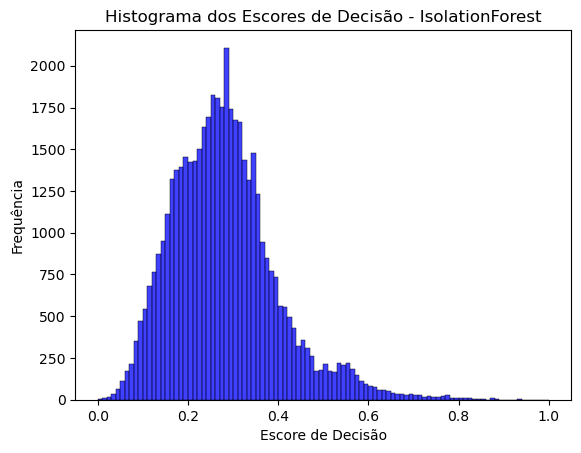

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(RK_predictions_biome.isolationforest_010_score_normalized, bins=100,color='blue')# kde=True, 
plt.title('Histograma dos Escores de Decisão - IsolationForest')
#plt.xlim(0,0.005)
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


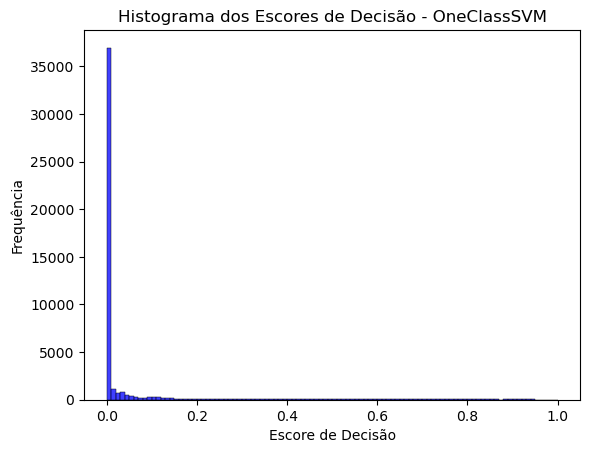

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(RK_predictions_biome.oneclasssvm_010_score_normalized, bins=100,color='blue')# kde=True, 
plt.title('Histograma dos Escores de Decisão - OneClassSVM')
#plt.xlim(0,0.005)
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


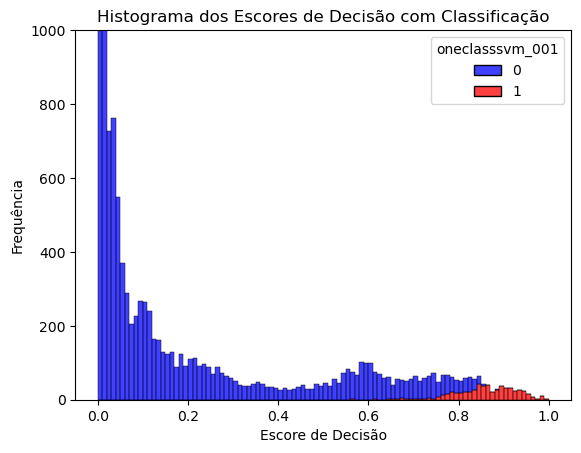

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


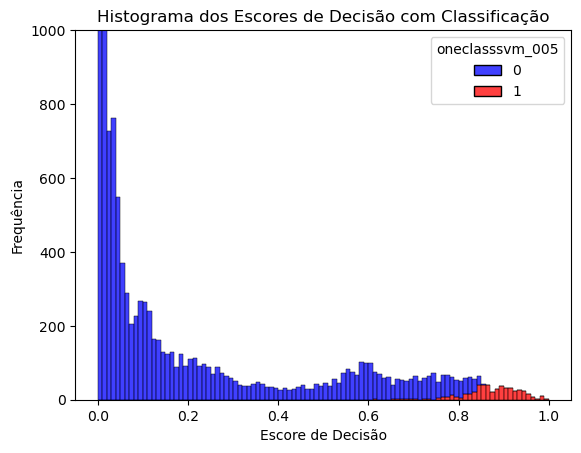

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


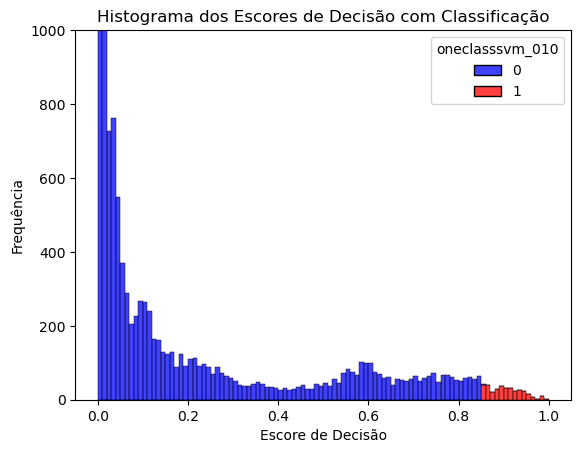

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


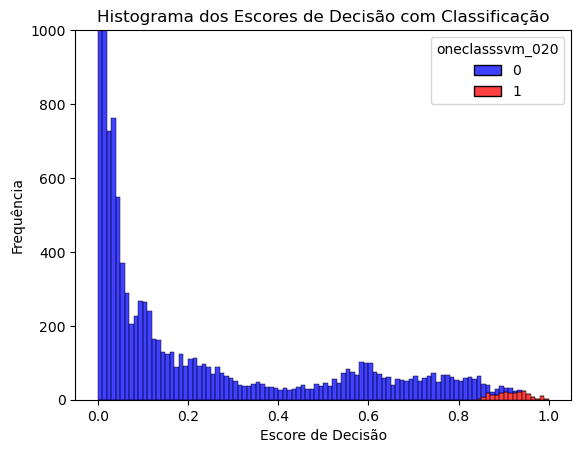

In [94]:
sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','oneclasssvm_001']], x='oneclasssvm_010_score_normalized', hue='oneclasssvm_001', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','oneclasssvm_005']], x='oneclasssvm_010_score_normalized', hue='oneclasssvm_005', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','oneclasssvm_010']], x='oneclasssvm_010_score_normalized', hue='oneclasssvm_010', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','oneclasssvm_020']], x='oneclasssvm_010_score_normalized', hue='oneclasssvm_020', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


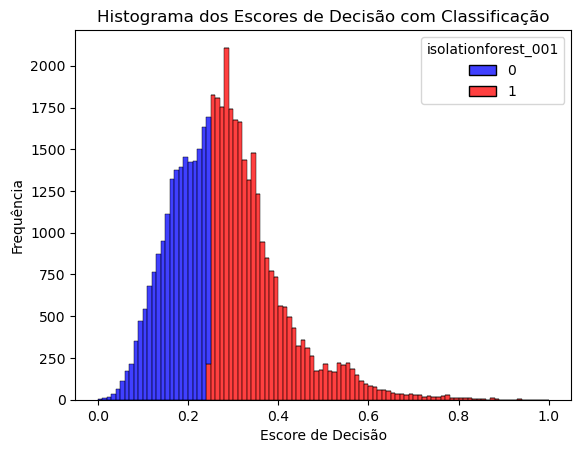

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


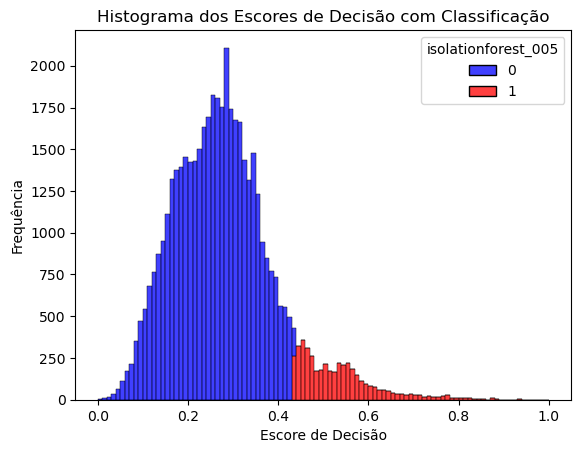

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


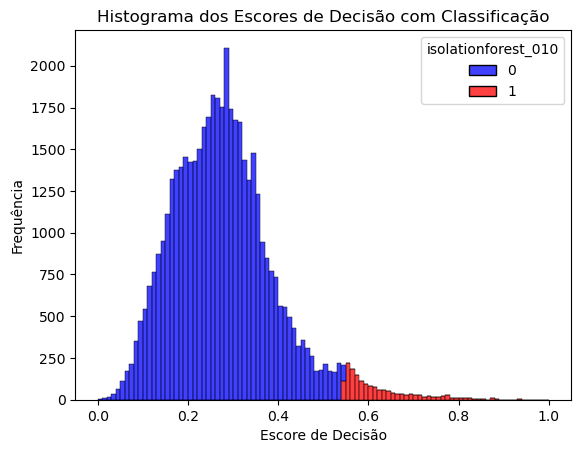

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


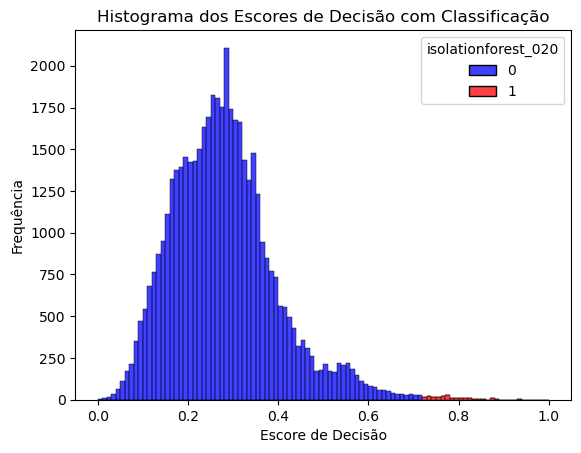

In [95]:
sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','isolationforest_001']], x='isolationforest_010_score_normalized', hue='isolationforest_001', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','isolationforest_005']], x='isolationforest_010_score_normalized', hue='isolationforest_005', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','isolationforest_010']], x='isolationforest_010_score_normalized', hue='isolationforest_010', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','isolationforest_020']], x='isolationforest_010_score_normalized', hue='isolationforest_020', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


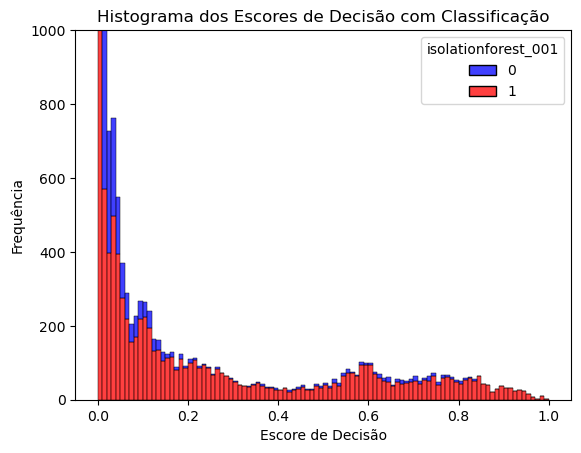

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


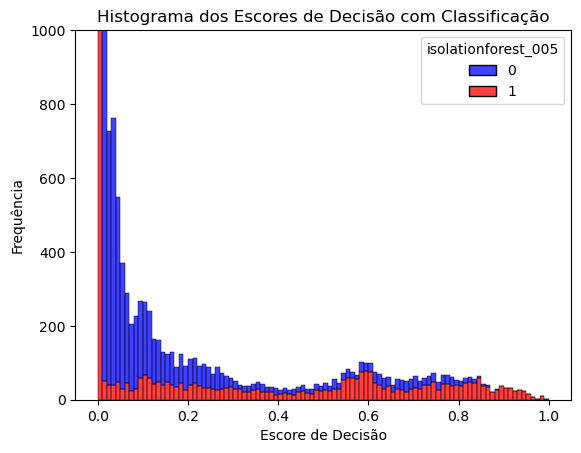

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


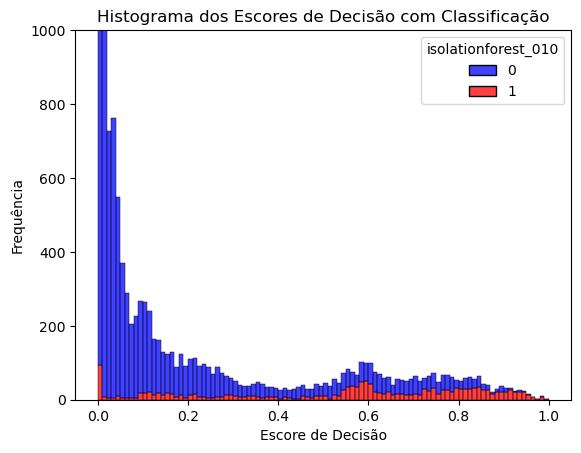

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


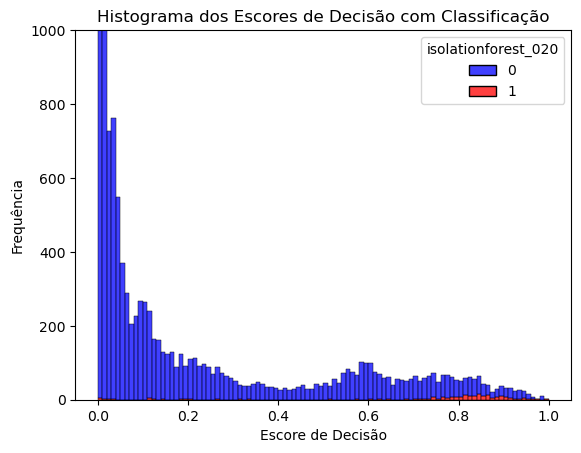

In [96]:
sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','isolationforest_001']], x='oneclasssvm_010_score_normalized', hue='isolationforest_001', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','isolationforest_005']], x='oneclasssvm_010_score_normalized', hue='isolationforest_005', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','isolationforest_010']], x='oneclasssvm_010_score_normalized', hue='isolationforest_010', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

sns.histplot(data=RK_predictions_biome[['oneclasssvm_010_score_normalized','isolationforest_020']], x='oneclasssvm_010_score_normalized', hue='isolationforest_020', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.ylim(0,1000)
plt.show()

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


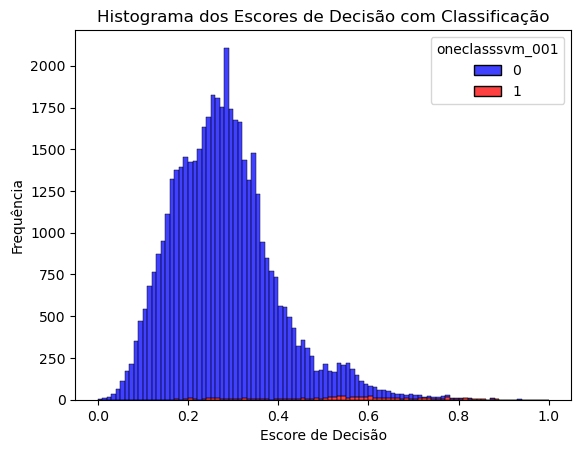

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


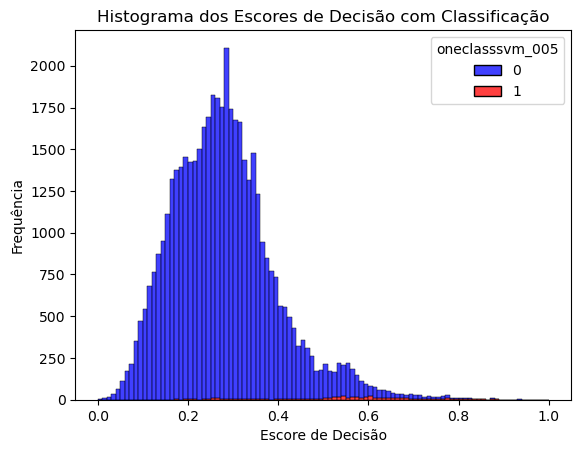

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


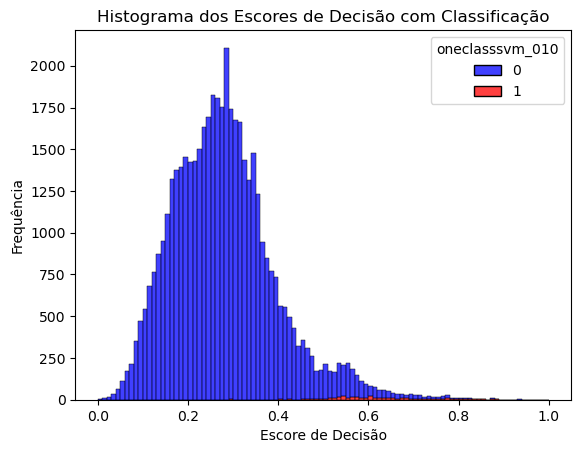

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


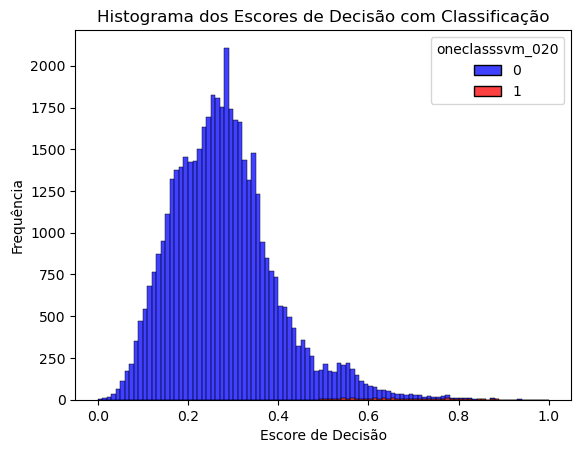

In [97]:
sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','oneclasssvm_001']], x='isolationforest_010_score_normalized', hue='oneclasssvm_001', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','oneclasssvm_005']], x='isolationforest_010_score_normalized', hue='oneclasssvm_005', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','oneclasssvm_010']], x='isolationforest_010_score_normalized', hue='oneclasssvm_010', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

sns.histplot(data=RK_predictions_biome[['isolationforest_010_score_normalized','oneclasssvm_020']], x='isolationforest_010_score_normalized', hue='oneclasssvm_020', bins=100, palette=['blue', 'red'], multiple='stack')
plt.title('Histograma dos Escores de Decisão com Classificação')
plt.xlabel('Escore de Decisão')
plt.ylabel('Frequência')
plt.show()

In [98]:
RK_predictions_biome.to_csv('RK_predictions_Pampa_sp_787_only.csv',index=False)

Helicops infrataeniatus (Cobra-d'água) é a espécie 'sp_787'.

from sklearn.semi_supervised import LabelPropagation

X_combined = pd.concat([X, data_predict0.iloc[:1000]],axis=0)
y_combined = pd.concat([y, pd.DataFrame(-1 * np.ones((data_predict0.iloc[:1000]).shape[0]), columns=['RK'])],axis=0)

preprocessor=preprocess(X_combined.shape[1])
X_combined_scaled = preprocessor.fit_transform(X_combined)

model = LabelPropagation()

model.fit(X_combined_scaled.toarray(), np.ravel(y_combined))
y_predictions = model.transduction_[-(data_predict0.iloc[:1000]).shape[0]:]
y_predictions_train = model.transduction_[:X.shape[0]]
contamination_computed_lp = (y_predictions_train!=1).mean()

print('training computed contamination:',contamination_computed_lp)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)
model_labelpropagation=copy.copy(model)

import joblib
joblib.dump(model, "pipeline_labelpropagation.pkl")

from sklearn.semi_supervised import LabelSpreading

X_combined = pd.concat([X, data_predict0.iloc[:1000]],axis=0)
y_combined = pd.concat([y, pd.DataFrame(-1 * np.ones(data_predict0.shape[0]), columns=['RK']).iloc[:1000]],axis=0)

preprocessor=preprocess(X_combined.shape[1])
X_combined_scaled = preprocessor.fit_transform(X_combined)

model = LabelSpreading(kernel='rbf', alpha=0.10)  # alpha próximo de 0: Dá mais peso para os rótulos originais, o modelo vai respeitar mais os rótulos conhecidos e tentar manter os rótulos dos dados rotulados sem alterações, limitando a propagação dos rótulos para os dados não rotulados.
model.fit(X_combined_scaled.toarray(), np.ravel(y_combined))
y_predictions = model.transduction_[-(data_predict0.iloc[:1000]).shape[0]:]
y_predictions_train = model.transduction_[:X.shape[0]]
contamination_computed_ls = (y_predictions_train!=1).mean()

print('training computed contamination:',contamination_computed_ls)
print('test outputs:',list(np.unique(y_predictions)))
acc=(y_predictions==1).sum()/len(y_predictions)
print('test accuracy:',acc)

model_labelspreading=copy.copy(model)

import joblib
joblib.dump(model, "pipeline_labelspreading.pkl")

#### Variáveis explicativas

In [141]:
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification

In [142]:
def distance_to_probability(model_scores):
    prob=(model_scores - model_scores.min()) / (model_scores.max() - model_scores.min())
    return prob

In [143]:
def custom_scoring(estimator, X_features, y_label):
    prob_after = distance_to_probability(estimator.decision_function(X_features))
    return 1-np.mean(np.abs(prob_before - prob_after))

In [144]:
prediction_before=isolationforest_010.predict(data_predict0)
prob_before = distance_to_probability(isolationforest_010.decision_function(data_predict0))

In [148]:
result = permutation_importance(isolationforest_010, data_predict0, prediction_before, scoring=custom_scoring, n_repeats=20, random_state=73, n_jobs=-1)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [149]:
feature_importances = pd.DataFrame({'feature': data_predict0.columns,'importance_mean': result.importances_mean,'importance_std': result.importances_std})
feature_importances = feature_importances.sort_values(by='importance_mean', ascending=False)

In [150]:
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", 40)
feature_importances

,feature,importance_mean,importance_std
13,pnv_biome.type_biome00k.tropical.dec...,0.028398,5.893244e-03
54,CHELSA_bio10_09,0.027318,1.190330e-03
40,geodiversidade_1000000_gr_coer,0.027233,1.014143e-03
94,r_vege_area_nm_pretet,0.024282,3.537424e-03
45,geodiversidade_1000000_amp_topogr,0.023726,1.754585e-03
...,...,...,...
52,CHELSA_bio10_07,0.000932,9.670718e-05
5,pnv_biome.type_biome00k.cool.mixed.f...,0.000754,5.150968e-04
77,r_bio # MIROC_Modern(1950-1999)_bio19,0.000425,7.508917e-04
87,Ecoregions2017_NNH_NAME,0.000006,3.162543e-07


In [154]:
feature_importances.head(10)

,feature,importance_mean,importance_std
13,pnv_biome.type_biome00k.tropical.dec...,0.028398,0.005893
54,CHELSA_bio10_09,0.027318,0.001190
40,geodiversidade_1000000_gr_coer,0.027233,0.001014
94,r_vege_area_nm_pretet,0.024282,0.003537
45,geodiversidade_1000000_amp_topogr,0.023726,0.001755
90,r_geom_area_categoria,0.021892,0.003067
85,r_bio # MIROC_Modern(1950-1999)_bio11,0.021012,0.001502
57,CHELSA_bio10_12,0.020958,0.002945
64,CHELSA_bio10_19,0.020476,0.002169
97,r_vege_area_legenda_2,0.019495,0.001219


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


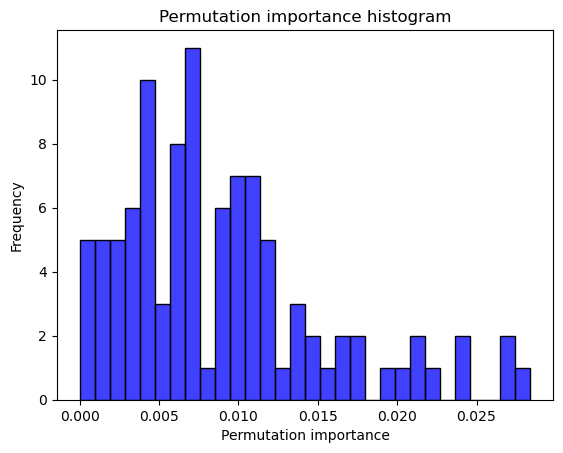

In [151]:
sns.histplot(feature_importances.importance_mean, bins=30,color='blue')
plt.title('Permutation importance histogram')
#plt.xlim(0,0.005)
plt.xlabel('Permutation importance')
plt.ylabel('Frequency')
plt.show()

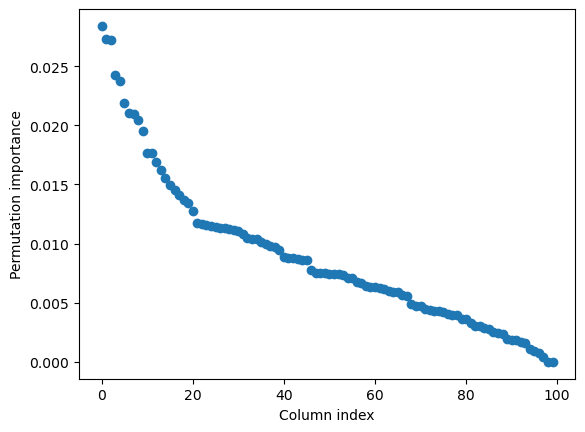

In [152]:
plt.scatter(range(len(feature_importances.importance_mean)),feature_importances.importance_mean)
plt.xlabel('Column index')
plt.ylabel('Permutation importance')
plt.show()

In [155]:
feature_importances.to_csv('variaveis_explicativas.csv',index=False)

In [153]:
beep()

In [157]:
result_lite = permutation_importance(isolationforest_010, data_predict0, prediction_before, scoring=custom_scoring, n_repeats=8, random_state=73, n_jobs=-1)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [158]:
feature_importances_lite = pd.DataFrame({'feature': data_predict0.columns,'importance_mean': result_lite.importances_mean,'importance_std': result_lite.importances_std})
feature_importances_lite = feature_importances_lite.sort_values(by='importance_mean', ascending=False)

In [159]:
pd.set_option('display.max_columns', None)
pd.set_option("max_colwidth", 40)
feature_importances_lite

,feature,importance_mean,importance_std
13,pnv_biome.type_biome00k.tropical.dec...,0.027807,4.444523e-03
40,geodiversidade_1000000_gr_coer,0.027481,9.001384e-04
54,CHELSA_bio10_09,0.027403,1.288256e-03
45,geodiversidade_1000000_amp_topogr,0.024358,1.873558e-03
94,r_vege_area_nm_pretet,0.023668,3.875678e-03
...,...,...,...
5,pnv_biome.type_biome00k.cool.mixed.f...,0.000935,7.801066e-04
52,CHELSA_bio10_07,0.000927,8.902821e-05
77,r_bio # MIROC_Modern(1950-1999)_bio19,0.000800,1.084089e-03
87,Ecoregions2017_NNH_NAME,0.000006,2.618594e-07


In [160]:
feature_importances_lite.head(10)

,feature,importance_mean,importance_std
13,pnv_biome.type_biome00k.tropical.dec...,0.027807,0.004445
40,geodiversidade_1000000_gr_coer,0.027481,0.000900
54,CHELSA_bio10_09,0.027403,0.001288
45,geodiversidade_1000000_amp_topogr,0.024358,0.001874
94,r_vege_area_nm_pretet,0.023668,0.003876
90,r_geom_area_categoria,0.022477,0.002432
85,r_bio # MIROC_Modern(1950-1999)_bio11,0.021506,0.001214
64,CHELSA_bio10_19,0.020030,0.002111
97,r_vege_area_legenda_2,0.019637,0.001123
57,CHELSA_bio10_12,0.019634,0.003280


/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


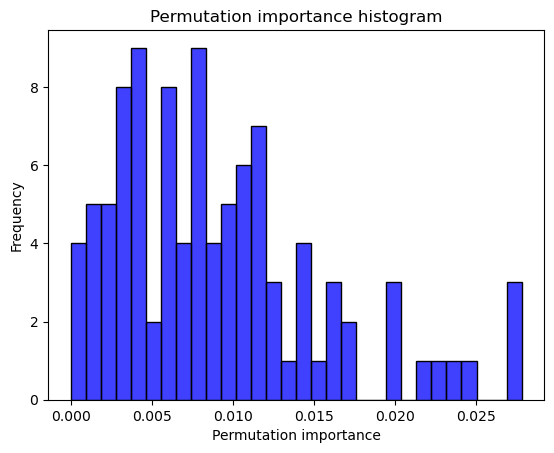

In [161]:
sns.histplot(feature_importances_lite.importance_mean, bins=30,color='blue')
plt.title('Permutation importance histogram')
#plt.xlim(0,0.005)
plt.xlabel('Permutation importance')
plt.ylabel('Frequency')
plt.show()

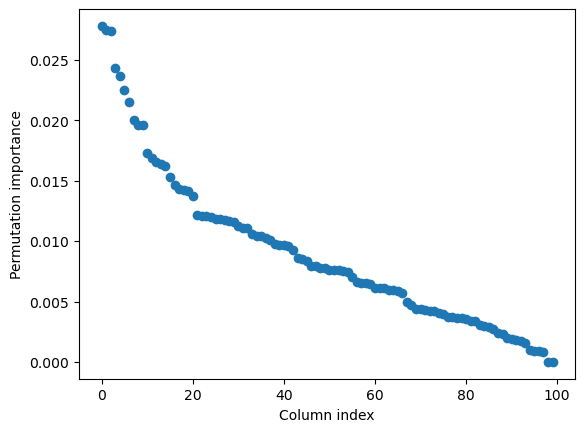

In [162]:
plt.scatter(range(len(feature_importances_lite.importance_mean)),feature_importances_lite.importance_mean)
plt.xlabel('Column index')
plt.ylabel('Permutation importance')
plt.show()

In [163]:
feature_importances_lite.to_csv('variaveis_explicativas_lite.csv',index=False)

In [164]:
beep()

In [173]:
display(feature_importances)
display(feature_importances_lite)

,feature,importance_mean,importance_std
13,pnv_biome.type_biome00k.tropical.dec...,0.028398,5.893244e-03
54,CHELSA_bio10_09,0.027318,1.190330e-03
40,geodiversidade_1000000_gr_coer,0.027233,1.014143e-03
94,r_vege_area_nm_pretet,0.024282,3.537424e-03
45,geodiversidade_1000000_amp_topogr,0.023726,1.754585e-03
...,...,...,...
52,CHELSA_bio10_07,0.000932,9.670718e-05
5,pnv_biome.type_biome00k.cool.mixed.f...,0.000754,5.150968e-04
77,r_bio # MIROC_Modern(1950-1999)_bio19,0.000425,7.508917e-04
87,Ecoregions2017_NNH_NAME,0.000006,3.162543e-07


,feature,importance_mean,importance_std
13,pnv_biome.type_biome00k.tropical.dec...,0.027807,4.444523e-03
40,geodiversidade_1000000_gr_coer,0.027481,9.001384e-04
54,CHELSA_bio10_09,0.027403,1.288256e-03
45,geodiversidade_1000000_amp_topogr,0.024358,1.873558e-03
94,r_vege_area_nm_pretet,0.023668,3.875678e-03
...,...,...,...
5,pnv_biome.type_biome00k.cool.mixed.f...,0.000935,7.801066e-04
52,CHELSA_bio10_07,0.000927,8.902821e-05
77,r_bio # MIROC_Modern(1950-1999)_bio19,0.000800,1.084089e-03
87,Ecoregions2017_NNH_NAME,0.000006,2.618594e-07


In [207]:
feature_lite=[col for col in feature_importances.feature]
importance_lite=[(feature_importances_lite.iloc[np.where(feature_importances_lite==col)[0]].importance_mean.values[0]) for col in feature_importances.feature]


In [208]:
feature_importances['importance_mean_lite']=importance_lite

In [209]:
feature_importances

,feature,importance_mean,importance_std,importance_mean_lite
13,pnv_biome.type_biome00k.tropical.dec...,0.028398,5.893244e-03,0.027807
54,CHELSA_bio10_09,0.027318,1.190330e-03,0.027403
40,geodiversidade_1000000_gr_coer,0.027233,1.014143e-03,0.027481
94,r_vege_area_nm_pretet,0.024282,3.537424e-03,0.023668
45,geodiversidade_1000000_amp_topogr,0.023726,1.754585e-03,0.024358
...,...,...,...,...
52,CHELSA_bio10_07,0.000932,9.670718e-05,0.000927
5,pnv_biome.type_biome00k.cool.mixed.f...,0.000754,5.150968e-04,0.000935
77,r_bio # MIROC_Modern(1950-1999)_bio19,0.000425,7.508917e-04,0.000800
87,Ecoregions2017_NNH_NAME,0.000006,3.162543e-07,0.000006


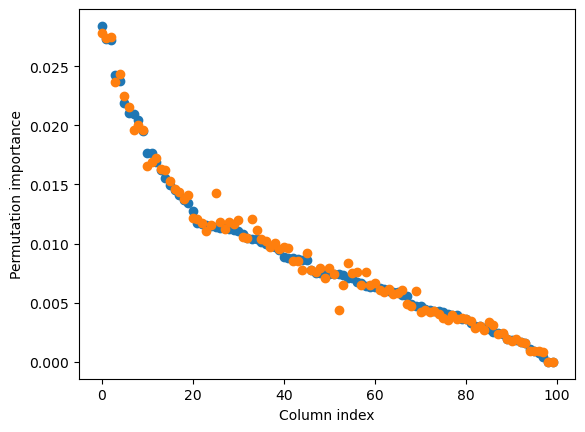

In [210]:
plt.scatter(range(len(feature_importances.importance_mean)),feature_importances.importance_mean)
plt.scatter(range(len(feature_importances.importance_mean)),feature_importances.importance_mean_lite)
plt.xlabel('Column index')
plt.ylabel('Permutation importance')
plt.show()

#### score_samples

In [14]:
isolationforest_010=pipeline_isolationforest(0.10)

training computed contamination: 0.09975669099756691
test accuracy: 0.8979206049149339


In [16]:
isolationforest_010.predict(data_predict0)

array([-1, -1, -1, ..., -1, -1, -1])

In [17]:
isolationforest_010.decision_function(data_predict0)

array([-0.09652865, -0.08090596, -0.07842172, ..., -0.06579497,
       -0.06744314, -0.04950808])

In [18]:
isolationforest_010.score_samples(data_predict0)

array([-0.59990729, -0.5842846 , -0.58180036, ..., -0.56917361,
       -0.57082178, -0.55288672])

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


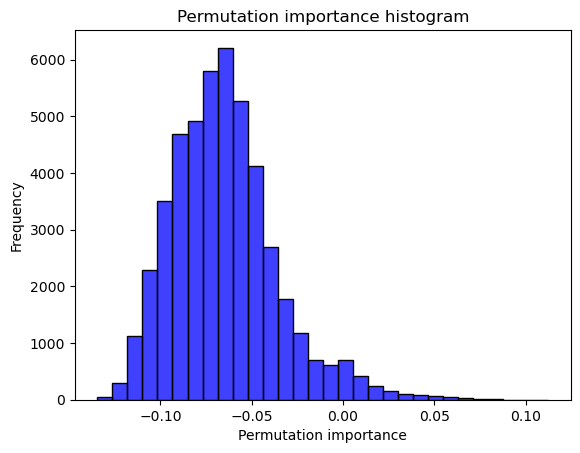

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(isolationforest_010.decision_function(data_predict0), bins=30,color='blue')
plt.title('Permutation importance histogram')
#plt.xlim(0,0.005)
plt.xlabel('Permutation importance')
plt.ylabel('Frequency')
plt.show()

/home/flavio/anaconda3/envs/work/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


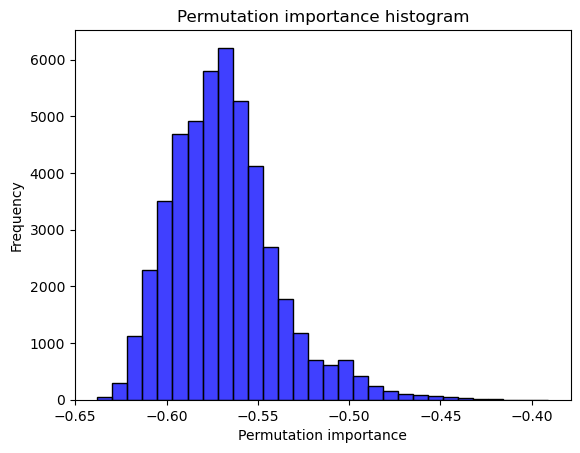

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(isolationforest_010.score_samples(data_predict0), bins=30,color='blue')
plt.title('Permutation importance histogram')
#plt.xlim(0,0.005)
plt.xlabel('Permutation importance')
plt.ylabel('Frequency')
plt.show()

In [1]:
(10400-9900)/9900

0.050505050505050504